In [8]:
from gurobipy import *
import networkx as nx
import matplotlib.pyplot as plt
from workflow import *
from pilp import *
from greedy import *
import lbbd
import lbbd_
import hybrid
import heft

# num_nodes, num_cores, dag =20, 2, 10
num_nodes, num_cores, num = 20, 2, 10
# num_nodes, num_cores, num = 50, 8, 6


result_list = []
time_list = []
iter_list = []
for i in range(num, num+1):
    workflow_path = "./SyntheticSettings/DAGs/%d nodes/%d Cores/dag%d_%dn_%dc.gexf"%\
                    (num_nodes, num_cores, i, num_nodes, num_cores)
    system_path = "./SyntheticSettings/Systems/%dCoreSys.gexf" % 5

    dag = load_dag(workflow_path)
    # nx.draw(dag, with_labels=True)
    # plt.show()
    platform = nx.read_gexf(system_path)
    for u, v in platform.edges():
        platform[u][v]['bandwidth'] = int(random.randint(50, 100))

    for nd in dag.nodes():
        for rbt in ['Core%d'%(i) for i in range(1, num_cores+1)]:
            del dag.node[nd][rbt]
        for rbt in ['Core%d'%(i) for i in range(1, 6)]:
            dag.node[nd][rbt] = int(random.gauss(300, 100))
        dag.node[nd]['Core6']  = sum(dag.node[nd][rbt] for rbt in ['Core%d'%(i) for i in range(1, 6)] ) // 5 //5  
    for u, v in dag.edges():
        dag[u][v]['data'] = int(random.randint(100, 5000))
    des_path = './SyntheticSettings/default_dags/%d_nodes/dag_%d.gexf'%(num_nodes, i)
    nx.write_gexf(dag, des_path)
des_path

'./SyntheticSettings/default_dags/20_nodes/dag_10.gexf'

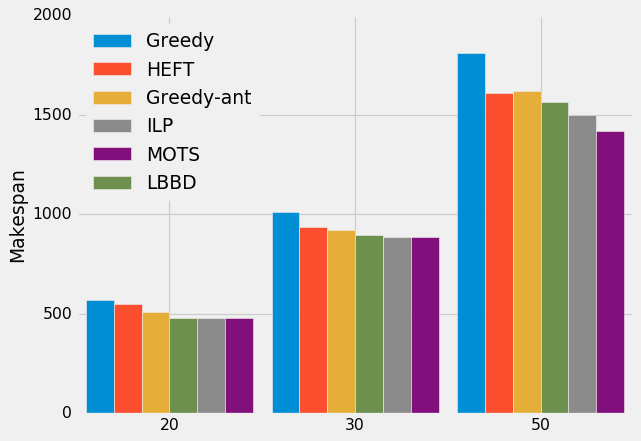

In [87]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
greedy = [572, 1012, 1812]
heft = [548, 935, 1607]
greedyant = [509, 923, 1620]
ilp = [479, 884, 1501]
mots = [479, 884, 1416]
lbbd = [479, 895, 1565]


width = 0.15       # the width of the bars: can also be len(x) sequence

# for data in [greedy, heft, greedyant, ilp, mots, lbbd]:

p0 = plt.bar(ind-3*width, greedy, width)
p1 = plt.bar(ind-2*width, heft, width)
p2 = plt.bar(ind-1*width, greedyant, width)
p5 = plt.bar(ind, lbbd, width)
p3 = plt.bar(ind+1*width, ilp, width)
p4 = plt.bar(ind+2*width, mots, width)



plt.ylabel('Makespan')
# plt.title('Impact of number of nodes')
plt.xticks(ind, ('20', '30', '50'))
# plt.ylim(1100, 1450)
# plt.yticks(np.arange(800, 1400))
plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0], p5[0]), ('Greedy', 'HEFT', 'Greedy-ant', 'ILP', 'MOTS', 'LBBD'),
           loc="best")
plt.savefig('./approaches.png', format='png', dpi=500) 
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


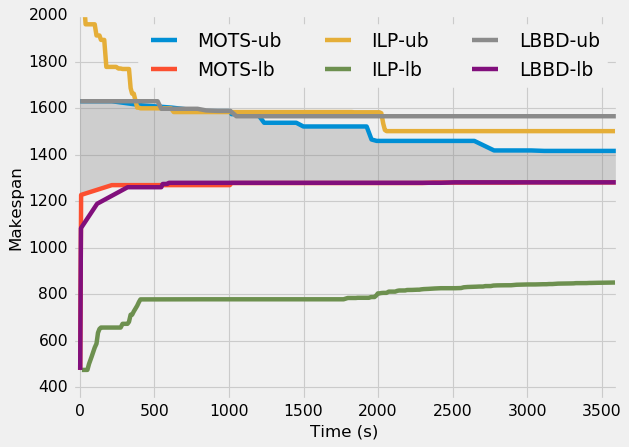

In [75]:
ilp = [(13, 2607.9999999921265, 475.0), (28, 2050.9999997944633, 475.0), (38, 1959.9999998038838, 475.0), (50, 1959.9999998038838, 475.0), (61, 1959.9999998038838, 500.8769230769231), (79, 1959.9999998038838, 533.0), (99, 1959.9999998038838, 570.793455549377), (111, 1911.9999999999998, 587.7059163625004), (121, 1911.9999999999998, 634.5292434952383), (131, 1911.9999999999998, 651.0475916938041), (141, 1892.9999999999109, 656.9999678769229), (152, 1892.9999999999109, 656.9999678769229), (163, 1892.9999999999109, 656.9999678769229), (177, 1776.9999999999745, 656.9999678769229), (187, 1776.9999999999745, 656.9999678769229), (198, 1776.9999999999745, 656.9999678769229), (213, 1776.9999999999745, 656.9999678769229), (231, 1776.9999999999745, 656.9999678769229), (243, 1776.9999999999745, 656.9999678769229), (258, 1769.9999999999764, 656.9999678769229), (273, 1769.9999999999764, 656.9999678769229), (286, 1767.999999999997, 673.0438765659663), (308, 1767.999999999997, 673.0438765659663), (319, 1767.999999999997, 673.0438765659663), (329, 1767.999999999997, 681.7078960758411), (340, 1685.999999999994, 711.9999999999999), (350, 1662.0, 712.0), (361, 1662.0, 726.0), (384, 1601.999999999959, 750.7173352545485), (396, 1601.999999999959, 766.9777206045751), (406, 1598.999999999959, 778.0), (611, 1598.999999999959, 778.4420372471883), (629, 1582.9999999999363, 778.4420372471883), (645, 1582.9999999999363, 778.4420372471883), (656, 1582.9999999999363, 778.4420372471883), (667, 1582.9999999999363, 778.4420372471883), (679, 1582.9999999999363, 778.4420372471883), (690, 1582.9999999999363, 778.4420372471883), (700, 1582.9999999999363, 778.4420372471883), (711, 1582.9999998414387, 778.4420372471883), (723, 1582.9999998414387, 778.4420372471883), (734, 1582.9999998414387, 778.4420372471883), (749, 1582.9999998414387, 778.4420372471883), (760, 1582.9999998414387, 778.4420372471883), (774, 1582.9999998414387, 778.4420372471883), (786, 1582.9999998414387, 778.4420372471883), (803, 1582.9999998414387, 778.4420372471883), (817, 1582.9999998414387, 778.4420372471883), (832, 1582.9999998414387, 778.4420372471883), (847, 1582.9999998414387, 778.4420372471883), (862, 1582.9999998414387, 778.4420372471883), (875, 1582.9999998414387, 778.4420372471883), (888, 1582.9999998414387, 778.4420372471883), (900, 1582.9999998414387, 778.4420372471883), (913, 1582.9999998414387, 778.4420372471883), (926, 1582.9999998414387, 778.4420372471883), (939, 1582.9999998414387, 778.4420372471883), (952, 1582.9999998414387, 778.4420372471883), (963, 1582.9999998414387, 778.4420372471883), (979, 1582.9999998414387, 778.4420372471883), (1000, 1582.9999998414387, 778.4420372471883), (1017, 1582.9999998414387, 778.4420372471883), (1036, 1582.9999998414387, 778.4420372471883), (1052, 1582.9999998414387, 778.4420372471883), (1064, 1582.9999998414387, 778.4420372471883), (1088, 1582.9999998414387, 778.4420372471883), (1108, 1582.9999998414387, 778.4420372471883), (1127, 1582.9999998414387, 778.4420372471883), (1144, 1582.9999998414387, 778.4420372471883), (1161, 1582.9999998414387, 778.4420372471883), (1178, 1582.9999996830384, 778.4420372471883), (1190, 1582.9999996830384, 778.4420372471883), (1206, 1582.9999996830384, 778.4420372471883), (1217, 1582.9999996830384, 778.4420372471883), (1233, 1582.9999996830384, 778.4420372471883), (1256, 1582.9999996830384, 778.4420372471883), (1274, 1582.9999996830384, 778.4420372471883), (1287, 1582.9999996830384, 778.4420372471883), (1303, 1582.9999996830384, 778.4420372471883), (1320, 1582.9999996830384, 778.4420372471883), (1337, 1582.9999996830384, 778.4420372471883), (1351, 1582.9999996830384, 778.4420372471883), (1365, 1582.9999996830384, 778.4420372471883), (1387, 1582.9999996830384, 778.4420372471883), (1404, 1582.9999996830384, 778.4420372471883), (1424, 1582.9999996830384, 778.4420372471883), (1436, 1582.9999996830384, 778.4420372471883), (1451, 1582.9999996830384, 778.4420372471883), (1471, 1582.9999995246378, 778.4420372471883), (1486, 1582.9999995246378, 778.4420372471883), (1505, 1582.9999995246378, 778.4420372471883), (1519, 1582.9999995246378, 778.4420372471883), (1531, 1582.9999995246378, 778.4420372471883), (1543, 1582.9999995246378, 778.4420372471883), (1555, 1582.9999995246378, 778.4420372471883), (1567, 1582.9999995246378, 778.4420372471883), (1580, 1582.9999995246378, 778.4420372471883), (1595, 1582.9999995246378, 778.4420372471883), (1607, 1582.9999995246378, 778.4420372471883), (1618, 1582.9999995246378, 778.4420372471883), (1638, 1582.9999995246378, 778.4420372471883), (1655, 1582.9999995246378, 778.4420372471883), (1666, 1582.9999995246378, 778.4420372471883), (1678, 1582.9999995246378, 778.4420372471883), (1696, 1582.9999995246378, 778.4420372471883), (1730, 1582.9999995246378, 778.4420372471883), (1756, 1582.9999995246378, 778.4420372471883), (1769, 1582.9999995246378, 778.4420372471883), (1785, 1582.9999995246378, 781.5358338977219), (1797, 1582.9999995246378, 784.0737199144144), (1808, 1582.9999995246378, 784.0737199144144), (1824, 1582.9999995246378, 784.0737199144144), (1839, 1581.9999999999977, 784.0737199144144), (1851, 1581.9999999999977, 784.0737199144144), (1863, 1581.9999999999977, 784.9031059023391), (1878, 1581.9999999999977, 784.9031059023391), (1888, 1581.9999999999977, 784.9031059023391), (1901, 1581.9999999999977, 784.9031059023391), (1912, 1581.9999999999977, 784.9031059023391), (1927, 1581.9999999999977, 784.9031059023391), (1939, 1581.9999999999977, 784.9031059023391), (1953, 1581.9999999999977, 788.1350934933557), (1976, 1581.9999999999977, 788.1350934933557), (1987, 1581.9999999999977, 793.9361143719632), (1999, 1581.9999998416974, 803.8371418817891), (2009, 1581.9999998416974, 803.8371418817891), (2022, 1577.9999999999684, 805.3547423938235), (2035, 1532.9999999999955, 806.04949104064), (2046, 1505.9999999999843, 806.04949104064), (2057, 1500.9999999999961, 806.04949104064), (2072, 1500.9999999999961, 811.3631292586899), (2087, 1500.9999999999961, 811.3631292586899), (2101, 1500.9999999999961, 811.3898651327261), (2115, 1500.9999999999961, 811.3898651327261), (2130, 1500.9999999999961, 814.8949087510616), (2142, 1500.9999999999961, 816.2083992336604), (2152, 1500.9999999999961, 816.2083992336604), (2169, 1500.9999998497958, 816.3663084077932), (2182, 1500.9999998497958, 816.3663084077932), (2195, 1500.9999998497958, 818.3867107476576), (2207, 1500.9999998497958, 818.3867107476576), (2218, 1500.9999998497958, 818.4435350816032), (2229, 1500.9999998497958, 818.666841682351), (2254, 1500.9999998497958, 819.4973437645411), (2265, 1500.9999998497958, 819.6484872422279), (2277, 1500.9999998497958, 819.6484872422279), (2288, 1500.9999998497958, 820.9440747076511), (2306, 1500.9999998497958, 822.2299448050521), (2322, 1500.9999998497958, 822.6250830518142), (2336, 1500.9999998497958, 823.1296441672379), (2351, 1500.9999998497958, 823.8603850203857), (2364, 1500.9999998497958, 824.0377875893463), (2380, 1500.9999998497958, 824.8509687480025), (2422, 1500.9999998497958, 826.0588183503984), (2494, 1500.9999998497958, 826.0588183503984), (2518, 1500.9999998497958, 826.0588183503984), (2542, 1500.9999998497958, 826.7980958348816), (2557, 1500.9999994742457, 826.7980958348816), (2575, 1500.9999994742457, 829.9099502825443), (2601, 1500.9999994742457, 831.2554960092087), (2619, 1500.9999994742457, 831.5464006287121), (2644, 1500.9999994742457, 832.1778293931012), (2661, 1500.9999994742457, 832.6165490111041), (2679, 1500.9999994742457, 833.2229864960087), (2704, 1500.9999994742457, 833.2229864960087), (2720, 1500.9999994742457, 835.134178386553), (2740, 1500.9999994742457, 835.2601614656118), (2756, 1500.9999994742457, 835.2601614656118), (2774, 1500.9999994742457, 837.4741290865975), (2800, 1500.9999994742457, 838.2291599764379), (2824, 1500.9999994742457, 838.2291599764379), (2849, 1500.9999994742457, 838.6589997688277), (2875, 1500.9999994742457, 838.7618032730514), (2893, 1500.9999994742457, 838.7618032730514), (2911, 1500.9999994742457, 840.0503095920964), (2929, 1500.9999994742457, 840.9088282486116), (2975, 1500.9999994742457, 841.7821454562517), (3002, 1500.9999994742457, 842.1427840468417), (3035, 1500.9999994742457, 842.1427840468417), (3056, 1500.9999994742457, 842.2608893285701), (3078, 1500.9999994742457, 842.7210744476697), (3107, 1500.9999994742457, 843.1419638653815), (3130, 1500.9999994742457, 843.1760296328042), (3148, 1500.9999994742457, 843.9961627584753), (3170, 1500.9999994742457, 843.9961627584753), (3185, 1500.9999994742457, 844.8030859520271), (3208, 1500.9999994742457, 845.7249542044206), (3224, 1500.9999994742457, 845.8286749104125), (3238, 1500.9999994742457, 846.2658961345913), (3258, 1500.9999994742457, 846.2658961345913), (3276, 1500.9999994742457, 846.6297051700631), (3298, 1500.9999994742457, 846.6297051700631), (3313, 1500.9999994742457, 846.9126716738872), (3328, 1500.9999994742457, 847.8602481660462), (3350, 1500.9999994742457, 847.9091834101326), (3384, 1500.9999994742457, 847.9248595894469), (3399, 1500.9999994742457, 848.0174933566509), (3418, 1500.9999994742457, 848.7032258064521), (3432, 1500.9999994742457, 848.7032258064521), (3454, 1500.9999994742457, 849.2208676482918), (3476, 1500.9999994742457, 849.384279817536), (3498, 1500.9999994742457, 849.384279817536), (3515, 1500.9999994742457, 849.722826542579), (3529, 1500.9999994742457, 849.8659673462257), (3554, 1500.9999994742457, 849.8659673462261), (3569, 1500.9999994742457, 849.9637016107624), (3590, 1500.9999994742457, 850.4858912882995)]
makespan =  [1501]
time_cost =  [3601]
gap =  [0.4331]

hybrid = [(1.6069839000701904, 1629.5, 475), (7.828603982925415, 1629.5, 1227), (214.0118052959442, 1629.5, 1269), (415.3561713695526, 1612.0, 1269), (616.6995012760162, 1602.0, 1269), (818.2031908035278, 1587.0, 1269), (1005.8040895462036, 1587.0, 1269), (1017.1566369533539, 1574, 1278), (1101.1257817745209, 1574, 1278), (1193.0011041164398, 1574, 1278), (1235.581773519516, 1537, 1278), (1287.0500626564026, 1537, 1278), (1324.6028981208801, 1537, 1278), (1451.5038146972656, 1537, 1278), (1498.9806826114655, 1521, 1278), (1549.8580305576324, 1521, 1278), (1576.8021664619446, 1521, 1278), (1616.4803457260132, 1521, 1278), (1654.317922115326, 1521, 1278), (1753.3883464336395, 1521, 1278), (1788.9625618457794, 1521, 1278), (1844.2168216705322, 1521, 1278), (1923.51629114151, 1521, 1278), (1956.335619211197, 1465, 1278), (1991.0094957351685, 1459, 1278), (2036.2888667583466, 1459, 1278), (2106.497395992279, 1459, 1278), (2139.4307129383087, 1459, 1278), (2214.9653737545013, 1459, 1278), (2297.3144602775574, 1459, 1278), (2375.5039498806, 1459, 1280), (2473.9168372154236, 1459, 1280), (2645.934313774109, 1459, 1280), (2778.520250558853, 1418, 1280), (2820.3832902908325, 1418, 1280), (2906.098365545273, 1418, 1280), (3027.9431722164154, 1418, 1281), (3115.416777610779, 1416, 1281), (3304.994202852249, 1416, 1281), (3441.8875992298126, 1416, 1281), (3513.02121257782, 1416, 1281), (3579.8383474349976, 1416, 1281), (3781.109523296356, 1416, 1281)]

makespan =  [1416]
time_cost =  [3816]
gap =  [0.09534]

lbbd = [(1.5598344802856445, 1629.5, 475), (6.690805673599243, 1629.5, 1084), (115.36356115341187, 1629.5, 1189), (319.85460352897644, 1629.5, 1260), (521.0878524780273, 1629.5, 1260), (545.7384614944458, 1597.0, 1260), (555.6502754688263, 1597.0, 1274), (586.0611929893494, 1597.0, 1274), (596.6594712734222, 1597.0, 1279), (675.6241672039032, 1597.0, 1279), (788.712320804596, 1597.0, 1279), (846.238676071167, 1590.0, 1279), (923.5694785118103, 1588.0, 1279), (1008.6348135471344, 1588.0, 1279), (1049.5878112316132, 1565.0, 1279), (1109.6064803600311, 1565.0, 1279), (1204.49467420578, 1565.0, 1279), (1259.9659192562103, 1565.0, 1279), (1312.23721909523, 1565.0, 1279), (1343.0293941497803, 1565.0, 1279), (1382.1993176937103, 1565.0, 1279), (1414.031081199646, 1565.0, 1279), (1490.983711719513, 1565.0, 1279), (1573.495353937149, 1565.0, 1279), (1662.6566677093506, 1565.0, 1279), (1703.1885859966278, 1565.0, 1279), (1774.3620347976685, 1565.0, 1279), (1811.2685384750366, 1565.0, 1279), (1887.7331955432892, 1565.0, 1279), (1988.0866453647614, 1565.0, 1279), (2073.5380091667175, 1565.0, 1279), (2113.7455110549927, 1565.0, 1279), (2190.207816839218, 1565.0, 1279), (2271.0933632850647, 1565.0, 1279), (2346.934233188629, 1565.0, 1279), (2422.518356323242, 1565.0, 1279), (2514.4327585697174, 1565.0, 1281), (2654.112120628357, 1565.0, 1281), (2710.693822622299, 1565.0, 1281), (2802.3941700458527, 1565.0, 1281), (2872.92679643631, 1565.0, 1281), (2957.6330609321594, 1565.0, 1281), (3062.4086198806763, 1565.0, 1281), (3131.803890943527, 1565.0, 1281), (3193.800033569336, 1565.0, 1281), (3269.6805367469788, 1565.0, 1281), (3431.8019983768463, 1565.0, 1281), (3542.7227602005005, 1565.0, 1281), (3651.350327730179, 1565.0, 1281)]
makespan =  [1565]
time_cost =  [3685]
gap =  [0.18147]
'''
Gap line

data:
    graph 50, 2 rate=0
'''

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from matplotlib import pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')



left, bottom, width, height = 0.12, 0.15, 0.85, 0.8
fig = plt.figure()
ax  = fig.add_axes([left, bottom, width, height])

lines = []
for data in [hybrid, ilp, lbbd]:
    ln1, = ax.plot([i[0] for i in data], [i[1] for i in data])
    ln2, =ax.plot([i[0] for i in data], [i[2] for i in data])
    lines.extend([ln1, ln2])

ax.fill_between([i[0] for i in hybrid], [i[2] for i in hybrid], [i[1] for i in hybrid], color='grey', alpha='0.3')

ax.set_xlabel('Time (s)', fontsize=15)
ax.set_ylabel('Makespan', fontsize=15)


ax.set_xlim(-50, 3600)
ax.set_ylim(350, 2000)
ax.legend(fontsiz=8)
plt.tight_layout()
plt.legend(lines, 
           ['MOTS-ub', 'MOTS-lb', 'ILP-ub', 'ILP-lb', 'LBBD-ub', 'LBBD-lb'], 
           loc = 'best', ncol=3)  
plt.savefig('./boundings50.png', format='png', dpi=500) 
plt.show()

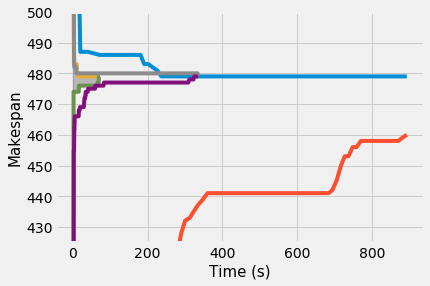

In [68]:
'''
Gap line

data:
    graph 20, 10 rate=0
'''

ilp = [(10, 556.9999999999876, 177.0), (20, 486.9999999511998, 250.07175735735552), (30, 486.9999999511998, 267.9999999999927), (40, 486.9999999511998, 308.8), (72, 486.00000000000006, 316.0000000000037), (82, 485.9999999513, 316.0000000000037), (92, 485.9999999513, 316.0000000000037), (103, 485.9999999513, 316.0000000000037), (115, 485.9999999513, 316.0000000000037), (125, 485.9999999513, 316.0000000000037), (135, 485.9999999513, 316.0000000000037), (147, 485.9999999513, 339.99999999999284), (160, 485.9999999513, 348.0000000000037), (171, 485.9999999513, 365.00000000000375), (181, 485.9999999513, 381.9999999999928), (191, 482.99999999999994, 384.00000000000364), (202, 482.99999999999994, 390.9999999999928), (213, 481.9999999516999, 391.9999999999928), (225, 480.99999995179144, 397.9999999999927), (237, 479.0, 401.00000000000364), (251, 478.99999995199994, 406.99999999999284), (263, 478.99999995199994, 412.00000000000364), (277, 478.99999995199994, 420.0000000000034), (290, 478.99999995199994, 428.0000000000037), (300, 478.99999995199994, 431.9999999999962), (313, 478.99999995199994, 433.00000000000705), (323, 478.99999995199994, 434.99999999999636), (335, 478.99999995199994, 437.2000000000071), (348, 478.99999995199994, 438.99999999999596), (360, 478.99999995199994, 440.999999999992), (437, 478.99999995199994, 441.00000000000006), (448, 478.99999995199994, 441.00000000000006), (458, 478.99999995199994, 441.00000000000006), (468, 478.99999995199994, 441.00000000000006), (478, 478.99999995199994, 441.00000000000006), (488, 478.99999995199994, 441.00000000000006), (498, 478.99999995199994, 441.00000000000006), (508, 478.99999995199994, 441.00000000000006), (519, 478.99999995199994, 441.00000000000006), (529, 478.99999995199994, 441.00000000000006), (540, 478.99999995199994, 441.00000000000006), (550, 478.99999995199994, 441.00000000000006), (560, 478.99999995199994, 441.00000000000006), (571, 478.99999995199994, 441.00000000000006), (582, 478.99999995199994, 441.00000000000006), (593, 478.99999995199994, 441.00000000000006), (605, 478.99999995199994, 441.00000000000006), (617, 478.99999995199994, 441.00000000000006), (629, 478.99999995199994, 441.00000000000006), (641, 478.99999995199994, 441.00000000000006), (652, 478.99999995199994, 441.00000000000006), (662, 478.99999995199994, 441.00000000000006), (673, 478.99999995199994, 441.00000000000006), (684, 478.99999995199994, 441.00000000000006), (694, 478.99999995199994, 441.9999999999961), (705, 478.99999995199994, 444.99999999998545), (717, 478.99999995199994, 450.0), (727, 478.99999995199994, 453.0), (737, 478.99999995199994, 453.0), (748, 478.99999995199994, 455.9999999999963), (759, 478.99999995199994, 456.0), (770, 478.99999995199994, 457.9999999999962), (780, 478.99999995199994, 458.0), (790, 478.99999995199994, 458.0), (802, 478.99999995199994, 458.0), (812, 478.99999995199994, 458.0), (825, 478.99999995199994, 458.0), (835, 478.99999995199994, 458.0), (846, 478.99999995199994, 458.00000000000006), (858, 478.99999995199994, 458.00000000000006), (870, 478.99999995199994, 458.00000000000006), (883, 478.99999995199994, 459.2), (893, 478.99999995199994, 459.99999999999613)]
hybrid = [(0.5781023502349854, 548.2423076923077, 137), (2.006584882736206, 544, 474), (2.5163233280181885, 492.0, 474), (3.1142592430114746, 483.0, 474), (3.6413800716400146, 483.0, 474), (4.111048221588135, 483.0, 474), (4.519813060760498, 483.0, 474), (5.096503019332886, 483.0, 474), (5.718426704406738, 483.0, 474), (6.289488077163696, 483.0, 474), (6.850964784622192, 483.0, 474), (7.438450336456299, 483.0, 474), (7.941464185714722, 483.0, 474), (8.238286972045898, 483.0, 474), (8.525894403457642, 483.0, 474), (8.815348625183105, 483.0, 474), (9.091927766799927, 483.0, 474), (9.381736278533936, 483.0, 474), (9.677127838134766, 483.0, 474), (10.246859073638916, 483.0, 474), (10.672359228134155, 483.0, 474), (10.939192056655884, 480.0, 474), (11.192522525787354, 480.0, 474), (11.462124586105347, 480.0, 474), (11.726993799209595, 480.0, 474), (11.988204956054688, 480.0, 474), (12.254491090774536, 480.0, 474), (12.520431518554688, 480.0, 474), (12.7800133228302, 480.0, 474), (13.04708194732666, 480.0, 474), (13.31069564819336, 480.0, 474), (13.555928230285645, 480.0, 474), (13.837327003479004, 480.0, 474), (14.08275556564331, 480.0, 474), (14.340037822723389, 480.0, 474), (14.579901695251465, 480.0, 474), (14.821893215179443, 479, 474), (15.142241954803467, 479, 474), (15.578848361968994, 479, 474), (15.832351684570312, 479, 474), (16.601376056671143, 479, 476), (17.146603107452393, 479, 476), (17.657084941864014, 479, 476), (18.19316840171814, 479, 476), (18.69726014137268, 479, 476), (19.54251527786255, 479, 476), (20.121528387069702, 479, 476), (20.652644157409668, 479, 476), (21.317476987838745, 479, 476), (21.88087296485901, 479, 476), (22.42239260673523, 479, 476), (23.15897536277771, 479, 476), (23.85692262649536, 479, 476), (24.40429401397705, 479, 476), (25.120893955230713, 479, 476), (25.78775691986084, 479, 476), (26.536017179489136, 479, 476), (27.291149854660034, 479, 476), (27.848941326141357, 479, 476), (28.540076732635498, 479, 476), (29.22548747062683, 479, 476), (29.989933013916016, 479, 476), (30.765554189682007, 479, 476), (31.392791032791138, 479, 476), (32.108283042907715, 479, 476), (32.753907203674316, 479, 476), (33.40892314910889, 479, 476), (34.112375020980835, 479, 476), (34.82524037361145, 479, 476), (35.53537678718567, 479, 476), (36.3025906085968, 479, 476), (37.019148111343384, 479, 476), (37.779052734375, 479, 476), (38.42130923271179, 479, 476), (39.08715224266052, 479, 476), (39.848397970199585, 479, 476), (40.60614728927612, 479, 476), (41.3167667388916, 479, 476), (42.06183981895447, 479, 476), (42.79514932632446, 479, 476), (43.53799867630005, 479, 476), (44.18812370300293, 479, 476), (44.93976306915283, 479, 476), (45.67912745475769, 479, 476), (46.480456829071045, 479, 476), (47.298271894454956, 479, 476), (48.04285955429077, 479, 476), (48.78193402290344, 479, 476), (49.35281729698181, 479, 476), (50.042842864990234, 479, 476), (50.562010526657104, 479, 476), (51.1337730884552, 479, 476), (51.54974031448364, 479, 476), (51.95287036895752, 479, 476), (52.437191009521484, 479, 476), (52.88916230201721, 479, 476), (53.31470537185669, 479, 476), (53.749577045440674, 479, 476), (54.27371835708618, 479, 476), (54.68412661552429, 479, 476), (55.172025203704834, 479, 476), (55.628615379333496, 479, 476), (56.47050642967224, 479, 476), (57.14625024795532, 479, 476), (57.647679805755615, 479, 476), (58.122955560684204, 479, 476), (58.664814710617065, 479, 476), (59.127448320388794, 479, 476), (59.728994369506836, 479, 476), (60.248945474624634, 479, 476), (60.88272285461426, 479, 476), (61.300808906555176, 479, 476), (61.97333359718323, 479, 476), (62.66788721084595, 479, 476), (63.33912396430969, 479, 476), (63.859644651412964, 479, 476), (64.29725217819214, 479, 476), (64.80318403244019, 479, 476), (66.55682301521301, 479, 477), (67.73399305343628, 479, 477), (68.92423915863037, 479, 477), (70.10050058364868, 479, 479), (71.66753315925598, 479, 479,), (72.47516632080078, 479, 479)]
lbbd = [(0.5633163452148438, 547.8822147651007, 137), (2.589160203933716, 547.8822147651007, 455), (2.9541776180267334, 502.0, 455), (3.2772281169891357, 486.0, 455), (3.754199504852295, 482.0, 462), (4.030147075653076, 482.0, 462), (4.276763200759888, 482.0, 462), (5.272085189819336, 482.0, 466), (5.625712871551514, 482.0, 466), (5.984759092330933, 482.0, 466), (6.357506990432739, 482.0, 466), (6.730197191238403, 482.0, 466), (7.083147764205933, 482.0, 466), (7.43722677230835, 482.0, 466), (7.856454133987427, 482.0, 466), (8.300597667694092, 482.0, 466), (8.651380777359009, 482.0, 466), (9.065606355667114, 482.0, 466), (9.437292337417603, 480.0, 466), (9.858323097229004, 480.0, 466), (10.304010391235352, 480.0, 466), (10.691824436187744, 480.0, 466), (11.097455024719238, 480.0, 466), (11.487194061279297, 480.0, 466), (11.856860160827637, 480.0, 466), (12.201969385147095, 480.0, 466), (12.509984493255615, 480.0, 466), (12.806936740875244, 480.0, 466), (13.102629661560059, 480.0, 466), (13.395271062850952, 480.0, 466), (13.69275450706482, 480.0, 466), (13.983784675598145, 480.0, 466), (14.278881311416626, 480.0, 466), (14.55460500717163, 480.0, 466), (14.850933074951172, 480.0, 466), (15.160332918167114, 480.0, 466), (15.410266399383545, 480.0, 466), (15.664048433303833, 480.0, 466), (16.23167324066162, 480.0, 468), (16.531507968902588, 480.0, 468), (16.825403690338135, 480.0, 468), (17.13119888305664, 480.0, 468), (17.416282415390015, 480.0, 468), (17.706056833267212, 480.0, 468), (17.99467706680298, 480.0, 468), (18.253943920135498, 480.0, 468), (18.54147458076477, 480.0, 468), (19.17278027534485, 480.0, 469), (19.58890652656555, 480.0, 469), (19.965784788131714, 480.0, 469), (20.379234790802002, 480.0, 469), (20.82125759124756, 480.0, 469), (21.289929389953613, 480.0, 469), (21.684263944625854, 480.0, 469), (22.067213773727417, 480.0, 469), (22.460017442703247, 480.0, 469), (22.86216139793396, 480.0, 469), (23.241572856903076, 480.0, 469), (23.62228775024414, 480.0, 469), (23.981754541397095, 480.0, 469), (24.345340490341187, 480.0, 469), (24.68815541267395, 480.0, 469), (25.036150455474854, 480.0, 469), (25.370270490646362, 480.0, 469), (25.71731996536255, 480.0, 469), (26.06033205986023, 480.0, 469), (26.4016535282135, 480.0, 469), (26.752081394195557, 480.0, 469), (27.079989433288574, 480.0, 469), (27.40359330177307, 480.0, 469), (27.714698553085327, 480.0, 469), (28.030428171157837, 480.0, 469), (28.332300662994385, 480.0, 469), (28.600595235824585, 480.0, 469), (28.863836526870728, 480.0, 469), (29.123351573944092, 480.0, 469), (29.38057017326355, 480.0, 469), (29.90212655067444, 480.0, 470), (30.398001670837402, 480.0, 471), (30.66170382499695, 480.0, 471), (31.19744324684143, 480.0, 472), (31.492232084274292, 480.0, 472), (31.76972532272339, 480.0, 472), (32.047367095947266, 480.0, 472), (32.315359354019165, 480.0, 472), (32.58581519126892, 480.0, 472), (32.856866121292114, 480.0, 472), (33.147451877593994, 480.0, 472), (33.65985298156738, 480.0, 473), (33.93375873565674, 480.0, 473), (34.196059465408325, 480.0, 473), (34.80696105957031, 480.0, 474), (35.176275968551636, 480.0, 474), (35.539894580841064, 480.0, 474), (35.90379977226257, 480.0, 474), (36.331374645233154, 480.0, 474), (36.734092235565186, 480.0, 474), (37.10109615325928, 480.0, 474), (37.471726417541504, 480.0, 474), (37.81857991218567, 480.0, 474), (38.17912149429321, 480.0, 474), (38.508455991744995, 480.0, 474), (38.833638191223145, 480.0, 474), (39.11665415763855, 480.0, 474), (39.39173364639282, 480.0, 474), (39.663376808166504, 480.0, 474), (39.9335994720459, 480.0, 474), (40.85318350791931, 480.0, 475), (41.576882123947144, 480.0, 475), (42.29660153388977, 480.0, 475), (42.972522258758545, 480.0, 475), (43.59228587150574, 480.0, 475), (44.20464634895325, 480.0, 475), (44.835888624191284, 480.0, 475), (45.5052227973938, 480.0, 475), (46.117796182632446, 480.0, 475), (46.77745223045349, 480.0, 475), (47.44627046585083, 480.0, 475), (48.176596879959106, 480.0, 475), (48.846049070358276, 480.0, 475), (49.462987184524536, 480.0, 475), (50.06315803527832, 480.0, 475), (50.64203667640686, 480.0, 475), (51.27294969558716, 480.0, 475), (51.903977394104004, 480.0, 475), (52.569501876831055, 480.0, 475), (53.18827295303345, 480.0, 475), (53.708378314971924, 480.0, 475), (54.24355220794678, 480.0, 475), (54.748694896698, 480.0, 475), (55.323333978652954, 480.0, 475), (55.757089614868164, 480.0, 475), (56.16644835472107, 480.0, 475), (56.577646255493164, 480.0, 475), (56.99487829208374, 480.0, 475), (57.40194129943848, 480.0, 475), (57.8000545501709, 480.0, 475), (58.18363571166992, 480.0, 475), (58.56389021873474, 480.0, 475), (58.955684661865234, 480.0, 475), (59.30589246749878, 480.0, 475), (60.197354555130005, 480.0, 476), (60.78658485412598, 480.0, 476), (61.3489294052124, 480.0, 476), (61.92315411567688, 480.0, 476), (62.61888337135315, 480.0, 476), (63.36612677574158, 480.0, 476), (64.04596447944641, 480.0, 476), (64.7189302444458, 480.0, 476), (65.40541768074036, 480.0, 476), (66.11906385421753, 480.0, 476), (66.78168392181396, 480.0, 476), (67.49487829208374, 480.0, 476), (68.16838121414185, 480.0, 476), (68.84565138816833, 480.0, 476), (69.53124785423279, 480.0, 476), (70.12340426445007, 480.0, 476), (70.63334631919861, 480.0, 476), (71.1484055519104, 480.0, 476), (71.69113874435425, 480.0, 476), (72.23824262619019, 480.0, 476), (72.75163435935974, 480.0, 476), (73.29234647750854, 480.0, 476), (73.87086462974548, 480.0, 476), (74.40583181381226, 480.0, 476), (74.91961646080017, 480.0, 476), (75.46007800102234, 480.0, 476), (76.03117871284485, 480.0, 476), (76.58106303215027, 480.0, 476), (77.09501099586487, 480.0, 476), (77.62625479698181, 480.0, 476), (78.14679288864136, 480.0, 476), (78.85418653488159, 480.0, 476), (79.31885313987732, 480.0, 476), (79.73665189743042, 480.0, 476), (80.14877557754517, 480.0, 476), (80.55939388275146, 480.0, 476), (80.97031450271606, 480.0, 476), (81.39986038208008, 480.0, 476), (81.83244395256042, 480.0, 476), (82.20161557197571, 480.0, 476), (83.33050084114075, 480.0, 477), (84.0857138633728, 480.0, 477), (84.88773584365845, 480.0, 477), (85.61489129066467, 480.0, 477), (86.51964497566223, 480.0, 477), (87.35302472114563, 480.0, 477), (88.28624510765076, 480.0, 477), (89.19633221626282, 480.0, 477), (90.0927803516388, 480.0, 477), (90.88868427276611, 480.0, 477), (91.66966915130615, 480.0, 477), (92.53338742256165, 480.0, 477), (93.4020848274231, 480.0, 477), (94.24223279953003, 480.0, 477), (95.20683646202087, 480.0, 477), (96.05880856513977, 480.0, 477), (97.00760769844055, 480.0, 477), (97.98997569084167, 480.0, 477), (98.9552059173584, 480.0, 477), (99.88000392913818, 480.0, 477), (100.78067445755005, 480.0, 477), (101.70999670028687, 480.0, 477), (102.63638067245483, 480.0, 477), (103.80097723007202, 480.0, 477), (104.85389447212219, 480.0, 477), (105.81418895721436, 480.0, 477), (106.79117012023926, 480.0, 477), (107.68348217010498, 480.0, 477), (108.60540723800659, 480.0, 477), (109.51563048362732, 480.0, 477), (110.43023538589478, 480.0, 477), (111.38284993171692, 480.0, 477), (112.31790161132812, 480.0, 477), (113.27089142799377, 480.0, 477), (114.21083092689514, 480.0, 477), (115.13865089416504, 480.0, 477), (116.04232025146484, 480.0, 477), (117.01205015182495, 480.0, 477), (117.99518322944641, 480.0, 477), (118.93701505661011, 480.0, 477), (119.89410495758057, 480.0, 477), (120.85806822776794, 480.0, 477), (121.84302401542664, 480.0, 477), (122.74950814247131, 480.0, 477), (123.7262351512909, 480.0, 477), (124.78874707221985, 480.0, 477), (125.82465076446533, 480.0, 477), (127.05804061889648, 480.0, 477), (128.03904008865356, 480.0, 477), (129.2019236087799, 480.0, 477), (130.22483015060425, 480.0, 477), (131.22957134246826, 480.0, 477), (132.26988315582275, 480.0, 477), (133.26980590820312, 480.0, 477), (134.27903079986572, 480.0, 477), (135.3019313812256, 480.0, 477), (136.3573703765869, 480.0, 477), (137.34361243247986, 480.0, 477), (138.48176670074463, 480.0, 477), (139.69568991661072, 480.0, 477), (140.71663355827332, 480.0, 477), (141.74171566963196, 480.0, 477), (142.7722110748291, 480.0, 477), (143.80939507484436, 480.0, 477), (144.98054337501526, 480.0, 477), (146.08941984176636, 480.0, 477), (147.14300322532654, 480.0, 477), (148.26576900482178, 480.0, 477), (149.28206491470337, 480.0, 477), (150.26891565322876, 480.0, 477), (151.3187770843506, 480.0, 477), (152.38697791099548, 480.0, 477), (153.39925169944763, 480.0, 477), (154.53344821929932, 480.0, 477), (155.6826479434967, 480.0, 477), (156.84903192520142, 480.0, 477), (157.9271376132965, 480.0, 477), (158.9728443622589, 480.0, 477), (159.98367476463318, 480.0, 477), (161.03980469703674, 480.0, 477), (162.10045647621155, 480.0, 477), (163.20317101478577, 480.0, 477), (164.12283992767334, 480.0, 477), (165.2084047794342, 480.0, 477), (166.18670630455017, 480.0, 477), (167.28710913658142, 480.0, 477), (168.38028812408447, 480.0, 477), (169.49311661720276, 480.0, 477), (170.58514380455017, 480.0, 477), (171.5767903327942, 480.0, 477), (172.55028676986694, 480.0, 477), (173.642746925354, 480.0, 477), (174.63734006881714, 480.0, 477), (175.83606576919556, 480.0, 477), (176.88542008399963, 480.0, 477), (178.17113137245178, 480.0, 477), (179.29585242271423, 480.0, 477), (180.3177227973938, 480.0, 477), (181.37521529197693, 480.0, 477), (182.55330777168274, 480.0, 477), (183.6225016117096, 480.0, 477), (184.67631220817566, 480.0, 477), (185.6725549697876, 480.0, 477), (186.74260473251343, 480.0, 477), (187.82592582702637, 480.0, 477), (188.95275688171387, 480.0, 477), (190.02954959869385, 480.0, 477), (191.20195174217224, 480.0, 477), (192.3383285999298, 480.0, 477), (193.4264509677887, 480.0, 477), (194.4769320487976, 480.0, 477), (195.62723231315613, 480.0, 477), (196.61799430847168, 480.0, 477), (197.72969126701355, 480.0, 477), (198.91582655906677, 480.0, 477), (199.99458718299866, 480.0, 477), (201.24769949913025, 480.0, 477), (202.50816893577576, 480.0, 477), (203.5241367816925, 480.0, 477), (204.55358815193176, 480.0, 477), (205.54569101333618, 480.0, 477), (206.69455981254578, 480.0, 477), (207.83576369285583, 480.0, 477), (209.0369634628296, 480.0, 477), (210.090918302536, 480.0, 477), (211.400803565979, 480.0, 477), (212.6580741405487, 480.0, 477), (213.68568801879883, 480.0, 477), (214.69097065925598, 480.0, 477), (215.70558094978333, 480.0, 477), (216.74048328399658, 480.0, 477), (217.8362913131714, 480.0, 477), (219.12776446342468, 480.0, 477), (220.34428429603577, 480.0, 477), (221.5984411239624, 480.0, 477), (222.7095181941986, 480.0, 477), (224.15222477912903, 480.0, 477), (225.27145862579346, 480.0, 477), (226.42613244056702, 480.0, 477), (227.55458426475525, 480.0, 477), (228.7798557281494, 480.0, 477), (230.0262942314148, 480.0, 477), (231.3775384426117, 480.0, 477), (232.47427487373352, 480.0, 477), (233.5778546333313, 480.0, 477), (234.61959385871887, 480.0, 477), (235.78461384773254, 480.0, 477), (236.94178199768066, 480.0, 477), (238.17916560173035, 480.0, 477), (239.2190124988556, 480.0, 477), (240.2664155960083, 480.0, 477), (241.51030826568604, 480.0, 477), (242.72963905334473, 480.0, 477), (243.82658123970032, 480.0, 477), (245.10486483573914, 480.0, 477), (246.45451188087463, 480.0, 477), (247.5519037246704, 480.0, 477), (248.65337753295898, 480.0, 477), (249.72085738182068, 480.0, 477), (250.8604826927185, 480.0, 477), (252.0044720172882, 480.0, 477), (253.38020300865173, 480.0, 477), (254.51009941101074, 480.0, 477), (255.66804909706116, 480.0, 477), (256.82349395751953, 480.0, 477), (258.2224609851837, 480.0, 477), (259.6439015865326, 480.0, 477), (261.00925636291504, 480.0, 477), (262.1814823150635, 480.0, 477), (263.54534816741943, 480.0, 477), (264.82872104644775, 480.0, 477), (265.863644361496, 480.0, 477), (266.9146864414215, 480.0, 477), (267.97283124923706, 480.0, 477), (269.0475080013275, 480.0, 477), (270.24387979507446, 480.0, 477), (271.2911660671234, 480.0, 477), (272.5395655632019, 480.0, 477), (273.7070028781891, 480.0, 477), (274.818247795105, 480.0, 477), (275.8810610771179, 480.0, 477), (276.93287086486816, 480.0, 477), (278.11242938041687, 480.0, 477), (279.23901867866516, 480.0, 477), (280.4349524974823, 480.0, 477), (281.4931125640869, 480.0, 477), (282.6990923881531, 480.0, 477), (283.76666164398193, 480.0, 477), (284.9069950580597, 480.0, 477), (286.08574891090393, 480.0, 477), (287.2733578681946, 480.0, 477), (288.46292781829834, 480.0, 477), (289.5624485015869, 480.0, 477), (290.642617225647, 480.0, 477), (292.01260685920715, 480.0, 477), (293.22887325286865, 480.0, 477), (294.30077147483826, 480.0, 477), (295.42152976989746, 480.0, 477), (296.7344174385071, 480.0, 477), (298.04414916038513, 480.0, 477), (299.1509232521057, 480.0, 477), (300.33044815063477, 480.0, 477), (301.49695205688477, 480.0, 477), (302.7244644165039, 480.0, 477), (303.9435842037201, 480.0, 477), (305.12632727622986, 480.0, 477), (306.36677384376526, 480.0, 477), (307.63012504577637, 480.0, 477), (308.84651041030884, 480.0, 477), (311.27838349342346, 480.0, 478), (312.45712208747864, 480.0, 478), (313.61179089546204, 480.0, 478), (314.8886911869049, 480.0, 478), (316.1323833465576, 480.0, 478), (317.3486580848694, 480.0, 478), (318.6116807460785, 480.0, 478), (319.78685760498047, 480.0, 478), (321.2007350921631, 480.0, 478), (322.4821789264679, 480.0, 478), (324.8180923461914, 480.0, 479), (325.83920645713806, 480.0, 479), (326.8808741569519, 480.0, 479), (328.092759847641, 480.0, 479), (329.130868434906, 480.0, 479), (330.25141763687134, 480.0, 479), (331.3223011493683, 480.0, 479), (332.3668246269226, 480.0, 479), (333.60607838630676, 480.0, 479), (335.08126640319824, 479, 479)]

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from matplotlib import pyplot as plt
import numpy as np




left, bottom, width, height = 0.12, 0.15, 0.85, 0.8
fig = plt.figure()
ax  = fig.add_axes([left, bottom, width, height])
for data in [ilp, hybrid, lbbd]:
    ax.plot([i[0] for i in data], [i[1] for i in data])
    ax.plot([i[0] for i in data], [i[2] for i in data])

left, bottom, width, height = 0.54, 0.25, 0.4, 0.4

ax.set_xlabel('Time (s)', fontsize=15)
ax.set_ylabel('Makespan', fontsize=15)
ax.fill_between([i[0] for i in hybrid], [i[2] for i in hybrid], [i[1] for i in hybrid], color='grey', alpha='0.5')
ax.set_ylim(425, 500)
ax.legend(fontsiz=8)
plt.savefig('./boundings20.png', format='png', dpi=500) 
plt.show()

In [3]:
makespan = [723, 753, 695, 672, 723, 739, 738, 693, 740, 689]
time_cost = [600, 600, 600, 600, 600, 600, 600, 600, 600, 600]
gap = [0.472, 0.435, 0.368, 0.413, 0.452, 0.435, 0.428, 0.413, 0.345, 0.467]

import pandas as pd
df = pd.DataFrame({'makespan' : makespan, 'time_cost' : time_cost,'gap' : gap})
df.to_csv('./results/ilp_30nodes.csv', index=False, header=False)

In [4]:
system_path = "./SyntheticSettings/Systems/%dCoreSys.gexf" % 6
platform = nx.read_gexf(system_path)
for u, v in platform.edges():
    if u == 'Core6' or v == 'Core6':
            platform[u][v]['bandwidth'] = 20
    else:
        platform[u][v]['bandwidth'] = int(random.randint(80, 160))
des_path = './SyntheticSettings/default_dags/platform.gexf'
nx.write_gexf(platform, des_path)

In [5]:
makespan = [573, 520, 589, 516, 488, 479, 452, 442, 485, 479]
time_cost =  [2, 1, 2, 4, 7, 132, 34, 106, 129, 600]
gap = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04]

import pandas as pd
df = pd.DataFrame({'makespan' : makespan, 'time_cost' : time_cost,'gap' : gap})
df.to_csv('./results/ilp_20nodes.csv', index=False, header=False)

In [6]:
makespan =  [1255, 1195, 1238, 1277, 1214, 1166, 1193, 1210, 1255, 1137]
time_cost =  [20.240309953689575, 14.168118476867676, 36.798572301864624, 26.445485830307007, 15.273441314697266, 12.208611726760864, 3.5158793926239014, 5.1020190715789795, 47.06737184524536, 2.1290500164031982]
gap =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
import pandas as pd
df = pd.DataFrame({'makespan' : makespan, 'time_cost' : time_cost,'gap' : gap})
df.to_csv('./results/heft_50nodes.csv', index=False, header=False)

In [7]:
makespan =  [719, 610, 794, 674, 691, 623, 611, 550, 632, 547]
time_cost =  [0.0007631778717041016, 0.0007433891296386719, 0.000850677490234375, 0.0007789134979248047, 0.0007882118225097656, 0.0014312267303466797, 0.0008759498596191406, 0.0017750263214111328, 0.0016715526580810547, 0.0018410682678222656]
gap =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
import pandas as pd
df = pd.DataFrame({'makespan' : makespan, 'time_cost' : time_cost,'gap' : gap})
df.to_csv('./results/greedy_20nodes.csv', index=False, header=False)

In [8]:
makespan =  [1127, 1170, 1129, 1144, 1139, 1101, 1096, 1064, 1196, 1066]
time_cost =  [7.845785617828369, 3.198138475418091, 5.8433709144592285, 11.839221477508545, 3.9456260204315186, 4.726963758468628, 7.430063247680664, 8.798797369003296, 5.2278478145599365, 8.441510438919067]
gap =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df = pd.DataFrame({'makespan' : makespan, 'time_cost' : time_cost,'gap' : gap})
df.to_csv('./results/greedyant_50nodes.csv', index=False, header=False)

In [9]:
greedy = {num : pd.read_csv('./results/greedy_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30, 50]}

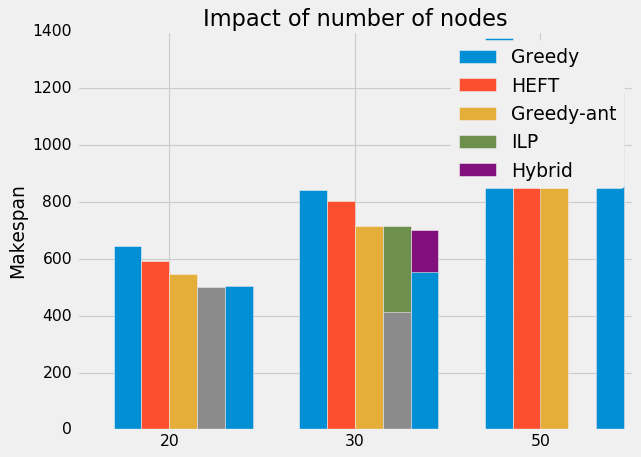

In [73]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
greedy = {num : pd.read_csv('./results/greedy_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30, 50]}
heft = {num : pd.read_csv('./results/heft_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30, 50]}
greedyant = {num : pd.read_csv('./results/greedyant_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30, 50]}
ilp = {num : pd.read_csv('./results/ilp_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30]}
hybrid = {num : pd.read_csv('./results/hybrid_%dnodes.csv' % num, index_col =None, header=None) for num in [20, 30, 50]}

N = 3
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.15       # the width of the bars: can also be len(x) sequence

p0 = plt.bar(ind-2*width, [np.mean(list(greedy[num][1])) for num in [20, 30, 50]], width)
p1 = plt.bar(ind-width, [np.mean(list(heft[num][1])) for num in [20, 30, 50]], width)
p2 = plt.bar(ind, [np.mean(list(greedyant[num][1])) for num in [20, 30, 50]], width)
p3 = plt.bar(ind+1*width, [np.mean(list(ilp[num][1])) for num in [20, 30]] + [0], width)
p3_1 = plt.bar(ind+1*width, [np.mean(list(ilp[num][1] * (1-ilp[num][0]) )) for num in [20, 30]] + [0], width)
p4 = plt.bar(ind+2*width, [np.mean(list(hybrid[num][1])) for num in [20, 30, 50]], width)
p4_1 = plt.bar(ind+2*width, [np.mean(list(hybrid[num][1] * (1-hybrid[num][0]) )) for num in [20, 30, 50]], width)



plt.ylabel('Makespan')
plt.title('Impact of number of nodes')
plt.xticks(ind, ('20', '30', '50'))
# plt.ylim(1100, 1450)
# plt.yticks(np.arange(800, 1400))
plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0]), ('Greedy', 'HEFT', 'Greedy-ant', 'ILP', 'Hybrid'))

plt.show()

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


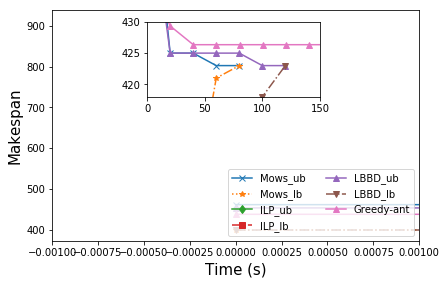

In [11]:
bounds = [(0, 461.0, 398), (10, 453.0, 398), (20, 425, 398), (30, 425.0, 398), (40, 425.0, 400), (50, 425.0, 402), (60, 423, 421), (70, 423, 423), (80, 423, 423)]

ilp_bouonds = [(0, 481, 361), (10, 440, 419), (20, 424, 421), (30, 424, 421), (40, 423, 421), (50, 422.9999993373379, 421.0), (60, 422.99999804239786, 421.0), (70, 422.99997406177556, 421.0), (80, 422.99997406177556, 421.0), (90, 422.99997406177556, 421.0), (101, 422.99997406177556, 421.0), (111, 422.99997406177556, 421.0), (121, 422.99997406177556, 421.0), (131, 422.99997406177556, 421.0), (142, 422.99997406177556, 421.0), (153, 422.99997406177556, 421.0), (163, 422.99997406177556, 421.0), (173, 422.9999740193755, 421.0), (184, 422.9999740193755, 421.0), (194, 422.9999740193755, 421.0), (204, 422.9999740193755, 421.0), (215, 422.9999740193755, 421.0), (225, 422.9999740193755, 421.0), (235, 422.9999740193755, 421.0), (246, 422.9999740193755, 421.0), (256, 422.9999740193755, 421.0), (267, 422.9999740193755, 421.0), (277, 422.9999740193755, 421.0), (288, 422.9999740193755, 421.0), (298, 422.9999740193755, 421.0), (308, 422.9999740193755, 421.0), (318, 422.9999740193755, 421.0), (329, 422.9999740193755, 421.0), (339, 422.9999740193755, 421.0), (349, 422.9999740193755, 421.0), (360, 422.9999740193755, 421.0), (370, 422.9999740193755, 421.0), (380, 422.9999740193755, 421.0), (390, 422.9999740193755, 421.0), (400, 422.9999740193755, 421.0), (410, 422.9999740193755, 421.0), (420, 422.9999740193755, 421.0), (430, 422.9999740193755, 421.0), (441, 422.9999740193755, 421.0), (451, 422.9999740193755, 421.0), (461, 422.9999740193755, 421.0), (471, 422.9999740193755, 421.0), (482, 422.9999740193755, 421.0), (492, 422.9999740193755, 421.0), (502, 422.9999740193755, 421.0), (512, 422.9999740193755, 421.0), (523, 422.9999740193755, 421.0), (533, 422.9999740193755, 421.0), (544, 422.9999740193755, 421.0), (555, 422.9999740193755, 421.0), (565, 422.9999740193755, 421.0), (575, 422.9999740193755, 421.0), (586, 422.9999740193755, 421.0), (596, 422.9999740193755, 421.0), (606, 422.9999740193755, 421.0), (617, 422.9999740193755, 421.0), (627, 422.9999740193755, 421.0), (637, 422.9999740193755, 421.0), (647, 422.9999740193755, 421.0), (657, 422.9999740193755, 421.0), (667, 422.9999740193755, 421.0), (678, 422.9999740193755, 421.0), (688, 422.9999740193755, 421.0), (699, 422.9999740193755, 421.0), (709, 422.9999740193755, 421.0), (719, 422.9999740193755, 421.0), (729, 422.9999740193755, 421.0), (739, 422.9999740193755, 421.0), (750, 422.9999740193755, 421.0), (760, 422.9999740193755, 421.0), (770, 422.99995192999984, 421.0), (780, 422.99995192999984, 421.0), (791, 422.99995192999984, 421.0), (801, 422.99995192999984, 421.0), (811, 422.99995192999984, 421.0), (821, 422.99995192999984, 421.0), (832, 422.99995192999984, 421.0), (842, 422.99995192999984, 421.0), (853, 422.99995192999984, 421.0), (863, 422.99995192999984, 421.0), (874, 422.99995192999984, 421.0), (884, 422.99995192999984, 421.0), (894, 422.99995192999984, 421.0)]
ilp_bouonds = [(13, 911.9999999999986, 726.0), (23, 898.9999999999977, 734.9999933478495), (33, 898.9999999099977, 795.0), (44, 895.0, 808.0), (76, 883.99999991148, 834.0000000000002), (87, 883.99999991148, 845.0), (97, 883.99999991148, 847.0), (109, 883.99999991148, 852.0000000000001), (119, 883.99999991148, 853.9999999999808), (129, 883.99999991148, 854.0000000000001), (139, 883.99999991148, 854.0000000000008), (149, 883.9999992303418, 854.0000000000008), (159, 883.9999992303418, 854.0000000000008), (169, 883.9999992303418, 854.0000000000008), (180, 883.9999992303418, 854.0000000000008), (192, 883.9999992303418, 854.0000000000008), (202, 883.9999992303418, 854.0000000000008), (213, 883.9999992303418, 854.0000000000008), (223, 883.9999992303418, 854.0000000000008), (233, 883.9999992303418, 854.0000000000008), (243, 883.9999992303418, 854.0000000000008), (254, 883.9999992303418, 854.0000000000008), (264, 883.9999992303418, 855.9999999999839), (274, 883.9999992303418, 856.0), (284, 883.9999992303418, 856.0), (296, 883.9999992303418, 856.0), (307, 883.9999992303418, 858.2966069386199), (317, 883.9999992303418, 860.0), (327, 883.9999992303418, 867.9999999999839), (337, 883.9999992303418, 870.9999999999839), (347, 883.9999992303418, 871.0), (358, 883.9999992303418, 871.9999999999839), (368, 883.9999992303418, 871.999999999988), (378, 883.9999992303418, 871.999999999988), (389, 883.9999992303418, 872.0), (400, 883.9999992303418, 872.9999999999839), (411, 883.9999992303418, 873.9999999999835), (422, 883.9999992303418, 873.9999999999835), (432, 883.9999992303418, 873.9999999999835), (442, 883.9999992303418, 873.9999999999835), (452, 883.9999992303418, 873.9999999999835), (464, 883.9999992303418, 873.9999999999835), (475, 883.9999992303418, 873.9999999999835), (485, 883.9999992303418, 873.9999999999835), (495, 883.9999992303418, 873.9999999999835)]

lbbd_bounds = [(0, 453, 398), (10, 425.0, 398), (20, 425.0, 401), (30, 425.0, 405), (40, 425.0, 408), (50, 425, 411), (60, 425.0, 414),(70, 425, 414), (80, 425.0, 414), (90, 425.0, 415), (100, 423, 418), (110, 423.0, 423), (120, 423, 423)]

greedyant = [(0, 437.34999999999997), (10.019408702850342, 437.34999999999997), (20.021408081054688, 429.34999999999997), (30.02798819541931, 426.34999999999997), (40.05728101730347, 426.34999999999997), (50.147623777389526, 426.34999999999997), (60.177754640579224, 426.34999999999997), (70.19510960578918, 426.34999999999997), (80.25285315513611, 426.34999999999997), (90.34398818016052, 426.34999999999997), (100.43644285202026, 426.34999999999997), (110.45097780227661, 426.34999999999997), (120.49450087547302, 426.34999999999997), (130.56762838363647, 426.34999999999997), (140.63467836380005, 426.34999999999997), (150.7070508003235, 426.34999999999997), (160.77911138534546, 426.34999999999997), (170.7824125289917, 426.34999999999997), (180.805114030838, 426.34999999999997), (190.80585765838623, 426.34999999999997), (200, 426.34999999999997)]

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

left, bottom, width, height = 0.12, 0.15, 0.85, 0.8

inter = 2
t_hybrid = [e[0] for e in bounds][::inter]
ub = [e[1] for e in bounds][::inter]
lb = [e[2] for e in bounds][::inter]

fig = plt.figure()
ax  = fig.add_axes([left, bottom, width, height])
hybrid_ub, = ax.plot(t_hybrid, ub, marker='x')
hybrid_lb, = ax.plot(t_hybrid, lb, linestyle=':', marker='*')

# Data for plotting
# inter = 2
t_ilp = [e[0] for e in ilp_bouonds][::inter]
ub_ilp = [e[1] for e in ilp_bouonds][::inter]
lb_ilp = [e[2] for e in ilp_bouonds][::inter]

ilp_ub, = ax.plot(t_ilp, ub_ilp, marker='d')
ilp_lb, = ax.plot(t_ilp, lb_ilp, linestyle='-.', marker='s')

# lbbd
# inter = 1
t_lbbd = [e[0] for e in lbbd_bounds][::inter]
ub_lbbd = [e[1] for e in lbbd_bounds][::inter]
lb_lbbd = [e[2] for e in lbbd_bounds][::inter]

lbbd_ub, = ax.plot(t_lbbd, ub_lbbd, marker='^')
lbbd_lb, = ax.plot(t_lbbd, lb_lbbd, linestyle='-.', marker='v')

t_ant = [e[0] for e in greedyant][::inter]
obj_ant = [e[1] for e in greedyant][::inter]
greedyant, =  ax.plot(t_ant, obj_ant, marker='^')
# ax.set_xlim(0, 900)
ax.set_xlim(0, 00)
plt.legend([hybrid_ub, hybrid_lb, ilp_ub, ilp_lb, lbbd_ub, lbbd_lb, greedyant], 
           ['Mows_ub', 'Mows_lb', 'ILP_ub', 'ILP_lb', 'LBBD_ub', 'LBBD_lb', 'Greedy-ant'], 
           loc = 'lower right', ncol=2)  

left, bottom, width, height = 0.34, 0.65, 0.4, 0.26
hybrid_first = 0
# ax2.set_xlim(0, 200)
hybrid_last = len(bounds)
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_ylim(418, 430)
ax2.set_xlim(0, 150)
ax2.plot(t_hybrid[hybrid_first:hybrid_last], ub[hybrid_first:hybrid_last], marker='x')
ax2.plot(t_hybrid[hybrid_first:hybrid_last], lb[hybrid_first:hybrid_last], linestyle='-.', marker='*')

ilp_first = 0
ilp_last = 20
ax2.plot(t_ilp[ilp_first:ilp_last], ub_ilp[ilp_first:ilp_last], marker='d')
ax2.plot(t_ilp[ilp_first:ilp_last], lb_ilp[ilp_first:ilp_last], linestyle='-.', marker='s')

lbbd_first = 0
lbbd_last = 20
ax2.plot(t_lbbd[lbbd_first:lbbd_last], ub_lbbd[lbbd_first:lbbd_last], marker='^')
ax2.plot(t_lbbd[lbbd_first:lbbd_last], lb_lbbd[lbbd_first:lbbd_last], linestyle='-.', marker='v')
ax2.plot(t_ant, obj_ant, marker='^')

ax.set_xlabel('Time (s)', fontsize=15)
ax.set_ylabel('Makespan', fontsize=15)

ax.legend(fontsiz=8)
# plt.tight_layout()
# plt.savefig('./boundings.png', dpi=250)   
plt.savefig('./boundings.eps', format='eps', dpi=1000)  
plt.show()

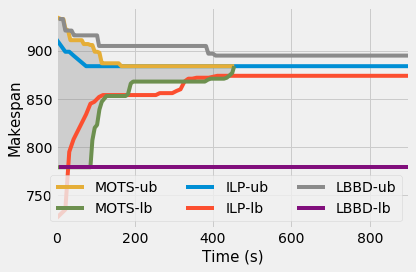

In [70]:
bounds = [(0, 935.0, 779), (12, 933.0, 779), (18, 933.0, 779), (23, 923.0, 779), (30, 921.0, 779), (36, 911, 779), (42, 911, 779), (48, 911, 779), (53, 911, 779), (59, 911, 779), (65, 911, 779), (70, 907, 779), (76, 907, 779), (81, 907, 779), (87, 906, 779), (92, 906, 807), (98, 899, 820), (104, 899, 823), (110, 898, 839), (116, 887, 847), (122, 887, 850), (128, 887, 853), (135, 887, 853), (142, 887, 853), (148, 887, 853), (153, 887, 853), (159, 887, 853), (166, 884, 853), (172, 884, 853), (177, 884, 853), (183, 884, 855), (190, 884, 866), (196, 884, 868), (203, 884, 868), (208, 884, 868), (214, 884, 868), (220, 884, 868), (226, 884, 868), (232, 884, 868), (239, 884, 868), (246, 884, 868), (254, 884, 868), (260, 884, 868), (267, 884, 868), (274, 884, 868), (281, 884, 868), (288, 884, 868), (295, 884, 868), (300, 884, 868), (308, 884, 868), (315, 884, 868), (322, 884, 868), (329, 884, 868), (335, 884, 868), (342, 884, 868), (349, 884, 868), (356, 884, 868), (363, 884, 868), (370, 884, 868), (379, 884, 868), (387, 884, 870), (394, 884, 871), (399, 884, 871), (406, 884, 871), (414, 884, 871), (421, 884, 871), (428, 884, 871), (435, 884, 872), (441, 884, 874), (449, 884, 877), (454, 884, 884)]

ilp_bouonds = [(0, 481, 361), (10, 440, 419), (20, 424, 421), (30, 424, 421), (40, 423, 421), (50, 422.9999993373379, 421.0), (60, 422.99999804239786, 421.0), (70, 422.99997406177556, 421.0), (80, 422.99997406177556, 421.0), (90, 422.99997406177556, 421.0), (101, 422.99997406177556, 421.0), (111, 422.99997406177556, 421.0), (121, 422.99997406177556, 421.0), (131, 422.99997406177556, 421.0), (142, 422.99997406177556, 421.0), (153, 422.99997406177556, 421.0), (163, 422.99997406177556, 421.0), (173, 422.9999740193755, 421.0), (184, 422.9999740193755, 421.0), (194, 422.9999740193755, 421.0), (204, 422.9999740193755, 421.0), (215, 422.9999740193755, 421.0), (225, 422.9999740193755, 421.0), (235, 422.9999740193755, 421.0), (246, 422.9999740193755, 421.0), (256, 422.9999740193755, 421.0), (267, 422.9999740193755, 421.0), (277, 422.9999740193755, 421.0), (288, 422.9999740193755, 421.0), (298, 422.9999740193755, 421.0), (308, 422.9999740193755, 421.0), (318, 422.9999740193755, 421.0), (329, 422.9999740193755, 421.0), (339, 422.9999740193755, 421.0), (349, 422.9999740193755, 421.0), (360, 422.9999740193755, 421.0), (370, 422.9999740193755, 421.0), (380, 422.9999740193755, 421.0), (390, 422.9999740193755, 421.0), (400, 422.9999740193755, 421.0), (410, 422.9999740193755, 421.0), (420, 422.9999740193755, 421.0), (430, 422.9999740193755, 421.0), (441, 422.9999740193755, 421.0), (451, 422.9999740193755, 421.0), (461, 422.9999740193755, 421.0), (471, 422.9999740193755, 421.0), (482, 422.9999740193755, 421.0), (492, 422.9999740193755, 421.0), (502, 422.9999740193755, 421.0), (512, 422.9999740193755, 421.0), (523, 422.9999740193755, 421.0), (533, 422.9999740193755, 421.0), (544, 422.9999740193755, 421.0), (555, 422.9999740193755, 421.0), (565, 422.9999740193755, 421.0), (575, 422.9999740193755, 421.0), (586, 422.9999740193755, 421.0), (596, 422.9999740193755, 421.0), (606, 422.9999740193755, 421.0), (617, 422.9999740193755, 421.0), (627, 422.9999740193755, 421.0), (637, 422.9999740193755, 421.0), (647, 422.9999740193755, 421.0), (657, 422.9999740193755, 421.0), (667, 422.9999740193755, 421.0), (678, 422.9999740193755, 421.0), (688, 422.9999740193755, 421.0), (699, 422.9999740193755, 421.0), (709, 422.9999740193755, 421.0), (719, 422.9999740193755, 421.0), (729, 422.9999740193755, 421.0), (739, 422.9999740193755, 421.0), (750, 422.9999740193755, 421.0), (760, 422.9999740193755, 421.0), (770, 422.99995192999984, 421.0), (780, 422.99995192999984, 421.0), (791, 422.99995192999984, 421.0), (801, 422.99995192999984, 421.0), (811, 422.99995192999984, 421.0), (821, 422.99995192999984, 421.0), (832, 422.99995192999984, 421.0), (842, 422.99995192999984, 421.0), (853, 422.99995192999984, 421.0), (863, 422.99995192999984, 421.0), (874, 422.99995192999984, 421.0), (884, 422.99995192999984, 421.0), (894, 422.99995192999984, 421.0)]
ilp_bouonds = [(0, 911.9999999999986, 726.0), (23, 898.9999999999977, 734.9999933478495), (33, 898.9999999099977, 795.0), (44, 895.0, 808.0), (76, 883.99999991148, 834.0000000000002), (87, 883.99999991148, 845.0), (97, 883.99999991148, 847.0), (109, 883.99999991148, 852.0000000000001), (119, 883.99999991148, 853.9999999999808), (129, 883.99999991148, 854.0000000000001), (139, 883.99999991148, 854.0000000000008), (149, 883.9999992303418, 854.0000000000008), (159, 883.9999992303418, 854.0000000000008), (169, 883.9999992303418, 854.0000000000008), (180, 883.9999992303418, 854.0000000000008), (192, 883.9999992303418, 854.0000000000008), (202, 883.9999992303418, 854.0000000000008), (213, 883.9999992303418, 854.0000000000008), (223, 883.9999992303418, 854.0000000000008), (233, 883.9999992303418, 854.0000000000008), (243, 883.9999992303418, 854.0000000000008), (254, 883.9999992303418, 854.0000000000008), (264, 883.9999992303418, 855.9999999999839), (274, 883.9999992303418, 856.0), (284, 883.9999992303418, 856.0), (296, 883.9999992303418, 856.0), (307, 883.9999992303418, 858.2966069386199), (317, 883.9999992303418, 860.0), (327, 883.9999992303418, 867.9999999999839), (337, 883.9999992303418, 870.9999999999839), (347, 883.9999992303418, 871.0), (358, 883.9999992303418, 871.9999999999839), (368, 883.9999992303418, 871.999999999988), (378, 883.9999992303418, 871.999999999988), (389, 883.9999992303418, 872.0), (400, 883.9999992303418, 872.9999999999839), (411, 883.9999992303418, 873.9999999999835), (422, 883.9999992303418, 873.9999999999835), (432, 883.9999992303418, 873.9999999999835), (442, 883.9999992303418, 873.9999999999835), (452, 883.9999992303418, 873.9999999999835), (464, 883.9999992303418, 873.9999999999835), (475, 883.9999992303418, 873.9999999999835), (485, 883.9999992303418, 873.9999999999835), (495, 883.9999992303418, 873.9999999999835), (900, 883.9999992303418, 873.9999999999835)]

lbbd_bounds = [(6, 933.0, 779), (12, 933.0, 779), (17, 933.0, 779), (23, 921.0, 779), (28, 921.0, 779), (33, 921.0, 779), (39, 921.0, 779), (45, 916.0, 779), (51, 916.0, 779), (57, 916.0, 779), (63, 916.0, 779), (69, 916.0, 779), (74, 916.0, 779), (79, 916.0, 779), (86, 916.0, 779), (92, 916.0, 779), (97, 916.0, 779), (104, 916.0, 779), (109, 905.0, 779), (114, 905.0, 779), (121, 905.0, 779), (127, 905.0, 779), (134, 905.0, 779), (139, 905.0, 779), (145, 905.0, 779), (152, 905.0, 779), (158, 905.0, 779), (165, 905.0, 779), (172, 905.0, 779), (179, 905.0, 779), (186, 905.0, 779), (193, 905.0, 779), (200, 905.0, 779), (206, 905.0, 779), (211, 905.0, 779), (218, 905.0, 779), (225, 905.0, 779), (230, 905.0, 779), (237, 905.0, 779), (244, 905.0, 779), (250, 905.0, 779), (257, 905.0, 779), (265, 905.0, 779), (272, 905.0, 779), (278, 905.0, 779), (283, 905.0, 779), (289, 905.0, 779), (296, 905.0, 779), (303, 905.0, 779), (308, 905.0, 779), (314, 905.0, 779), (322, 905.0, 779), (328, 905.0, 779), (333, 905.0, 779), (339, 905.0, 779), (344, 905.0, 779), (349, 905.0, 779), (358, 905.0, 779), (364, 905.0, 779), (371, 905.0, 779), (377, 905.0, 779), (382, 905.0, 779), (388, 897.0, 779), (394, 897.0, 779), (400, 897.0, 779), (406, 895.0, 779), (411, 895.0, 779), (417, 895.0, 779), (424, 895.0, 779), (430, 895.0, 779), (436, 895.0, 779), (448, 895.0, 779), (455, 895.0, 779), (468, 895.0, 779), (479, 895.0, 779), (489, 895.0, 779), (496, 895.0, 779), (503, 895.0, 779), (511, 895.0, 779), (518, 895.0, 779), (525, 895.0, 779), (533, 895.0, 779), (542, 895.0, 779), (550, 895.0, 779), (555, 895.0, 779), (562, 895.0, 779), (570, 895.0, 779), (576, 895.0, 779), (588, 895.0, 779), (598, 895.0, 779), (611, 895.0, 779), (617, 895.0, 779), (624, 895.0, 779), (631, 895.0, 779), (638, 895.0, 779), (649, 895.0, 779), (655, 895.0, 779), (661, 895.0, 779), (668, 895.0, 779), (678, 895.0, 779), (690, 895.0, 779), (701, 895.0, 779), (708, 895.0, 779), (717, 895.0, 779), (723, 895.0, 779), (732, 895.0, 779), (739, 895.0, 779), (749, 895.0, 779), (760, 895.0, 779), (766, 895.0, 779), (779, 895.0, 779), (785, 895.0, 779), (792, 895.0, 779), (798, 895.0, 779), (805, 895.0, 779), (812, 895.0, 779), (821, 895.0, 779), (831, 895.0, 779), (839, 895.0, 779), (846, 895.0, 779), (852, 895.0, 779), (859, 895.0, 779), (867, 895.0, 779), (875, 895.0, 779), (885, 895.0, 779), (894, 895.0, 779), (909, 895.0, 779)]
greedyant = [(10, 936.75), (20, 929.75), (30, 927.75), (40, 922.75), (50, 922.75), (60, 922.75), (70, 922.75), (80, 922.75), (90, 922.75), (100, 922.75), (110, 922.75), (120, 922.75), (130, 922.75), (140, 922.75), (150, 922.75), (160, 922.75), (170, 922.75), (180, 922.75), (190, 922.75), (200, 922.75), (210, 922.75), (220, 922.75), (230, 922.75), (240, 922.75), (250, 922.75), (260, 922.75), (270, 922.75), (280, 922.75), (291, 922.75), (301, 922.75), (311, 922.75), (321, 922.75), (331, 922.75), (341, 922.75), (351, 922.75), (361, 922.75), (371, 922.75), (381, 922.75), (391, 922.75), (401, 922.75), (411, 922.75), (421, 922.75), (431, 922.75), (441, 922.75), (451, 922.75), (461, 922.75), (471, 922.75), (481, 922.75), (491, 922.75), (501, 922.75), (511, 922.75), (521, 922.75), (531, 922.75), (542, 922.75), (552, 922.75), (562, 922.75), (572, 922.75), (582, 922.75), (592, 922.75)]

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

left, bottom, width, height = 0.12, 0.15, 0.85, 0.8

inter = 1
t_hybrid = [e[0] for e in bounds][::inter]
ub = [e[1] for e in bounds][::inter]
lb = [e[2] for e in bounds][::inter]

# ax.fill_between(t_hybrid, ub, lb, color='red', alpha='0.5')
# Data for plotting
# inter = 2
t_ilp = [e[0] for e in ilp_bouonds][::inter]
ub_ilp = [e[1] for e in ilp_bouonds][::inter]
lb_ilp = [e[2] for e in ilp_bouonds][::inter]



# lbbd
# inter = 1
t_lbbd = [e[0] for e in lbbd_bounds][::inter]
ub_lbbd = [e[1] for e in lbbd_bounds][::inter]
lb_lbbd = [e[2] for e in lbbd_bounds][::inter]

# lbbd_ub, = ax.plot(t_lbbd, ub_lbbd, marker='^')
# lbbd_lb, = ax.plot(t_lbbd, lb_lbbd, linestyle='-.', marker='v')

t_ant = [e[0] for e in greedyant][::inter]
obj_ant = [e[1] for e in greedyant][::inter]


plt.show()


"""
===========================
FiveThirtyEight style sheet
===========================

This shows an example of the "fivethirtyeight" styling, which
tries to replicate the styles from FiveThirtyEight.com.
"""

from matplotlib import pyplot as plt
import numpy as np


plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ilp_ub, = ax.plot(t_ilp, ub_ilp)
ilp_lb, = ax.plot(t_ilp, lb_ilp)
hybrid_ub, = ax.plot(t_hybrid, ub)
hybrid_lb, = ax.plot(t_hybrid, lb)
lbbd_ub, = ax.plot(t_lbbd, ub_lbbd)
lbbd_lb, = ax.plot(t_lbbd, lb_lbbd)
ax.fill_between(t_hybrid, lb, ub, color='grey', alpha='0.3')
# ax.plot(t_ant, obj_ant)
# ax.set_title("'fivethirtyeight' style sheet")
plt.legend([hybrid_ub, hybrid_lb, ilp_ub, ilp_lb, lbbd_ub, lbbd_lb], 
           ['MOTS-ub', 'MOTS-lb', 'ILP-ub', 'ILP-lb', 'LBBD-ub', 'LBBD-lb'], 
           loc = 'lower right', ncol=3)  

ax.set_xlabel('Time (s)', fontsize=15)
ax.set_ylabel('Makespan', fontsize=15)
ax.set_xlim(0, 900)
ax.legend(fontsiz=8)
plt.tight_layout()
plt.savefig('./boundings30.png', format='png', dpi=500) 
plt.show()

In [13]:
#1x data

#1x hybrid
hybrid_makespan =  [422, 502, 577, 507, 473, 434, 448, 428, 457, 470]
hybrid_time_cost =  [69.60253143310547, 3.082562208175659, 3.2466893196105957, 3.664180040359497, 9.41733694076538, 11.461981058120728, 23.180802583694458, 17.792450666427612, 10.073326349258423, 70.54456901550293]
#ilp
ilp_makespan =  [422, 502, 576, 507, 473, 434, 448, 428, 457, 470]
ilp_time_cost =  [900.4877998828888, 1.3940341472625732, 4.790352821350098, 2.886789321899414, 6.383633852005005, 15.795183420181274, 264.5087699890137, 144.8513526916504, 24.339415550231934, 900.5922515392303]
np.mean(time_cost)

lbbd_makespan =  [425, 533, 610, 574, 517, 446, 476, 438, 481, 472]
lbbd_time_cost =  [113, 900, 900, 900, 901, 902, 901, 901, 901, 68]
gap =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#0x data
lbbd_makespan0x =  [410, 483, 574, 529, 479, 415, 434, 434, 459, 460]
lbbd_time_cost0x =  [49, 900, 901, 900, 901, 115, 16, 5, 902, 9]

hybrid_makespan0x =  [410, 483, 556, 488, 455, 415, 434, 434, 443, 460]
hybrid_time_cost0x =  [6.455303430557251, 3.0724401473999023, 2.855010747909546, 3.625612258911133, 16.21749496459961, 6.89749813079834, 3.2974531650543213, 8.25018572807312, 6.435393810272217, 1.6580262184143066]

ilp_makespan0x =  [409, 482, 556, 488, 455, 414, 433, 422, 443, 460]
ilp_time_cost0x =  [11.208873748779297, 1.5286164283752441, 2.255857467651367, 2.036254405975342, 4.791229724884033, 11.54779577255249, 4.91709303855896, 901.281546831131, 8.577494859695435, 2.8016088008880615]
np.mean(lbbd_time_cost0x)


#0.5xdata
ilp_makespan_half =  [415, 493, 567, 491, 466, 424, 445, 426, 443, 465]
ilp_time_cost_half =  [900.431738615036, 1.375990629196167, 1.6510987281799316, 2.8472483158111572, 7.997384309768677, 31.260220050811768, 17.00129795074463, 832.9160761833191, 20.88076639175415, 116.58655285835266]

lbbd_makespan_half = [415, 528, 583, 562, 513, 431, 465, 457, 475, 469]
lbbd_time_half = [72, 900, 900, 900.5224194526672, 903.5738565921783, 902.7782123088837, 901.6081185340881, 903.1490190029144, 903.1195771694183, 34.461588859558105]
lbbd_gap_half =  [0.21708, 0.16179, 0.01624, 0.04086, 0.01532, 0.08211, 0.00213]

hybrid_makespan_half =  [416, 493, 567, 491, 467, 424, 445, 426, 444, 465]
hybrid_time_cost_half =  [69.85500836372375, 3.220364570617676, 5.877144813537598, 3.3764500617980957, 10.971371173858643, 8.6055326461792, 13.193519115447998, 58.382062673568726, 11.16690707206726, 43.50507354736328]


#2x data
ilp_makespan_2x =  [476, 553, 613, 547, 513, 529, 484, 475, 545, 514]
ilp_time_cost_2x =  [900.5417592525482, 2.754818916320801, 4.946219205856323, 5.759995698928833, 32.87741661071777, 92.65462613105774, 3.275404214859009, 97.07331919670105, 148.31520414352417, 900.6734583377838]
gap =  [0.04193, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07767]

hybrid_makespan2x =  [485, 554, 613, 548, 513, 529, 485, 475, 545, 514]
hybrid_time_cost2x =  [900, 7, 4.8, 8, 7.785, 82, 4, 29, 60, 370]

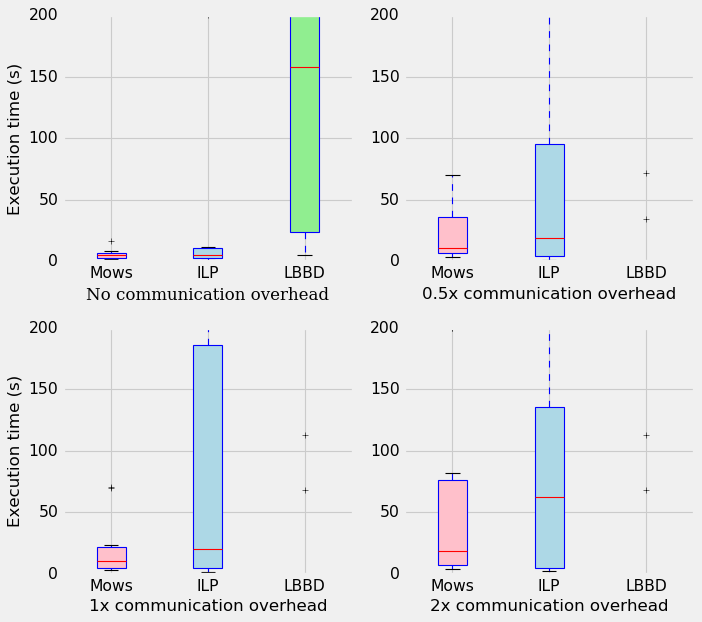

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
labels = ['Mows', 'ILP', 'LBBD']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 8))

plt.style.use('fivethirtyeight')
limit400 = lambda x : [min(e, 200) for e in x]
# notch shape box plot
bplot1 = axes[0][0].boxplot([limit400(hybrid_time_cost0x), limit400(ilp_time_cost0x),
                             limit400(lbbd_time_cost0x)],
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks

#axes[1].set_title('Notched box plot')

# rectangular box plot
bplot2 = axes[0][1].boxplot([limit400(hybrid_time_cost_half), limit400(ilp_time_cost_half),
                             limit400(lbbd_time_half)],
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
#axes[0].set_title('Rectangular box plot')


# rectangular box plot
bplot3 = axes[1][0].boxplot([limit400(hybrid_time_cost), limit400(ilp_time_cost),
                             limit400(lbbd_time_cost)],
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks

# rectangular box plot
bplot4 = axes[1][1].boxplot([limit400(hybrid_time_cost2x), limit400(ilp_time_cost_2x),
                             limit400(lbbd_time_cost)],
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
#axes[0].set_title('Rectangular box plot')

# 设置图例并且设置图例的字体及大小
font1 = {'family': 'serif',
         'weight': 'normal',
         'size': 15,
         }

# axes[0][1].set_ylim(0, 400)
# axes[1][0].set_ylim(0, 400)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2, bplot3, bplot4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
# for ax in axes:
axes[0][0].yaxis.grid(True)
axes[0][1].yaxis.grid(True)
axes[1][0].yaxis.grid(True)
axes[1][1].yaxis.grid(True)

axes[0][0].set_xlabel('No communication overhead', font1)
axes[0][0].set_ylabel('Execution time (s)', fontsize=15)
axes[0][1].set_xlabel('0.5x communication overhead', fontsize=15)
axes[1][0].set_xlabel('1x communication overhead', fontsize=15)
axes[1][0].set_ylabel('Execution time (s)', fontsize=15)
axes[1][1].set_xlabel('2x communication overhead', fontsize=15)
# axes[1].set_xlabel('0.5x communication overhead', fontsize=15)
plt.tight_layout()
plt.savefig('./Communication.png', format='png', dpi=500) 
plt.show()

In [2]:
import numpy as np

#Cases with 20 tasks
#ilp

[(10, 968.9999999999936, 280.6183389968389), (20, 868.9999999129997, 377.99999999999375), (30, 850.999999829598, 448.9999999999998), (45, 850.999999829598, 502.999999999997), (55, 850.999999829598, 519.9999999999999), (65, 850.999999829598, 581.0000000000001), (86, 850.999999829598, 581.0000000000001), (96, 850.999999829598, 581.0000000000001), (106, 850.999999829598, 581.0000000000001), (117, 850.999999829598, 581.0000000000001), (127, 850.999999829598, 581.0000000000001), (138, 850.999999829598, 581.0000000000001), (148, 850.999999829598, 581.0000000000001), (159, 850.999999829598, 581.0000000000001), (169, 850.999999829598, 581.0000000000001), (179, 850.999999829598, 581.0000000000001), (190, 850.999999829598, 603.0000000000002), (200, 850.999999829598, 637.9632183939332), (211, 850.999999829598, 682.17180465964), (221, 850.999999829598, 757.0315789473686), (10, 832.9999998331983, 651.999999999996), (12, 953.0000000000248, 397.00000000001705), (22, 902.9999999096, 443.9999999999985), (32, 893.0000000000011, 481.99999999999875), (42, 893.0000000000011, 481.9999999999991), (53, 876.0000000000008, 542.9999999999998), (70, 875.9999999123007, 543.9999999999985), (80, 875.9999999123007, 543.9999999999985), (90, 875.9999999123007, 543.9999999999985), (101, 875.9999999123007, 543.9999999999985), (111, 868.9999999999992, 584.9999999999994), (121, 868.9999999129991, 616.0000000000002), (131, 868.9999999129991, 652.0000000000022), (142, 868.9999999129991, 674.9999999999995), (152, 868.9999999129991, 687.999999999999), (163, 868.9999999129991, 722.3592814371742), (173, 868.9999999129991, 733.0000000000016), (183, 868.9999999129991, 758.9999999999995), (193, 868.9999999129991, 791.0000000000007), (203, 868.9999999129991, 810.0000000000001), (10, 963.9999999999598, 265.14521161690055), (20, 938.9999999999992, 318.9999999999992), (30, 921.9999999076902, 469.0000000000007), (40, 921.9999999076902, 503.0000000000001), (51, 921.9999999076902, 527.1177802968692), (87, 921.9999999076902, 531.0000000000042), (98, 921.9999999076902, 531.0000000000042), (108, 921.9999999076902, 531.0000000000042), (119, 921.9999999076902, 531.0000000000042), (130, 921.9999999076902, 531.0000000000042), (140, 921.9999999076902, 531.0000000000042), (150, 921.9999999076902, 531.0000000000042), (160, 921.9999999076902, 531.0000000000042), (170, 921.9999999076902, 545.0000000000003), (180, 921.9999999076902, 547.9999999999999), (190, 921.9999999076902, 547.9999999999999), (201, 921.9999999076902, 547.9999999999999), (211, 921.9999999076902, 555.0), (222, 921.9999999076902, 560.0000000000001), (233, 921.9999999076902, 560.0000000000001), (243, 921.9999998153777, 560.0000000000001), (253, 921.9999998153777, 560.0000000000001), (263, 921.9999998153777, 560.0000000000001), (274, 921.9999998153777, 560.0000000000001), (285, 921.9999998153777, 560.0000000000001), (296, 921.9999998153777, 560.0000000000001), (307, 921.9999998153777, 560.0000000000001), (319, 921.9999998153777, 560.0000000000001), (329, 921.9999998153777, 560.0000000000001), (344, 921.9999998153777, 560.0000000000001), (355, 921.9999998153777, 560.0000000000001), (365, 921.9999998153777, 560.0000000000001), (375, 921.9999998153777, 560.0000000000001), (385, 921.9999998153777, 560.0000000000001), (395, 921.9999998153777, 560.0000000000001), (406, 921.9999998153777, 560.0000000000001), (416, 921.9999998153777, 560.0000000000001), (427, 921.9999998153777, 560.0000000000001), (438, 921.9999998153777, 560.0000000000001), (448, 921.9999998153777, 560.0000000000001), (458, 921.9999998153777, 560.0000000000001), (469, 921.9999998153777, 560.0000000000001), (479, 921.9999998153777, 560.0000000000001), (489, 921.9999998153777, 560.0000000000001), (499, 921.9999998153777, 560.0000000000001), (510, 903.0000000000013, 560.0000000000001), (521, 903.0000000000013, 560.0000000000001), (531, 903.0000000000013, 568.0000000000007), (542, 903.0000000000013, 585.0000000000005), (552, 889.9999999999987, 598.9839021043991), (563, 887.9999999999939, 619.0000000000009), (575, 887.9999999999939, 624.5896880289661), (586, 887.9999999999939, 631.9999999999994), (596, 887.9999999110937, 637.6118825017946), (606, 887.9999999110937, 644.0000000000011), (617, 887.9999999110937, 655.9518102982056), (627, 887.9999999110937, 662.1136954611331), (638, 887.9999999110937, 671.0000000000016), (648, 887.9999999110937, 677.0000000000014), (658, 887.9999999110937, 685.0000000000005), (669, 887.9999999110937, 689.237623771571), (679, 887.9999999110937, 695.1645569620255), (689, 887.9999999110937, 700.0000000000007), (699, 887.9999999110937, 704.235668789808), (709, 887.9999999110937, 708.000000000001), (720, 887.9999999110937, 714.7163528748886), (730, 887.9999999110937, 721.7118644067806), (741, 887.9999999110937, 726.0000000000014), (751, 884.9999999999977, 729.6609195402299), (761, 884.9999999999977, 738.6445714132456), (772, 884.9999999999977, 742.0000000000033), (782, 884.9999999999977, 751.0000000000014), (792, 884.9999999113976, 756.000000000002), (803, 884.9999999113976, 760.000000000002), (813, 884.9999999113976, 766.1140065146594), (823, 884.9999999113976, 777.551087263486), (834, 884.9999999113976, 783.0000000000018), (844, 884.9999999113976, 794.0), (854, 884.9999999113976, 800.6219714533153), (865, 884.9999999113976, 813.0), (875, 884.9999999113976, 819.8206521739135), (886, 884.9999999113976, 837.0000000000018), (896, 873.9999999999842, 861.0000000000009), (10, 905.0000000000105, 247.99999999998656), (20, 905.0000000000105, 306.9999999999834), (30, 869.999999999996, 306.9999999999834), (40, 856.9999999142003, 338.7148966692023), (54, 856.9999998283957, 344.5443670876066), (64, 835.9999999999953, 344.5443670876066), (74, 835.9999999162952, 458.0000000000007), (122, 835.9999999162952, 511.0000000000007), (132, 835.9999999162952, 511.0000000000007), (143, 835.9999999162952, 511.0000000000007), (153, 835.9999999162952, 511.0000000000007), (163, 835.9999999162952, 511.0000000000007), (174, 835.9999999162952, 511.0000000000007), (184, 835.9999999162952, 517.4197379614731), (194, 835.9999999162952, 525.9999999999993), (204, 835.9999999162952, 560.2761904817941), (215, 835.9999999162952, 578.4061151079142), (225, 835.9999999162952, 585.000000000001), (236, 835.9999999162952, 588.8404778636748), (246, 835.9999999162952, 595.4425185794801), (256, 835.9999999162952, 607.0000000000009), (266, 835.9999999162952, 618.2761904817946), (276, 835.9999999162952, 634.2376066360276), (286, 835.9999999162952, 636.0), (302, 835.9999999162952, 636.0), (312, 835.9999999162952, 636.0), (325, 835.9999999162952, 636.0), (338, 835.9999999162952, 636.0), (348, 835.9999999162952, 636.0), (358, 835.9999999162952, 636.0), (368, 835.9999999162952, 636.0), (379, 835.9999999162952, 636.0), (391, 835.9999999162952, 636.0), (402, 835.9999999162952, 636.0), (412, 835.9999999162952, 636.0), (423, 835.9999999162952, 636.0), (436, 835.9999999162952, 636.0), (451, 835.9999999162952, 636.0), (462, 835.9999999162952, 636.0), (472, 835.9999999162952, 636.0), (482, 835.9999999162952, 636.0), (493, 835.9999999162952, 636.0), (503, 835.9999999162952, 636.0), (514, 835.9999999162952, 636.0), (524, 835.9999999162952, 636.0), (535, 835.9999999162952, 636.0), (545, 835.9999999162952, 636.0), (556, 835.9999999162952, 636.0), (566, 835.9999999162952, 636.0), (576, 826.0000000000002, 636.0), (673, 825.9999999173001, 636.0), (684, 825.9999999173001, 636.0), (695, 825.9999999173001, 636.0), (705, 825.9999999173001, 636.0), (716, 825.9999999173001, 636.0), (726, 825.9999999173001, 636.0), (736, 825.9999999173001, 636.0), (747, 825.9999999173001, 636.0), (758, 825.9999999173001, 636.0), (770, 825.9999999173001, 636.0), (780, 825.9999999173001, 636.0), (790, 825.9999999173001, 636.0), (800, 825.9999999173001, 636.0), (810, 825.9999999173001, 636.0), (821, 825.9999999173001, 636.0), (831, 825.9999999173001, 636.0), (841, 825.9999999173001, 636.0), (851, 825.9999999173001, 636.0), (861, 825.9999999173001, 636.0), (872, 825.9999999173001, 636.0), (882, 825.9999999173001, 636.0), (892, 825.9999999173001, 636.0), (902, 825.9999999173001, 639.8322189679889), (912, 825.9999999173001, 641.3405150433452), (923, 825.9999999173001, 643.000000000001), (933, 825.9999999173001, 646.259516233394), (944, 825.9999999173001, 649.0000000000016), (955, 825.9999999173001, 652.0000000000001), (965, 825.9999999173001, 655.789154738846), (975, 825.9999999173001, 660.7763157894739), (987, 825.9999999173001, 667.2097378277169), (998, 825.9999999173001, 673.8666137356098), (1008, 825.999999751898, 677.0000000000006), (1018, 825.999999751898, 679.8802395209588), (1028, 825.999999751898, 685.0000000000006), (1039, 825.999999751898, 687.9999999999995), (1049, 825.999999751898, 688.2015149588802), (1060, 825.999999751898, 691.1562500000005), (1070, 825.999999751898, 694.9999999999998), (1080, 825.999999751898, 695.0000000000007), (1090, 825.999999751898, 697.9999999999997), (1101, 825.999999751898, 698.0000000000001), (1111, 825.999999751898, 699.0000000000007), (1121, 825.999999751898, 700.000000000001), (1131, 825.999999751898, 701.0000000000019), (1142, 825.999999751898, 703.8761492385706), (1152, 825.999999751898, 705.9999999999887), (1162, 825.999999751898, 708.0000000000015), (1173, 825.999999751898, 710.2999999999997), (1183, 825.999999751898, 712.0000000000001), (1193, 817.0000000000038, 716.0000000000009), (1203, 817.0000000000038, 718.9999999999999), (1213, 816.9999999182037, 722.0000000000001), (1224, 816.9999999182037, 725.9905660377357), (1234, 816.9999999182037, 732.0), (1244, 816.9999999182037, 735.054298642534), (1255, 816.9999999182037, 741.0), (1265, 816.9999999182037, 742.000000000001), (1275, 816.9999999182037, 747.9999999999997), (1285, 816.9999999182037, 748.0), (1295, 816.9999999182037, 748.9999999999997), (1305, 816.9999999182037, 749.5350869470631), (1316, 816.9999999182037, 754.0000000000001), (1326, 816.9999999182037, 756.0000000000015), (1336, 812.9999999999983, 758.000000000001), (1346, 793.9999999022126, 770.4609804432012), (1356, 793.9999999022126, 788.0000000000011)]
makespan =  [926, 871, 933, 870, 828, 816, 807, 869, 874, 797]
time_cost =  [3, 2, 4, 6, 6, 223, 18, 214, 899, 607]
gap =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

#mots 
makespan =  [926, 871, 933, 870, 828, 816, 807, 869, 874, 797]
time_cost =  [6, 6, 11, 25, 13, 44, 23, 71, 185, 395]
gap =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

#lbbd
makespan =  [937, 920, 962, 980, 905, 878, 823, 908, 889, 1004]
time_cost =  [3601, 1041, 2252, 3600, 3600, 3601, 1080, 3601, 3602, 3601]
gap =  [0.11099, 0.00109, 0.00104, 0.23673, 0.23978, 0.14123, 0.00122, 0.05396, 0.13498, 0.37595]


# Cases with 30 tasks
#mots
curve = [(0.7169206142425537, 1331.3999999999999, 350), (1.4278252124786377, 1312, 901), (2.312485456466675, 1155.0, 901), (3.543002128601074, 1140.0, 901), (4.822045803070068, 1140.0, 901), (6.616506576538086, 1140.0, 901), (8.743269681930542, 1135.0, 901), (11.283438205718994, 1135.0, 901), (13.316737413406372, 1135.0, 901), (15.236350536346436, 1135.0, 901), (17.441020011901855, 1135.0, 901), (20.07770538330078, 1135.0, 901), (22.462636709213257, 1135.0, 901), (24.525290489196777, 1135.0, 901), (26.68085503578186, 1135.0, 901), (29.464526653289795, 1133.0, 901), (32.14936566352844, 1133.0, 901), (34.7917160987854, 1133.0, 901), (37.543915033340454, 1133.0, 901), (40.573633432388306, 1133.0, 901), (43.94625544548035, 1133.0, 901), (46.624483823776245, 1133.0, 901), (49.56618094444275, 1133.0, 901), (52.92552709579468, 1133.0, 901), (56.403964042663574, 1133.0, 901), (60.57231283187866, 1133.0, 901), (63.79191040992737, 1133.0, 901), (67.1406626701355, 1133.0, 901), (70.90690350532532, 1133.0, 901), (74.3406572341919, 1133.0, 901), (77.26679372787476, 1133.0, 901), (80.16318821907043, 1133.0, 901), (83.51035404205322, 1133.0, 901), (86.89579796791077, 1133.0, 901), (89.87100195884705, 1133.0, 901), (93.2061038017273, 1133.0, 901), (96.79800510406494, 1133.0, 901), (100.40712881088257, 1133.0, 901), (103.357346534729, 1133.0, 901), (107.02383089065552, 1133.0, 901), (110.04822206497192, 1133.0, 901), (113.64685940742493, 1133.0, 901), (117.10826897621155, 1133.0, 901), (121.24376893043518, 1133.0, 901), (124.99310684204102, 1111, 901), (129.17980027198792, 1111, 901), (132.73147106170654, 1111, 901), (136.43678259849548, 1111, 901), (139.80555033683777, 1111, 901), (143.79693722724915, 1111, 901), (148.89075803756714, 1111, 901), (153.00655102729797, 1111, 901), (157.3249478340149, 1111, 901), (161.43110179901123, 1111, 901), (166.57257556915283, 1111, 901), (171.0174822807312, 1111, 901), (175.03830647468567, 1111, 901), (180.2089328765869, 1111, 901), (185.40098094940186, 1111, 901), (190.545836687088, 1111, 901), (194.08879733085632, 1111, 901), (198.9381387233734, 1111, 901), (203.3730058670044, 1111, 901), (207.9937813282013, 1111, 901), (212.3880763053894, 1111, 901), (217.2161157131195, 1111, 901), (221.77635741233826, 1111, 901), (226.6531846523285, 1111, 901), (232.31266045570374, 1111, 901), (238.23100924491882, 1111, 901), (242.870183467865, 1111, 901), (248.2382514476776, 1111, 901), (253.98523235321045, 1111, 901), (258.32532262802124, 1111, 901), (263.2217538356781, 1111, 901), (268.4145565032959, 1111, 901), (273.1589958667755, 1111, 901), (277.4195947647095, 1111, 901), (281.7650315761566, 1111, 901), (286.21790289878845, 1111, 901), (290.46861267089844, 1111, 901), (294.7573096752167, 1111, 901), (299.4007577896118, 1111, 901), (304.35279178619385, 1111, 901), (309.62860584259033, 1111, 901), (314.1048171520233, 1111, 901), (319.5919153690338, 1111, 901), (326.0817406177521, 1111, 901), (330.6657392978668, 1111, 901), (335.0416307449341, 1111, 901), (339.43902492523193, 1111, 901), (344.21538162231445, 1111, 901), (348.5691342353821, 1111, 901), (353.6195080280304, 1111, 901), (358.1101772785187, 1111, 904), (361.3793339729309, 1111, 915), (364.64819979667664, 1111, 915), (368.2804172039032, 1111, 916), (372.5173306465149, 1111, 916), (378.8747012615204, 1111, 943), (384.8315966129303, 1111, 947), (389.909362077713, 1111, 957), (394.71317195892334, 1111, 957), (402.1362028121948, 1111, 957), (407.68186116218567, 1111, 957), (414.5927677154541, 1111, 957), (420.2017753124237, 1111, 957), (426.02638053894043, 1111, 957), (433.1516456604004, 1111, 957), (439.19934606552124, 1111, 957), (445.6589512825012, 1111, 957), (452.9200806617737, 1111, 957), (459.3108184337616, 1111, 957), (467.15632009506226, 1111, 957), (474.4654161930084, 1111, 957), (481.03394174575806, 1111, 957), (488.7754201889038, 1111, 957), (496.811354637146, 1111, 957), (503.80760884284973, 1111, 972), (510.6104028224945, 1111, 974), (515.8631799221039, 1111, 984), (521.7452714443207, 1111, 985), (530.760822057724, 1111, 985), (540.281165599823, 1111, 988), (548.0582029819489, 1111, 996), (555.2882609367371, 1111, 996), (564.5039689540863, 1111, 996), (572.2669186592102, 1111, 1003), (581.854017496109, 1111, 1006), (590.0080056190491, 1111, 1013), (598.2688157558441, 1111, 1013), (608.7641072273254, 1111, 1015), (617.932356595993, 1111, 1015), (628.2789633274078, 1111, 1015), (639.8839199542999, 1101, 1015), (654.220513343811, 1101, 1015), (666.6997582912445, 1101, 1015), (677.319815158844, 1101, 1015), (688.2083806991577, 1101, 1015), (699.9721620082855, 1101, 1015)]
makespan =  [1173, 1133, 1192, 1046, 1203, 1110, 1261, 1153, 1178, 1096]
time_cost =  [1158, 3600, 3600, 3600, 3600, 1198, 3600, 839, 3600, 707]
gap =  [0.0, 0.11562, 0.08893, 0.08987, 0.13134, 0.0, 0.20619, 0.0, 0.08489, 0.0]
print(np.mean(makespan))
#ilp
curve = [(10, 1475.999999999999, 391.0), (20, 1475.999999999999, 391.0), (31, 1386.9999999999995, 391.0), (41, 1296.9999999999827, 547.0000000000002), (53, 1275.99999999998, 604.0000000000002), (63, 1275.9999998722797, 611.637073602625), (73, 1275.9999998722797, 620.9999999999995), (152, 1265.999999999939, 628.0), (162, 1265.999999999939, 628.0), (173, 1265.999999999939, 628.0), (184, 1265.999999999939, 628.0), (195, 1265.999999999939, 628.0), (206, 1265.999999999939, 628.0), (217, 1265.999999999939, 628.0), (234, 1265.999999999939, 628.0), (245, 1265.999999999939, 628.0), (257, 1265.999999999939, 628.0), (267, 1265.9999998732364, 628.0), (278, 1261.0000000000005, 628.0), (289, 1261.0000000000005, 628.0), (300, 1251.9999999999802, 628.0), (313, 1251.9999999999802, 628.0), (323, 1249.9999999999889, 628.0), (334, 1249.9999999999889, 628.0), (346, 1248.9999999999955, 628.0), (358, 1248.9999999999955, 628.0), (368, 1240.0, 628.0), (381, 1225.0000000000005, 628.0), (401, 1225.0000000000005, 628.0), (413, 1225.0000000000005, 628.0), (425, 1225.0000000000005, 628.0), (437, 1225.0000000000005, 630.7755390395055), (449, 1224.9999998774, 641.4732112009215), (470, 1224.9999998774, 648.5448111380164), (481, 1224.9999998774, 657.5418926607244), (494, 1224.9999998774, 661.0), (504, 1213.9999999999984, 666.6627994633416), (515, 1213.9999999999984, 667.4142396918229), (530, 1213.9999999999984, 667.5438389049232), (540, 1213.9999999999984, 668.3807111786093), (551, 1213.9999999999984, 672.9999999999998), (562, 1213.9999999999984, 674.9999877331462), (580, 1213.9999999999984, 674.9999877331462), (593, 1213.9999999999984, 677.5609291708879), (603, 1196.9999999999961, 679.36663124244), (614, 1196.9999999999961, 680.4806070952006), (626, 1196.9999999999961, 683.5461596629393), (639, 1196.9999999999961, 683.5461596629393), (650, 1196.9999999999961, 685.3264041570469), (662, 1196.9999999999961, 686.4806070952011), (673, 1196.9999999999961, 687.0000000000005), (684, 1196.9999999999961, 688.9999999999998), (699, 1196.9999999999961, 688.9999999999999), (710, 1196.9999999999961, 691.8319281519452), (721, 1196.9999999999961, 694.1242386191069), (731, 1196.9999999999961, 695.9982460066435), (742, 1196.9999999999961, 696.0000000000002), (758, 1196.9999999999961, 697.7165663929451), (768, 1196.9999999999961, 698.8405656998701), (778, 1196.9999999999961, 701.0000000000003), (790, 1196.999999880196, 702.4889145463535), (801, 1185.9999999999977, 703.34579706364), (812, 1185.9999999999977, 704.5594611779443), (836, 1185.9999999999977, 706.112981071685), (847, 1185.9999999999977, 707.739922980781), (861, 1185.9999999999977, 707.9026547990854), (871, 1185.9999999999977, 709.4853885236827), (882, 1185.9999999999977, 710.3252151556549), (895, 1173.0, 711.2908101878724), (906, 1173.0, 712.1769754153386), (917, 1173.0, 713.0000000000005), (927, 1172.9999998825997, 714.1433011901646), (946, 1172.9999998825997, 714.4999456300847), (957, 1172.9999998825997, 715.9952646506621), (968, 1172.9999998825997, 717.6460446880419), (979, 1172.9999998825997, 718.193884143536), (989, 1172.9999998825997, 720.0000000000003), (1014, 1172.9999998825997, 720.9999667302935), (1025, 1172.9999998825997, 721.6166829968913), (1037, 1172.9999998825997, 722.668758333432), (1050, 1172.9999998825997, 723.6693452759988), (1062, 1172.9999998825997, 724.0000000000002), (1072, 1172.9999998825997, 724.934915796833), (1090, 1172.9999998825997, 724.9999490447383), (1100, 1172.9999998825997, 726.0000000000002), (1112, 1172.9999998825997, 726.9999999999998), (1123, 1172.9999998825997, 727.9377074972474), (1134, 1172.9999998825997, 729.0000000000001), (1152, 1172.9999998825997, 729.1627486628893), (1163, 1172.9999998825997, 729.9999999999998), (1174, 1172.9999998825997, 730.0501497914197), (1185, 1172.9999998825997, 730.9834524371126), (1198, 1172.9999998825997, 731.0000000000005), (1209, 1172.9999998825997, 731.5773636519218), (1235, 1172.9999998825997, 732.0819603396302), (1247, 1172.9999998825997, 732.8434107865086), (1258, 1172.9999998825997, 732.9999999999999), (1269, 1172.9999998825997, 733.056736310109), (1281, 1172.9999998825997, 733.8947977699686), (1306, 1172.9999998825997, 734.0000000000002), (1317, 1172.9999998825997, 734.8019227331862), (1328, 1172.9999998825997, 735.8434107865087), (1339, 1172.9999998825997, 736.0), (1351, 1172.9999998825997, 736.9999586529741), (1370, 1172.9999998825997, 736.9999586529741), (1380, 1172.9999998825997, 737.8319281519459), (1391, 1172.9999998825997, 737.9999999999995), (1402, 1172.9999998825997, 738.3478260869565), (1420, 1172.9999998825997, 738.6283716285781), (1430, 1172.9999998825997, 738.9999999999998), (1441, 1172.9999998825997, 739.341940858247), (1454, 1172.9999998825997, 740.0079609120592), (1472, 1172.9999998825997, 740.0275122593752), (1482, 1172.9999998825997, 740.9999999999994), (1493, 1172.9999998825997, 741.0000000000002), (1504, 1172.9999998825997, 741.9999999999997), (1516, 1172.9999998825997, 742.2277039862901), (1542, 1172.9999998825997, 742.3162091871593), (1553, 1172.9999998825997, 742.8034782702973), (1563, 1172.9999998825997, 742.9999486419298), (1574, 1172.9999998825997, 743.2431264130356), (1596, 1172.9999998825997, 743.4285714287528), (1608, 1172.9999998825997, 743.9999999999995), (1618, 1172.9999998825997, 744.4319654427628), (1630, 1172.9999998825997, 745.2014645484713), (1641, 1172.9999998825997, 745.6692748877465), (1659, 1172.9999998825997, 745.9999877331463), (1671, 1172.9999998825997, 746.0034077839467), (1684, 1172.9999998825997, 746.4780028156199), (1697, 1172.9999998825997, 746.8457970618462), (1724, 1172.9999998825997, 747.0000000000003), (1735, 1172.9999998825997, 747.0000000000003), (1746, 1172.9999998825997, 747.3777434032523), (1756, 1172.9999998825997, 747.9999999999998), (1767, 1172.9999998825997, 748.0664819944677), (1790, 1172.9999998825997, 748.6840152528716), (1801, 1172.9999998825997, 748.8434107865088), (1812, 1172.9999998825997, 749.1399230714268), (1824, 1172.9999998825997, 749.9761849177497), (1835, 1172.9999998825997, 750.124879125324), (1855, 1172.9999998825997, 750.5066617575433), (1866, 1172.9999998825997, 750.9141557706307), (1878, 1172.9999998825997, 751.2792752763604), (1889, 1172.9999998825997, 751.9999999999998), (1917, 1172.9999998825997, 752.2657406064122), (1927, 1172.9999998825997, 752.617925887047), (1938, 1172.9999998825997, 752.9999999999998), (1949, 1172.9999998825997, 753.2914731260224), (1960, 1172.9999998825997, 753.4456760641758), (1984, 1172.9999998825997, 754.0000000000002), (1995, 1172.9999998825997, 754.50932353546), (2005, 1172.9999998825997, 755.0000000000002), (2017, 1172.9999998825997, 755.5418926607244), (2027, 1172.9999998825997, 755.999999999998), (2045, 1172.9999998825997, 755.999999999998), (2055, 1172.9999998825997, 756.40301099383), (2067, 1172.9999998825997, 756.6253387534505), (2078, 1172.9999998825997, 757.1326819872105), (2088, 1172.9999998825997, 757.8248265326882), (2107, 1172.9999998825997, 758.0), (2119, 1172.9999998825997, 758.2691098985264), (2130, 1172.9999998825997, 758.6945054972488), (2141, 1172.9999998825997, 758.9999933708607), (2152, 1172.9999998825997, 759.2491649192082), (2163, 1172.9999998825997, 759.5341933535724), (2174, 1172.9999998825997, 760.0000000000002), (2199, 1172.9999998825997, 760.3692416700179), (2210, 1172.9999998825997, 760.9621125426783), (2221, 1172.9999998825997, 761.3297379251552), (2235, 1172.9999998825997, 761.8019239206245), (2247, 1172.9999998825997, 762.2752083523166), (2271, 1172.9999998825997, 762.5291456810048), (2281, 1172.9999998825997, 762.9126696258976), (2291, 1172.9999998825997, 763.5333333333331), (2301, 1172.9999998825997, 763.7924695074495), (2314, 1172.9999998825997, 764.0000000000002), (2335, 1172.9999998825997, 764.6527751092949), (2346, 1172.9999998825997, 765.1269936089593), (2356, 1172.9999998825997, 765.3972205192837), (2366, 1172.9999998825997, 766.0000000000002), (2377, 1172.9999998825997, 766.4922123750396), (2388, 1172.9999998825997, 766.9587628865976), (2406, 1172.9999998825997, 767.0000000000005), (2416, 1172.9999998825997, 767.8203724014379), (2427, 1172.9999998825997, 768.3676815473996), (2438, 1172.9999998825997, 768.9679796172463), (2449, 1172.9999998825997, 769.3336576194964), (2474, 1172.9999998825997, 769.3743080260047), (2486, 1172.9999998825997, 770.4999128534605), (2497, 1172.9999998825997, 771.1272884026993), (2509, 1172.9999998825997, 771.484414863516), (2519, 1172.9999998825997, 772.017568517219), (2536, 1172.9999998825997, 772.0238398327559), (2548, 1172.9999998825997, 772.6738455033832), (2559, 1172.9999998825997, 773.0165727957524), (2570, 1172.9999998825997, 773.4742201749842), (2581, 1172.9999998825997, 774.0000000000002), (2607, 1172.9999998825997, 774.0000000000002), (2619, 1172.9999998825997, 775.2648375939217), (2632, 1172.9999998825997, 775.6480375821526), (2643, 1172.9999998825997, 775.9999999999999), (2661, 1172.9999998825997, 776.1504799451515), (2688, 1172.9999998825997, 776.5577307363845), (2700, 1172.9999998825997, 777.0), (2711, 1172.9999998825997, 777.0), (2723, 1172.9999998825997, 777.9030731627016), (2752, 1172.9999998825997, 778.4405332600043), (2762, 1172.9999998825997, 778.9999999999997), (2772, 1172.9999998825997, 779.1508818076089), (2783, 1172.9999998825997, 779.5244690674671), (2809, 1172.9999998825997, 779.9999999999998), (2819, 1172.9999998825997, 780.4999456300852), (2831, 1172.9999998825997, 780.8586286868239), (2841, 1172.9999998825997, 781.0390346340225), (2853, 1172.9999998825997, 781.3948987194366), (2864, 1172.9999998825997, 781.4999456300903), (2891, 1172.9999998825997, 781.6649248517538), (2904, 1172.9999998825997, 782.0000000000002), (2914, 1172.9999998825997, 782.3825696463545), (2924, 1172.9999998825997, 782.6809715110592), (2936, 1172.9999998825997, 783.0), (2959, 1172.9999998825997, 783.0000000000002), (2971, 1172.9999998825997, 783.6316895669393), (2982, 1172.9999998825997, 783.999950296628), (2993, 1172.9999998825997, 784.0226445097021), (3004, 1172.9999998825997, 784.4236684945375), (3021, 1172.9999998825997, 784.4236684945377), (3031, 1172.9999998825997, 784.8657084183205), (3041, 1172.9999998825997, 784.9999999999993), (3053, 1172.9999998825997, 785.0000000000002), (3066, 1172.9999998825997, 785.2883753099751), (3077, 1172.9999998825997, 785.6283716285778), (3099, 1172.9999998825997, 785.7580343281614), (3109, 1172.9999998825997, 786.017568517219), (3120, 1172.9999998825997, 786.3219379410233), (3131, 1172.9999998825997, 786.7682188237078), (3153, 1172.9999998825997, 787.0000000000002), (3167, 1172.9999998825997, 787.0291454115614), (3178, 1172.9999998825997, 787.3021218434209), (3190, 1172.9999998825997, 787.644663952469), (3201, 1172.9999998825997, 788.0664323985752), (3212, 1172.9999998825997, 788.4176715191124), (3231, 1172.9999998825997, 788.4625917980475), (3243, 1172.9999998825997, 788.9309878228019), (3253, 1172.9999998825997, 789.0000000000002), (3263, 1172.9999998825997, 789.0888878792495), (3274, 1172.9999998825997, 789.499945630085), (3295, 1172.9999998825997, 789.6283716285778), (3306, 1172.9999998825997, 789.9999999999999), (3317, 1172.9999998825997, 790.0000000000005), (3327, 1172.9999998825997, 790.3478260869562), (3348, 1172.9999998825997, 790.3478260869564), (3359, 1172.9999998825997, 790.6480375821523), (3372, 1172.9999998825997, 790.8409984996354), (3382, 1172.9999998825997, 790.9999999999998), (3408, 1172.9999998825997, 791.0033372731701), (3419, 1172.9999998825997, 791.2114858705767), (3429, 1172.9999998825997, 791.4412238220324), (3440, 1172.9999998825997, 791.6474428683194), (3460, 1172.9999998825997, 791.843410786509), (3471, 1172.9999998825997, 791.8979818016012), (3483, 1172.9999998825997, 792.0000000000002), (3493, 1172.9999998825997, 792.2052226808008), (3520, 1172.9999998825997, 792.3478260869566), (3532, 1172.9999998825997, 792.8886592612596), (3543, 1172.9999998825997, 793.0), (3553, 1172.9999998825997, 793.0000000000003), (3564, 1172.9999998825997, 793.0000000000003), (3583, 1172.9999998825997, 793.2694031683758), (3598, 1172.9999998825997, 793.3277931671665), (10, 1332.999999999992, 363.0), (20, 1332.999999999992, 363.0), (30, 1283.9999998714998, 365.28811173508655), (41, 1278.0, 465.1309734515789), (55, 1278.0, 498.0), (65, 1277.9999998528995, 542.0), (150, 1277.9999998528995, 551.9999999999998), (160, 1277.9999998528995, 551.9999999999998), (170, 1277.9999998528995, 551.9999999999998), (181, 1277.9999998528995, 551.9999999999998), (191, 1277.9999998528995, 551.9999999999998), (202, 1277.9999998528995, 551.9999999999998), (212, 1277.9999998528995, 551.9999999999998), (234, 1277.9999998528995, 551.9999999999998), (245, 1277.9999998528995, 551.9999999999998), (255, 1277.9999998528995, 551.9999999999998), (266, 1230.9999999999984, 551.9999999999998), (276, 1173.9999998824815, 551.9999999999998), (287, 1173.9999997649813, 555.6753643100533), (297, 1173.9999997649813, 585.0), (309, 1173.9999997649813, 596.9999999999995), (320, 1173.9999997649813, 604.99999999988), (334, 1173.9999997649813, 606.3529761457024), (345, 1173.9999997649813, 612.8425672127944), (356, 1173.9999997649813, 624.99999999988), (378, 1173.9999997649813, 636.6004306672947), (389, 1173.9999997649813, 643.7006751690618), (399, 1173.9999997649813, 648.2072259359638), (415, 1173.9999997649813, 649.0384549970302), (425, 1173.9999997649813, 652.99999999988), (438, 1173.9999997649813, 655.2958593127566), (453, 1173.9999997649813, 655.6031244963431), (463, 1173.9999997649813, 658.0789175557798), (473, 1173.9999997649813, 659.9999999999995), (492, 1173.9999997649813, 661.5609205955399), (503, 1173.9999997649813, 662.6033678996382), (514, 1173.9999997649813, 664.7658444242038), (525, 1173.9999997649813, 666.435976677956), (539, 1173.9999997649813, 666.9783006152054), (550, 1173.9999997649813, 670.0), (560, 1173.9999997649813, 672.1578297909912), (579, 1173.9999997649813, 673.8965530983521), (590, 1173.9999997649813, 677.805866355749), (600, 1173.9999997649813, 680.9044234017781), (622, 1173.9999997649813, 681.9999999998797), (632, 1173.9999997649813, 683.0634737199032), (643, 1173.9999997649813, 685.1364055343023), (654, 1173.9999997649813, 686.8411451773732), (669, 1173.9999997649813, 686.9999999999995), (680, 1173.9999997649813, 688.0000000000005), (690, 1173.9999997649813, 689.258935472004), (701, 1173.9999997649813, 690.4630617024217), (711, 1173.9999997649813, 691.4809678137998), (726, 1173.9999997649813, 691.9999999999995), (737, 1173.9999997649813, 693.2471733174099), (747, 1173.9999997649813, 694.9331805872848), (769, 1173.9999997649813, 695.9021468270154), (780, 1173.9999997649813, 696.9999999999995), (791, 1173.9999997649813, 697.8532146671748), (808, 1173.9999997649813, 698.0), (818, 1173.9999997649813, 699.0), (829, 1173.9999997649813, 699.99999999988), (849, 1173.9999997649813, 700.6757295443238), (860, 1173.9999997649813, 701.8433981582609), (870, 1173.9999997649813, 702.5702341138647), (888, 1173.9999997649813, 702.9999999998797), (898, 1173.9999997649813, 703.8107591351126), (908, 1173.9999997649813, 704.4319701859941), (928, 1173.9999997649813, 704.9999672758267), (938, 1173.9999997649813, 705.5744405664866), (952, 1173.9999997649813, 706.0819265962323), (974, 1173.9999997649813, 706.73540669883), (984, 1173.9999997649813, 707.1660141321804), (995, 1173.9999997649813, 707.99999999988), (1009, 1173.9999997649813, 707.9999999998804), (1019, 1173.9999997649813, 708.5841410831882), (1029, 1173.9999997649813, 708.8724046046865), (1040, 1173.9999997649813, 709.587994489798), (1054, 1173.9999997649813, 709.7162361021462), (1064, 1173.9999997649813, 710.1982526507103), (1074, 1173.9999997649813, 710.931372807288), (1089, 1173.9999997649813, 710.9999999999998), (1099, 1173.9999997649813, 711.7182203415186), (1110, 1173.9999509512284, 712.2072259359641), (1129, 1173.9999509512284, 712.7165188222745), (1139, 1173.9999509512284, 713.0), (1150, 1173.9999509512284, 713.8391036811049), (1165, 1173.9999509512284, 714.0000000000001), (1176, 1173.9999509512284, 714.7485786263056), (1186, 1173.9999509512284, 715.0000000000005), (1201, 1173.9999509512284, 715.090022505636), (1216, 1173.9999509512284, 715.7133024300297), (1226, 1173.9999509512284, 716.0547730836785), (1246, 1173.9999509512284, 716.4557999859512), (1256, 1173.9999509512284, 716.9999976768678), (1267, 1173.9999509512284, 717.5598484744987), (1284, 1173.9999509512284, 717.7565669166692), (1295, 1173.9999509512284, 717.99999999988), (1306, 1173.9999509512284, 718.6316804615531), (1324, 1173.9999509512284, 718.9513733234155), (1334, 1173.9999509512284, 719.3845441423363), (1345, 1173.9999509512284, 719.99999999988), (1362, 1173.9999509512284, 720.1592735605452), (1374, 1173.9999509512284, 720.6286848335732), (1384, 1173.9999509512284, 721.0), (1403, 1173.9999509512284, 721.450733612745), (1413, 1173.9999509512284, 721.9999999999995), (1423, 1173.9999509512284, 722.328960403413), (1439, 1173.9999509512284, 722.7479628063847), (1449, 1173.9999509512284, 722.9999999999998), (1460, 1173.9999509512284, 723.5949093791144), (1475, 1173.9999509512284, 723.8259472942016), (1485, 1173.9999509512284, 724.3956199230214), (1496, 1173.9999509512284, 724.8151950726733), (1512, 1173.9999509512284, 724.9999999999995), (1522, 1173.9999509512284, 725.6318285729153), (1533, 1173.9999509512284, 726.2433767641222), (1551, 1173.9999509512284, 726.5393456414819), (1562, 1173.9999509512284, 727.1392405106803), (1572, 1173.9999509512284, 727.8729146366346), (1591, 1173.9999509512284, 728.2129988073326), (1601, 1173.9999509512284, 728.8855926267723), (1612, 1173.9999509512284, 729.2198241933093), (1623, 1173.9999509512284, 729.6100190375508), (1640, 1173.9999509512284, 729.7958637103454), (1650, 1173.9999509512284, 730.3307872360406), (1660, 1173.9999509512284, 730.9999999999998), (1676, 1173.9999509512284, 731.2562439743888), (1686, 1173.9999509512284, 731.8756313190999), (1696, 1173.9999509512284, 732.5510730907197), (1718, 1173.9999509512284, 733.020471150959), (1729, 1173.9999509512284, 733.7381470504275), (1739, 1173.9999509512284, 734.5913269075796), (1760, 1173.9999509512284, 735.2389111133137), (1771, 1173.9999509512284, 735.9856809142113), (1781, 1173.9999509512284, 736.8513340376531), (1799, 1173.9999509512284, 737.1178406756646), (1809, 1173.9999509512284, 737.883166377067), (1820, 1173.9999509512284, 738.666116580085), (1830, 1173.9999509512284, 739.0), (1843, 1173.9999509512284, 739.19463754171), (1854, 1173.9999509512284, 740.0574666325034), (1864, 1173.9999509512284, 740.8140462711009), (1883, 1173.9999509512284, 741.1976100544052), (1893, 1173.9999509512284, 742.0), (1903, 1173.9999509512284, 742.4922674896204), (1926, 1173.9999509512284, 743.0067421233887), (1937, 1173.9999509512284, 743.9999999999999), (1953, 1173.9999509512284, 744.3874384366375), (1963, 1173.9999509512284, 744.7684596097358), (1981, 1173.9999509512284, 744.8331561916139), (1991, 1173.9999509512284, 744.8666666666671), (2002, 1173.9999509512284, 744.8666666666671), (2012, 1173.9999509512284, 744.8666666666671), (2023, 1173.9999509512284, 744.8666666666671), (2034, 1173.9999509512284, 744.9004754754828), (2054, 1173.9999509512284, 744.9467513945904), (2065, 1173.9999509512284, 745.0868110710084), (2076, 1173.9999509512284, 745.220044174873), (2087, 1173.9999509512284, 745.9999999999995), (2101, 1173.9999509512284, 745.9999999999998), (2115, 1173.9999509512284, 746.1678529957435), (2126, 1173.9999509512284, 746.4309203479713), (2136, 1173.9999509512284, 746.6050446490201), (2155, 1173.9999509512284, 746.75681390624), (2166, 1173.9999509512284, 747.3552447553714), (2177, 1173.9999509512284, 747.9999999999985), (2194, 1173.9999509512284, 748.0), (2204, 1173.9999509512284, 748.5699610313811), (2221, 1173.9999509512284, 748.9678321683889), (2244, 1173.9999509512284, 749.2666921838519), (2255, 1173.9999509512284, 749.7346562182911), (2266, 1173.9999509512284, 750.0000000000005), (2283, 1173.9999509512284, 750.2316363115934), (2293, 1173.9999509512284, 750.9331805872852), (2304, 1173.9999509512284, 751.0), (2322, 1173.9999509512284, 751.2873328080774), (2333, 1173.9999509512284, 751.8274960894894), (2355, 1173.9999509512284, 752.0114425314779), (2365, 1173.9999509512284, 752.3791550038048), (2376, 1173.9999509512284, 752.8897698378174), (2394, 1173.9999509512284, 753.0000000000001), (2405, 1173.9999509512284, 753.2052804106725), (2416, 1173.9999509512284, 753.7932288869931), (2433, 1173.9999509512284, 753.967832168389), (2443, 1173.9999509512284, 754.2254739934731), (2454, 1173.9999509512284, 754.772097925204), (2473, 1173.9999509512284, 754.9999999998804), (2483, 1173.9999509512284, 755.2100525131494), (2494, 1173.9999509512284, 755.6464862943417), (2509, 1173.9999509512284, 755.646486294343), (2526, 1173.9999509512284, 755.902782728758), (2536, 1173.9999509512284, 755.9999999999991), (2547, 1173.9999509512284, 756.0000000000005), (2560, 1173.9999509512284, 756.0000000000005), (2571, 1173.9999509512284, 756.5366432581899), (2581, 1173.9999509512284, 756.9716683162872), (2598, 1173.9999509512284, 756.9999999999995), (2608, 1173.9999509512284, 757.130777421484), (2619, 1173.9999509512284, 757.475319496559), (2640, 1173.9999509512284, 757.6652711323004), (2651, 1173.9999509512284, 757.884709885026), (2675, 1173.9999509512284, 758.0000000000001), (2685, 1173.9999509512284, 758.1886830891864), (2696, 1173.9999509512284, 758.4801646488913), (2715, 1173.9999509512284, 758.6325149010265), (2726, 1173.9999509512284, 759.0), (2736, 1173.9999509512284, 759.1800450112705), (2750, 1173.9999509512284, 759.2296614521163), (2761, 1173.9999509512284, 759.6301575394475), (2771, 1173.9999509512284, 759.6610896654165), (2782, 1173.9999509512284, 759.887943892834), (2798, 1173.9999509512284, 759.9999672758271), (2808, 1173.9999509512284, 760.0000000000005), (2819, 1173.9999509512284, 760.2627589037172), (2832, 1173.9999509512284, 760.2805611581879), (2842, 1173.9999509512284, 760.5625534501663), (2853, 1173.9999509512284, 760.8401049201093), (2871, 1173.9999509512284, 760.9678321683888), (2881, 1173.9999509512284, 761.0), (2891, 1173.9999509512284, 761.1043478260877), (2909, 1173.9999509512284, 761.3258914497928), (2920, 1173.9999509512284, 761.6799877119461), (2930, 1173.9999509512284, 761.8192587881067), (2940, 1173.9999509512284, 761.8666666666668), (2958, 1173.9999509512284, 761.8666666666668), (2968, 1173.9999509512284, 761.8666666666668), (2980, 1173.9999509512284, 761.8666666666668), (2991, 1173.9999509512284, 761.8666666666668), (3002, 1173.9999509512284, 761.8666666666668), (10, 1440.9999998556998, 391.0), (20, 1440.9999998556998, 391.0), (32, 1440.9999998556998, 391.0), (43, 1358.9999999999986, 456.0), (53, 1344.9999999999995, 520.0), (81, 1261.9999999999984, 573.0), (92, 1261.9999999999984, 584.0), (103, 1261.9999999999984, 594.0), (222, 1261.9999998736982, 606.0), (233, 1261.9999998736982, 606.0), (244, 1261.9999998736982, 606.0), (254, 1261.9999998736982, 606.0), (266, 1261.9999998736982, 606.0), (277, 1261.9999998736982, 606.0), (288, 1261.9999998736982, 606.0), (300, 1261.9999998736982, 606.0), (310, 1261.9999998736982, 606.0), (332, 1261.9999998736982, 606.0), (348, 1261.9999998736982, 606.0), (359, 1261.9999998736982, 606.0), (369, 1260.999999999935, 606.0), (379, 1260.999999999935, 606.0), (391, 1260.999999999935, 606.0), (402, 1260.999999999935, 606.0), (413, 1260.999999999935, 606.0), (424, 1260.9999998737349, 606.0), (436, 1260.9999998737349, 616.8807110555829), (447, 1260.9999998737349, 622.9648847084409), (459, 1260.9999998737349, 622.9648847084409), (469, 1260.9999998737349, 630.9999771106279), (481, 1260.9999665074597, 635.2822890631684), (491, 1260.9999665074597, 644.0000000000002), (503, 1260.9999665074597, 644.0000000000002), (514, 1260.9999665074597, 647.7141139105074), (524, 1260.9999665074597, 650.2049857727911), (535, 1260.9999665074597, 652.3390084556846), (553, 1260.9999665074597, 654.0000000000002), (564, 1260.9999665074597, 656.8142121126554), (575, 1260.9999665074597, 658.1319456569303), (585, 1260.9999665074597, 658.9469135863723), (595, 1260.9999665074597, 660.4125767537687), (613, 1260.9999665074597, 661.1630722756013), (623, 1260.9999665074597, 662.0315441425541), (635, 1260.9999665074597, 663.3176761086653), (646, 1260.9999665074597, 664.122515903247), (666, 1260.9999665074597, 664.9939684894773), (676, 1260.9999665074597, 666.2028191623822), (687, 1260.9999665074597, 666.8029143750226), (698, 1260.9999665074597, 667.5164921798857), (711, 1260.9999665074597, 668.0000000000002), (730, 1260.9999665074597, 669.10554203499), (742, 1260.9999665074597, 669.4779920453325), (752, 1260.9999665074597, 670.2698518551097), (764, 1260.9999665074597, 671.0017831764153), (774, 1260.9999665074597, 671.7901402472389), (793, 1260.9999665074597, 672.564819110115), (804, 1260.9999665074597, 673.4006279968193), (815, 1260.9999665074597, 674.0000000000002), (825, 1260.9999665074597, 674.9939905024626), (843, 1260.9999665074597, 675.7529112666477), (853, 1260.9999665074597, 676.4400958987525), (864, 1260.9999665074597, 677.3135685386021), (876, 1260.9999665074597, 678.0000000000007), (886, 1260.9999665074597, 678.9162400208787), (898, 1260.9999665074597, 678.9597157341232), (908, 1260.9999665074597, 679.6917920056717), (921, 1260.9999665074597, 679.9999999999998), (932, 1260.9999665074597, 680.6569388935795), (943, 1260.9999665074597, 681.3852371651956), (954, 1260.9999665074597, 681.678706911426), (965, 1260.9999665074597, 682.0000000000011), (975, 1260.9999665074597, 683.4839278322862), (986, 1260.9999665074597, 684.1751924772856), (997, 1260.9999665074597, 685.2072932141841), (1007, 1260.9999665074597, 685.2225135409226), (1019, 1260.9999665074597, 685.9530728650269), (1030, 1260.9999665074597, 686.6837496293747), (1041, 1260.9999665074597, 687.0000000000002), (1057, 1260.9999665074597, 688.1698113207544), (1068, 1260.9999665074597, 689.0000000000002), (1079, 1260.9999665074597, 689.9766627198632), (1089, 1260.9999665074597, 690.7846355531967), (1106, 1260.9999665074597, 691.7190374335261), (1116, 1260.9999665074597, 692.4189580591665), (1127, 1260.9999665074597, 693.0000000000002), (1138, 1260.9999665074597, 694.0523581956581), (1150, 1260.9999665074597, 694.3471500648475), (1160, 1260.9999665074597, 695.0104575156771), (1171, 1260.9999665074597, 695.0104575156771), (1182, 1260.9999665074597, 696.0523416148635), (1193, 1260.9999665074597, 696.4752246353804), (1204, 1260.9999665074597, 696.4752246353804), (1216, 1260.9999665074597, 697.4483703801336), (1227, 1260.9999665074597, 698.3728394604767), (1237, 1260.9999665074597, 698.9177853298061), (1249, 1260.9999665074597, 698.9177853298061), (1260, 1260.9999665074597, 699.6328920538879), (1270, 1260.9999665074597, 700.0000000000002), (1281, 1260.9999665074597, 700.5105204239362), (1297, 1260.9999665074597, 700.901064589577), (1308, 1260.9999665074597, 701.2118762388695), (1322, 1260.9999665074597, 701.5865878824409), (1333, 1260.9999665074597, 701.9251969419096), (1344, 1260.9999665074597, 702.0000000000002), (1355, 1260.9999665074597, 702.0000000000002), (1366, 1260.9999665074597, 702.8313472805336), (1377, 1260.9999665074597, 703.4197588589437), (1398, 1260.9999665074597, 703.8444940506255), (1408, 1260.9999665074597, 704.9411282506513), (1419, 1260.9999665074597, 705.7012998349355), (1429, 1260.9999665074597, 705.9999375160965), (1440, 1260.9999665074597, 705.9999375160966), (1451, 1260.9999665074597, 706.7226984535724), (1462, 1260.9999665074597, 707.3047226539825), (1473, 1260.9999665074597, 707.886150377739), (1483, 1260.9999665074597, 707.9184912284006), (1494, 1260.9999665074597, 708.3981057951158), (1505, 1260.9999665074597, 708.8405202269204), (1515, 1260.9999665074597, 709.3598322594241), (1529, 1260.9999665074597, 709.4464210823896), (1540, 1260.9999665074597, 709.9449874002532), (1551, 1260.9999665074597, 710.6787410713653), (1561, 1260.9999665074597, 710.9999771106277), (1572, 1248.9999999999816, 710.9999771106277), (1591, 1248.9999999999816, 710.9999877636401), (1604, 1248.9999999999816, 711.5724098394894), (1615, 1248.9999999999816, 711.9615616315457), (1625, 1248.9999999999816, 712.7150190437357), (1636, 1248.9999999999816, 713.3374328172704), (1651, 1248.9999999999816, 713.5655901526995), (1662, 1248.9999999999816, 713.9999771106279), (1672, 1248.9999999999816, 714.7851453659937), (1682, 1248.9999999999816, 715.0837969028858), (1696, 1248.9999999999816, 715.3150307772632), (1706, 1248.9999999999816, 715.8807110555821), (1717, 1248.9999999999816, 716.3993411994218), (1728, 1248.9999999999816, 716.9999999999998), (1744, 1248.9999999999816, 717.1561562839423), (1755, 1248.9999999999816, 717.5676702577422), (1765, 1237.9999999999973, 717.8585422376539), (1784, 1237.9999999999973, 718.3159995303351), (1795, 1237.9999999999973, 718.6682172102555), (1815, 1237.9999999999973, 718.9556681484413), (1826, 1237.9999999999973, 719.5162964183106), (1837, 1237.9999999999973, 720.5259609983831), (1848, 1237.9999999999973, 720.9999999999993), (1863, 1237.9999999999973, 721.0000000000003), (1873, 1237.9999999999973, 721.8050371985898), (1884, 1237.9999999999973, 722.2034819736485), (1895, 1237.9999999999973, 723.217964652094), (1910, 1237.9999999999973, 723.2771927431077), (1921, 1237.9999999999973, 723.7899242132318), (1931, 1237.9999999999973, 724.2693184413135), (1942, 1237.9999999999973, 724.9999375160963), (1957, 1237.9999999999973, 725.0000000000002), (1968, 1237.9999999999973, 725.5421071484814), (1978, 1237.9999999999973, 726.0590564653954), (1989, 1237.9999999999973, 726.8403327098566), (2012, 1237.9999998760952, 726.8780487804878), (2022, 1237.9999998760952, 727.0000000000002), (2032, 1237.9999998760952, 727.6235125123259), (2043, 1237.9999998760952, 728.1193971522046), (2064, 1237.9999998760952, 728.6409930404368), (2075, 1237.9999998760952, 729.1193971522049), (2086, 1237.9999998760952, 729.6674187607291), (2096, 1237.9999998760952, 729.9312828365628), (2113, 1237.9999998760952, 730.2546217633783), (2124, 1237.9999998760952, 731.0), (2134, 1237.9999998760952, 731.4380524211949), (2145, 1237.9999998760952, 731.9523451469553), (2160, 1237.9999998760952, 732.0000000000002), (2171, 1237.9999998760952, 732.5555132367472), (2182, 1237.9999998760952, 733.1720281317412), (2193, 1237.9999998760952, 733.6094569841432), (2207, 1237.9999998760952, 733.6490036645168), (2218, 1237.9999998760952, 734.235385238041), (2229, 1237.9999998760952, 734.6632767691713), (2239, 1237.9999998760952, 734.9999375160974), (2253, 1237.9999998760952, 735.0000000000002), (2264, 1237.9999998760952, 735.477868103939), (2275, 1237.9999998760952, 736.0), (2285, 1237.9999998760952, 736.423339250907), (2302, 1237.9999998760952, 736.4631128725005), (2312, 1237.9999998760952, 736.9999877636398), (2322, 1237.9999998760952, 737.4371518240882), (2333, 1237.9999998760952, 737.7902878175997), (2351, 1237.9999998760952, 737.9165858650442), (2362, 1237.9999998760952, 738.3339174836512), (2373, 1237.9999998760952, 738.7970617409092), (2390, 1237.9999998760952, 738.9999999999998), (2413, 1237.9999998760952, 739.2822416919787), (2423, 1237.9999998760952, 739.8085097156508), (2433, 1237.9999998760952, 740.2530735240701), (2456, 1237.9999998760952, 740.7208852829524), (2466, 1237.9999998760952, 740.9999999999998), (2476, 1237.9999998760952, 741.4916447024754), (2487, 1237.9999998760952, 742.0044457875601), (2500, 1237.9999998760952, 742.0754751716288), (2511, 1237.9999998760952, 742.6372877029148), (2521, 1237.9999998760952, 743.0000000000002), (2542, 1237.9999998760952, 743.4917088359725), (2553, 1237.9999998760952, 743.813598032083), (2563, 1237.9999998760952, 744.3054571998639), (2574, 1237.9999998760952, 744.8807339449538), (2588, 1237.9999998760952, 744.9685811763351), (2599, 1237.9999998760952, 745.1753312951347), (2609, 1237.9999998760952, 745.706746590101), (2619, 1237.9999998760952, 746.0000000000005), (2631, 1237.9999998760952, 746.0000000000011), (2645, 1237.9999998760952, 746.1656063561991), (2657, 1237.9999998760952, 746.2752076933459), (2668, 1237.9999998760952, 746.7969514338372), (2678, 1237.9999998760952, 747.1356362607005), (2697, 1237.9999998760952, 747.498075099474), (2707, 1237.9999998760952, 747.9999999999999), (2719, 1237.9999998760952, 748.5791642683786), (2739, 1237.9999998760952, 748.8732525902857), (2749, 1237.9999998760952, 749.3719580972152), (2760, 1237.9999998760952, 749.9742221912587), (2782, 1237.9999998760952, 750.4999627921734), (2792, 1237.9999998760952, 750.9394412460628), (2803, 1237.9999998760952, 751.1757188512091), (2814, 1237.9999998760952, 751.6823635777877), (2830, 1237.9999998760952, 751.7676152493949), (2841, 1237.9999998760952, 752.047679914572), (2852, 1237.9999998760952, 752.5388462679676), (2863, 1237.9999998760952, 753.0000000000002), (2879, 1237.9999998760952, 753.0000000000002), (2890, 1237.9999998760952, 753.5620349895145), (2900, 1237.9999998760952, 753.9999999999951), (2923, 1237.9999998760952, 754.3303942711568), (2934, 1237.9999998760952, 754.7344602020137), (2944, 1237.9999998760952, 754.9999771106293), (2966, 1237.9999998760952, 755.5074591350408), (2977, 1237.9999998760952, 755.8733781809209), (2987, 1237.9999998760952, 756.3223827866344), (3010, 1237.9999998760952, 756.8551173688809), (3021, 1237.9999998760952, 757.0166287616272), (3032, 1237.9999998760952, 757.6702737025561), (3055, 1237.9999998760952, 757.9999999999995), (3065, 1237.9999998760952, 758.3401268153528), (3075, 1237.9999998760952, 758.7726642654472), (3097, 1237.9999998760952, 758.9999999999998), (3107, 1237.9999998760952, 759.7024050350378), (3117, 1237.9999998760952, 760.0000000000002), (3139, 1237.9999998760952, 760.4539103448864), (3149, 1237.9999998760952, 760.8561892142304), (3160, 1237.9999998760952, 761.3814958523169), (3171, 1237.9999998760952, 761.5635335607694), (3192, 1237.9999998760952, 761.8182271015067), (3203, 1237.9999998760952, 762.1192487168256), (3213, 1237.9999998760952, 762.5125852740797), (3235, 1237.9999998760952, 762.8487598301436), (3245, 1237.9999998760952, 763.0592415640567), (3256, 1237.9999998760952, 763.5387374473086), (3274, 1237.9999998760952, 763.7246536692406), (3284, 1237.9999998760952, 764.0000000000002), (3295, 1237.9999998760952, 764.365050946561), (3316, 1237.9999998760952, 764.6438356164384), (3326, 1237.9999998760952, 765.0009132553805), (3337, 1237.9999998760952, 765.3373630260148), (3348, 1237.9999998760952, 765.7639225398393), (3362, 1237.9999998760952, 765.7639225398393), (3379, 1237.9999998760952, 766.0000000000002), (3389, 1237.9999998760952, 766.3025735507202), (3400, 1237.9999998760952, 766.6626947980051), (3419, 1237.9999998760952, 766.9799129572018), (3429, 1237.9999998760952, 767.1254815486834), (3441, 1237.9999998760952, 767.5311512505294), (3463, 1237.9999998760952, 767.948057162528), (3474, 1237.9999998760952, 768.0625), (3485, 1237.9999998760952, 768.5560669613353), (3495, 1237.9999998760952, 768.858542237654), (3509, 1237.9999998760952, 768.858542237654), (3519, 1237.9999998760952, 769.1418853289089), (3530, 1237.9999998760952, 769.5934378984094), (3550, 1237.9999998760952, 769.8779862965846), (3561, 1237.9999998760952, 770.0000000000002), (3572, 1237.9999998760952, 770.3110413529234), (3582, 1237.9999998760952, 770.7531189224368), (3597, 1237.9999998760952, 770.8788108804653), (11, 1292.9999998705564, 325.9999999999975), (21, 1292.9999998705564, 326.78686019981734), (31, 1285.0, 331.735785956074), (42, 1243.999999999998, 485.0), (52, 1243.999999999998, 522.8710374641395), (62, 1241.0, 535.0), (127, 1235.9999998762535, 535.0), (138, 1235.9999998762535, 535.0), (148, 1235.9999997525395, 535.0), (160, 1235.9999997525395, 535.0), (172, 1235.9999997525395, 535.0), (182, 1235.9999997525395, 535.0), (192, 1235.9999997525395, 535.0), (205, 1231.9999999999998, 535.0), (216, 1196.0, 535.0), (227, 1196.0, 535.0), (237, 1196.0, 535.0), (254, 1196.0, 535.0), (268, 1196.0, 535.0), (278, 1191.9999998806989, 535.0), (290, 1191.9999998806989, 535.0), (301, 1191.9999998806989, 535.0), (312, 1191.9999998806989, 535.0), (323, 1165.9999998832775, 535.0), (334, 1165.9999998832775, 535.0), (345, 1161.0000000000002, 535.0), (369, 1161.0000000000002, 535.0), (379, 1158.9999998839967, 541.2618657666764), (391, 1129.999999999993, 552.2248520710064), (416, 1129.999999999993, 556.2248520708821), (426, 1129.999999999993, 563.3652565890606), (438, 1119.9999999997274, 568.2248520710057), (464, 1112.9999999999998, 578.2763973023971), (475, 1112.999977980027, 583.903707794619), (486, 1112.999977980027, 588.0), (511, 1110.0000000000002, 590.0000000000005), (521, 1110.0000000000002, 593.2248520710059), (531, 1110.0000000000002, 593.9999999998761), (560, 1110.0000000000002, 596.2247941090873), (571, 1110.0000000000002, 599.4572552180051), (600, 1110.0000000000002, 601.5739644970415), (610, 1110.0000000000002, 603.6227181569276), (621, 1109.9999998889, 605.4460152554444), (646, 1109.9999998889, 606.7041433167888), (657, 1109.9999992330268, 607.2248520710064), (667, 1109.9999992330268, 608.6084725462152), (678, 1109.9999992330268, 611.0), (701, 1109.9999992330268, 611.2248520710059), (711, 1109.9999992330268, 613.4292682925591), (740, 1109.9999992330268, 615.6765194470178), (750, 1109.9999992330268, 617.2951934613428), (761, 1109.9999992330268, 619.0795597038826), (789, 1109.9999992330268, 619.5621301775149), (800, 1109.9999992330268, 619.9999506608724), (810, 1109.9999992330268, 619.9999506608724), (821, 1109.9999992330268, 619.9999506608724), (832, 1109.9999992330268, 619.9999506608725), (843, 1109.9999992330268, 619.9999506608725), (855, 1109.9999992330268, 619.9999506608725), (885, 1109.9999992330268, 619.9999506608725), (896, 1109.9999992330268, 619.9999506608725), (907, 1060.999999999998, 619.9999506608725), (919, 1055.9999999999995, 619.9999506608725), (931, 1055.9999999999995, 619.9999506608725), (942, 1055.9999999999995, 619.9999506608725), (954, 1055.9999999999995, 619.9999506608725), (1014, 1055.9999998942992, 619.9999506608725), (1024, 1055.9999998942992, 619.9999506608725), (1035, 1055.9999998942992, 619.9999506608725), (1047, 1055.9999998942992, 619.9999506608725), (1058, 1055.9999998942992, 619.9999506608725), (1071, 1055.9999998942992, 619.9999506608725), (1083, 1055.9999998942992, 619.9999506608725), (1094, 1055.9999998942992, 619.9999506608725), (1105, 1055.9999998942992, 619.9999506608725), (1116, 1055.9999998942992, 619.9999506608725), (1128, 1055.9999998942992, 619.9999506608725), (1141, 1055.9999998942992, 619.9999506608725), (1154, 1055.9999998942992, 619.9999506608725), (1166, 1055.9999998942992, 619.9999506608725), (1176, 1055.9999998942992, 619.9999506608725), (1188, 1055.9999998942992, 619.9999506608725), (1198, 1055.9999998942992, 619.9999506608725), (1210, 1055.9999998942992, 619.9999506608725), (1223, 1055.9999998942992, 619.9999506608725), (1233, 1055.9999998942992, 619.9999506608725), (1245, 1055.9999998942992, 619.9999506608725), (1260, 1055.9999998942992, 619.9999506608725), (1273, 1055.9999998942992, 619.9999506608725), (1287, 1055.9999998942992, 619.9999506608725), (1312, 1055.9999998942992, 619.9999506608725), (1331, 1055.9999998942992, 619.9999506608725), (1352, 1055.9999998942992, 619.9999506608725), (1366, 1055.9999998942992, 619.9999506608725), (1379, 1055.9999998942992, 619.9999506608725), (1401, 1055.9999998942992, 619.9999506608725), (1412, 1055.9999998942992, 619.9999506608725), (1423, 1055.9999998942992, 619.9999506608725), (1435, 1055.9999998942992, 619.9999506608725), (1446, 1055.9999998942992, 619.9999506608725), (1456, 1055.9999998942992, 619.9999506608725), (1467, 1055.9999998942992, 619.9999506608725), (1480, 1055.9999998942992, 619.9999506608725), (1492, 1055.9999998942992, 619.9999506608725), (1505, 1055.9999998942992, 619.9999506608725), (1516, 1055.9999998942992, 619.9999506608725), (1527, 1055.9999998942992, 619.9999506608725), (1537, 1055.9999998942992, 619.9999506608725), (1549, 1055.9999998942992, 619.9999506608725), (1579, 1055.9999998942992, 619.9999506608725), (1590, 1055.9999998942992, 619.9999506608725), (1602, 1055.9999998942992, 619.9999506608725), (1613, 1055.9999998942992, 619.9999506608725), (1673, 1055.9999998942992, 619.9999506608725), (1684, 1055.9999998942992, 619.9999506608725), (1697, 1055.9999998942992, 619.9999506608725), (1709, 1055.9999998942992, 619.9999506608725), (1720, 1055.9999998942992, 619.9999506608725), (1731, 1055.9999998942992, 619.9999506608725), (1744, 1055.9999998942992, 619.9999506608725), (1755, 1055.9999998942992, 619.9999506608725), (1766, 1055.9999998942992, 619.9999506608725), (1777, 1055.9999998942992, 619.9999506608725), (1788, 1055.9999998942992, 619.9999506608725), (1799, 1055.9999998942992, 619.9999506608725), (1812, 1055.9999998942992, 619.9999506608725), (1823, 1055.9999998942992, 619.9999506608725), (1833, 1055.9999998942992, 619.9999506608725), (1844, 1055.9999998942992, 619.9999506608725), (1855, 1055.9999998942992, 619.9999506608725), (1866, 1055.9999998942992, 619.9999506608725), (1878, 1055.9999998942992, 619.9999506608725), (1889, 1055.9999998942992, 619.9999506608725), (1900, 1055.9999998942992, 619.9999506608725), (1922, 1055.9999998942992, 619.9999506608725), (1945, 1055.9999998942992, 619.9999506608725), (1963, 1055.9999998942992, 619.9999506608725), (1977, 1055.9999998942992, 619.9999506608725), (1992, 1055.9999998942992, 619.9999506608725), (2003, 1055.9999998942992, 619.9999506608725), (2022, 1055.9999998942992, 619.9999506608725), (2033, 1055.9999998942992, 619.9999506608725), (2043, 1055.9999998942992, 619.9999506608725), (2055, 1055.9999998942992, 619.9999506608725), (2066, 1055.9999998942992, 619.9999506608725), (2079, 1055.9999998942992, 619.9999506608725), (2091, 1055.9999998942992, 619.9999506608725), (2104, 1055.9999998942992, 619.9999506608725), (2116, 1055.9999998942992, 619.9999506608725), (2129, 1055.9999998942992, 619.9999506608725), (2141, 1055.9999998942992, 619.9999506608725), (2151, 1055.9999998942992, 619.9999506608725), (2163, 1055.9999998942992, 619.9999506608725), (2173, 1055.9999998942992, 619.9999506608725), (2197, 1055.9999998942992, 619.9999506608725), (2209, 1055.9999998942992, 619.9999506608725), (2221, 1055.9999998942992, 619.9999506608725), (2264, 1055.9999998942992, 619.9999506608725), (2275, 1055.9999998942992, 619.9999506608725), (2286, 1055.9999998942992, 619.9999506608725), (2299, 1055.9999998942992, 619.9999506608725), (2310, 1055.9999998942992, 619.9999506608725), (2323, 1055.9999998942992, 619.9999506608725), (2335, 1055.9999998942992, 619.9999506608725), (2347, 1055.9999998942992, 619.9999506608725), (2358, 1055.9999998942992, 619.9999506608725), (2371, 1055.9999998942992, 619.9999506608725), (2382, 1055.9999998942992, 619.9999506608725), (2392, 1055.9999998942992, 619.9999506608725), (2403, 1055.9999998942992, 619.9999506608725), (2415, 1055.9999998942992, 619.9999506608725), (2427, 1055.9999998942992, 619.9999506608725), (2438, 1055.9999998942992, 619.9999506608725), (2450, 1055.9999998942992, 619.9999506608725), (2462, 1055.9999998942992, 619.9999506608725), (2475, 1055.9999998942992, 619.9999506608725), (2486, 1055.9999998942992, 619.9999506608725), (2498, 1055.9999998942992, 619.9999506608725), (2510, 1055.9999998942992, 619.9999506608725), (2520, 1055.9999998942992, 619.9999506608725), (2547, 1055.9999998942992, 619.9999506608725), (2563, 1055.9999998942992, 619.9999506608725), (2575, 1055.9999998942992, 619.9999506608725), (2587, 1055.9999998942992, 619.9999506608725), (2603, 1055.9999998942992, 619.9999506608725), (2615, 1055.9999998942992, 619.9999506608725), (2629, 1055.9999998942992, 619.9999506608725), (2640, 1055.9999998942992, 619.9999506608725), (2650, 1055.9999998942992, 619.9999506608725), (2661, 1055.9999998942992, 619.9999506608725), (2672, 1055.9999719999523, 619.9999506608725), (2682, 1055.9999719999523, 619.9999506608725), (2695, 1055.9999719999523, 619.9999506608725), (2705, 1055.9999719999523, 619.9999506608725), (2719, 1055.9999719999523, 619.9999506608725), (2731, 1055.9999719999523, 619.9999506608725), (2741, 1055.9999719999523, 619.9999506608725), (2754, 1055.9999719999523, 619.9999506608725), (2769, 1055.9999719999523, 619.9999506608725), (2780, 1055.9999719999523, 619.9999506608725), (2791, 1055.9999719999523, 619.9999506608725), (2802, 1055.9999719999523, 619.9999506608725), (2812, 1055.9999719999523, 619.9999506608725), (2827, 1055.9999719999523, 619.9999506608725), (2840, 1055.9999719999523, 619.9999506608725), (2851, 1055.9999719999523, 619.9999506608725), (2864, 1055.9999719999523, 619.9999506608725), (2877, 1055.9999719999523, 619.9999506608725), (2888, 1055.9999719999523, 619.9999506608725), (2899, 1055.9999719999523, 619.9999506608725), (2910, 1055.9999719999523, 619.9999506608725), (2923, 1055.9999719999523, 619.9999506608725), (2933, 1055.9999719999523, 619.9999506608725), (2945, 1055.9999719999523, 619.9999506608725), (2955, 1055.9999719999523, 619.9999506608725), (2966, 1055.9999719999523, 619.9999506608725), (2979, 1055.9999719999523, 619.9999506608725), (2991, 1055.9999719999523, 619.9999506608725), (3001, 1055.9999719999523, 619.9999506608725), (3013, 1055.9999719999523, 619.9999506608725), (3025, 1055.9999719999523, 619.9999506608725), (3036, 1055.9999719999523, 619.9999506608725), (3046, 1055.9999719999523, 619.9999506608725), (3056, 1055.9999719999523, 619.9999506608725), (3067, 1055.9999719999523, 619.9999506608725), (3081, 1055.9999719999523, 619.9999506608725), (3092, 1055.9999719999523, 619.9999506608725), (3102, 1055.9999719999523, 619.9999506608725), (3113, 1055.9999719999523, 619.9999506608725), (3125, 1055.9999719999523, 619.9999506608725), (3142, 1055.9999719999523, 619.9999506608725), (3152, 1055.9999719999523, 619.9999506608725), (3163, 1055.9999719999523, 619.9999506608725), (3174, 1055.9999719999523, 619.9999506608725), (3185, 1055.9999719999523, 619.9999506608725), (3196, 1055.9999719999523, 619.9999506608725), (3207, 1055.9999719999523, 619.9999506608725), (3217, 1055.9999719999523, 619.9999506608725), (3235, 1055.9999719999523, 619.9999506608725), (3245, 1055.9999719999523, 619.9999506608725), (3255, 1055.9999719999523, 620.4927253044712), (3265, 1055.9999719999523, 622.849301003906), (3276, 1055.9999719999523, 622.9538279672718), (3287, 1055.9999719999523, 624.8594150936017), (3299, 1055.9999719999523, 626.2927252133858), (3309, 1055.9999719999523, 627.6593947033306), (3320, 1055.9999719999523, 629.3151535458258), (3330, 1055.9999719999523, 630.5473626777055), (3341, 1055.9999719999523, 631.9999999999999), (3352, 1055.9999719999523, 633.758646293396), (3368, 1055.9999719999523, 635.0), (3378, 1055.9999719999523, 636.2563690181446), (3390, 1055.9999719999523, 637.9999999999997), (3400, 1055.9999719999523, 638.9386838452232), (3412, 1055.9999719999523, 639.6714697406338), (3423, 1055.9999719999523, 641.0000000000002), (3433, 1055.9999719999523, 642.0000000000002), (3443, 1055.9999719999523, 643.0), (3454, 1055.9999719999523, 643.3783783783783), (3464, 1055.9999719999523, 644.7035195659901), (3474, 1055.9999719999523, 645.4875940614199), (3486, 1055.9999719999523, 646.1115989906763), (3500, 1055.9999719999523, 646.6855762907388), (3510, 1055.9999719999523, 648.0), (3521, 1055.9999719999523, 649.0799144903306), (3531, 1055.9999719999523, 649.6463519316804), (3542, 1055.9999719999523, 650.1752810970168), (3553, 1055.9999719999523, 650.6517374965646), (3564, 1055.9999719999523, 651.3798882681565), (3575, 1055.9999719999523, 652.4261742327257), (3587, 1055.9999719999523, 652.9999551042737), (3598, 1055.9999719999523, 653.7613445536509), (10, 1479.9999999999975, 397.99999999999943), (20, 1401.9999999999895, 407.99999999999454), (30, 1401.9999999999895, 407.99999999999454), (40, 1401.9999999999895, 412.0), (51, 1382.9999999999404, 460.0), (61, 1344.9999999999582, 473.0), (72, 1324.9999998673616, 495.0), (154, 1324.9999998673616, 529.9999999999998), (164, 1324.9999998673616, 529.9999999999998), (176, 1324.9999998673616, 529.9999999999998), (186, 1324.9999998673616, 529.9999999999998), (196, 1324.9999998673616, 529.9999999999998), (208, 1324.9999998673616, 529.9999999999998), (221, 1320.9999999998859, 529.9999999999998), (232, 1320.999984822586, 529.9999999999998), (242, 1320.999984822586, 529.9999999999998), (253, 1320.999984822586, 561.0000000000001), (265, 1320.999984822586, 594.0), (275, 1320.999984822586, 623.5340811048048), (286, 1320.999984822586, 634.0000000000002), (299, 1320.999984822586, 645.0000000000002), (310, 1320.999984822586, 664.0000000000003), (320, 1320.999984822586, 668.534081104805), (333, 1320.999984822586, 673.0), (343, 1320.999984822586, 679.0000000000002), (354, 1320.999984822586, 682.0000000000008), (364, 1320.999984822586, 684.9867424250381), (374, 1320.999984822586, 686.5340811048048), (386, 1320.999984822586, 688.0000000000001), (396, 1320.999984822586, 691.5340811048048), (407, 1320.999984822586, 693.0), (418, 1320.999984822586, 695.0), (428, 1320.999984822586, 696.5340811048048), (441, 1320.999984822586, 699.0000000000002), (452, 1320.999984822586, 703.0000000000002), (463, 1320.999984822586, 707.0), (477, 1320.999984822586, 711.0), (487, 1320.999984822586, 712.0), (497, 1320.999984822586, 713.0000000000002), (508, 1320.999984822586, 717.0), (518, 1320.999984822586, 718.0), (529, 1320.999984822586, 720.9292284185418), (539, 1320.999984822586, 722.9999999999999), (549, 1320.999984822586, 723.0440668395204), (560, 1320.999984822586, 724.5340811048047), (571, 1320.999984822586, 726.0), (581, 1320.999984822586, 726.999986214826), (592, 1320.999984822586, 728.0), (602, 1320.999984822586, 728.9999999999998), (612, 1320.9999846903854, 730.0), (623, 1320.9999846903854, 730.4229699936938), (633, 1320.9999846903854, 731.7758620689639), (643, 1272.0, 732.0000000000002), (662, 1272.0, 733.0), (672, 1272.0, 734.999978280124), (684, 1272.0, 735.0), (694, 1272.0, 736.0), (706, 1271.9999998726998, 736.0), (716, 1271.9999998726998, 737.0), (728, 1271.9999998726998, 737.0000000000002), (738, 1271.9999998726998, 738.0), (750, 1271.9999998726998, 738.0000000000002), (762, 1271.9999998726998, 739.0), (780, 1271.9999998726998, 739.5629629629631), (790, 1271.9999998726998, 740.5340811048048), (801, 1271.9999998726998, 740.5340811048048), (812, 1271.9999998726998, 741.0000000000002), (822, 1271.9999998726998, 741.0000000000002), (833, 1271.9999998726998, 741.5340811048327), (845, 1271.9999998726998, 741.7455175704218), (855, 1271.9999998726998, 743.0000000000002), (867, 1271.9999998726998, 743.0000000000002), (877, 1271.9999998726998, 744.0000000000002), (887, 1271.9999998726998, 744.0000000000002), (897, 1222.9999999999998, 744.5340811048047), (910, 1222.9999999999998, 744.5340811048048), (920, 1222.9999999999998, 745.0), (932, 1222.9999999999998, 745.0), (942, 1222.9999999999998, 745.9999862148264), (955, 1222.9999999999998, 745.9999999999975), (965, 1222.9999999999998, 746.0000000000003), (998, 1222.9999999999998, 746.0000000000003), (1010, 1222.9999999999998, 746.0000000000003), (1020, 1222.9999999999998, 746.0000000000003), (1031, 1222.9999999999998, 746.0000000000003), (1041, 1222.9999999999998, 746.0000000000003), (1051, 1222.9999999999998, 746.0000000000003), (1063, 1222.9999999999998, 746.0000000000003), (1077, 1222.9999998775156, 746.0000000000003), (1088, 1222.9999998775156, 746.0000000000003), (1100, 1222.9999998775156, 746.0000000000003), (1111, 1222.9999998775156, 746.0000000000003), (1121, 1222.9999998775156, 746.0000000000003), (1132, 1222.9999998775156, 746.0000000000003), (1143, 1222.9999998775156, 746.0000000000003), (1155, 1222.9999998775156, 746.0000000000003), (1172, 1222.9999998775156, 746.0000000000003), (1183, 1222.9999998775156, 746.0000000000003), (1199, 1222.9999998775156, 746.0000000000003), (1209, 1222.9999998775156, 746.0000000000003), (1225, 1222.9999998775156, 746.0000000000003), (1236, 1222.9999998775156, 746.0000000000003), (1246, 1222.9999998775156, 746.0000000000003), (1257, 1222.9999998775156, 746.0000000000003), (1271, 1222.9999998775156, 746.0000000000003), (1281, 1222.9999998775156, 746.0000000000003), (1295, 1222.9999998775156, 746.0000000000003), (1305, 1222.9999998775156, 746.0000000000003), (1316, 1222.9999998775156, 746.0000000000003), (1326, 1222.9999998775156, 746.0000000000003), (1337, 1222.9999998775156, 746.0000000000003), (1347, 1222.9999998775156, 746.0000000000003), (1357, 1222.9999998775156, 746.0000000000003), (1368, 1222.9999998775156, 746.0000000000003), (1378, 1222.9999998775156, 746.0000000000003), (1388, 1222.9999998775156, 746.0000000000003), (1399, 1222.9999998775156, 746.0000000000003), (1409, 1222.9999998775156, 746.0000000000003), (1419, 1222.9999998775156, 746.0000000000003), (1429, 1222.9999998775156, 746.0000000000003), (1439, 1222.9999998775156, 746.0000000000003), (1450, 1222.9999998775156, 746.0000000000003), (1460, 1222.9999998775156, 746.0000000000003), (1471, 1222.9999998775156, 746.0000000000003), (1481, 1222.9999998775156, 746.0000000000003), (1492, 1222.9999998775156, 746.0000000000003), (1505, 1222.9999998775156, 746.9999999999998), (1515, 1222.9999998775156, 748.0), (1526, 1222.9999998775156, 748.9999838630463), (1536, 1222.9999998775156, 750.0000000000001), (1546, 1222.9999998775156, 751.0), (1557, 1222.9999998775156, 751.9999837459958), (1567, 1222.9999998775156, 751.9999838630463), (1577, 1222.9999998775156, 752.0), (1587, 1222.9999998775156, 752.0), (1597, 1222.9999998775156, 752.0000000000002), (1608, 1222.9999998775156, 752.0000000000005), (1624, 1222.9999998775156, 753.0000000000002), (1634, 1222.9999998775156, 754.000000000001), (1646, 1222.9999998775156, 755.0), (1656, 1222.9999998775156, 755.3449865905936), (1668, 1222.9999998775156, 755.9999838630458), (1681, 1222.9999998775156, 756.5509190253741), (1692, 1222.9999998775156, 756.9999837174353), (1703, 1222.9999998775156, 757.0), (1713, 1222.9999998775156, 757.0000000000002), (1724, 1222.9999998775156, 757.3283664302387), (1734, 1222.9999998775156, 758.0000000000002), (1744, 1222.9999998775156, 759.0000000000002), (1754, 1222.9999998775156, 759.9999838630458), (1764, 1222.9999998775156, 760.0000000000002), (1775, 1222.9999998775156, 760.421986768126), (1785, 1222.9999998775156, 761.6639961360071), (1795, 1222.9999998775156, 761.9999838630458), (1806, 1222.9999998775156, 761.9999999999995), (1816, 1222.9999998775156, 762.0), (1827, 1222.9999998775156, 762.0000000000002), (1837, 1222.9999998775156, 762.0000000000002), (1848, 1222.9999998775156, 762.0000000000008), (1858, 1222.9999998775156, 762.0000000000014), (1868, 1222.9999998775156, 764.0000000000002), (1878, 1222.9999998775156, 765.0000000000001), (1889, 1222.9999998775156, 766.0000000000002), (1899, 1222.9999998775156, 766.9999838630456), (1909, 1222.9999998775156, 767.0000000000002), (1923, 1222.9999998775156, 767.0862113979465), (1933, 1222.9999998775156, 767.9999838630459), (1947, 1222.9999998775156, 768.0000000000002), (1958, 1222.9999998775156, 769.2181122469618), (1970, 1222.9999998775156, 770.3002439037559), (1980, 1222.9999998775156, 772.0000000000002), (1992, 1222.9999998775156, 773.0000000000002), (2003, 1222.9999998775156, 774.0000000000002), (2017, 1222.9999998775156, 776.0000000000002), (2030, 1222.9999998775156, 779.0000000000002), (2042, 1222.9999998775156, 780.0000000000002), (2052, 1222.9999998775156, 781.0000000000002), (2063, 1222.9999998775156, 781.0000000000002), (2073, 1222.9999998775156, 783.0000000000002), (2086, 1222.9999998775156, 783.0000000000008), (2096, 1222.9999998775156, 785.0000000000002), (2107, 1222.9999998775156, 786.0000000000002), (2117, 1222.9999998775156, 788.0000000000002), (2128, 1222.9999998775156, 789.0000000000002), (2138, 1222.9999998775156, 790.0000000000005), (2149, 1222.9999998775156, 791.0000000000003), (2159, 1222.9999998775156, 792.0000000000002), (2169, 1222.9999998775156, 792.0000000000002), (2179, 1222.9999998775156, 793.1485148514852), (2189, 1222.9999998775156, 793.9999999999998), (2200, 1222.9999998775156, 794.9999838630458), (2210, 1222.9999998775156, 795.0000000000002), (2220, 1222.9999998775156, 796.0000000000002), (2231, 1222.9999998775156, 796.0000000000002), (2246, 1222.9999998775156, 796.3752455795677), (2257, 1222.9999998775156, 797.0), (2267, 1222.9999998775156, 797.0000000000002), (2279, 1222.9999998775156, 797.0000000000007), (2292, 1222.9999998775156, 797.4126984128601), (2302, 1222.9999998775156, 798.0000000000002), (2312, 1222.9999998775156, 798.0000000000002), (2323, 1222.9999998775156, 798.9999999999993), (2333, 1222.9999998775156, 799.0000000000002), (2343, 1222.9999998775156, 799.9878048780489), (2353, 1222.9999998775156, 800.0), (2368, 1222.9999998775156, 800.0000000000002), (2378, 1222.9999998775156, 800.8863177903894), (2388, 1222.9999998775156, 800.9999999999998), (2398, 1222.9999998775156, 801.0000000000002), (2409, 1222.9999998775156, 801.0000000000014), (2419, 1222.9999998775156, 802.0), (2430, 1222.9999998775156, 802.0000000000002), (2440, 1222.9999998775156, 802.0000000000005), (2450, 1222.9999998775156, 802.3588060120162), (2461, 1222.9999998775156, 803.0), (2471, 1222.9999998775156, 803.0000000000002), (2484, 1222.9999998775156, 803.0952707333882), (2495, 1222.9999998775156, 803.9999735196844), (2506, 1222.9999998775156, 803.9999999999999), (2516, 1222.9999998775156, 804.0), (2526, 1222.9999998775156, 804.0000000000002), (2537, 1222.9999998775156, 804.0000000000002), (2547, 1222.9999998775156, 804.0000000000016), (2557, 1222.9999998775156, 804.6131186521305), (2568, 1222.9999998775156, 805.0), (2579, 1222.9999998775156, 805.0000000000002), (2595, 1222.9999998775156, 805.0000000000005), (2605, 1222.9999998775156, 805.1666281832762), (2616, 1222.9999998775156, 805.9999627204368), (2626, 1222.9999998775156, 806.0), (2637, 1222.9999998775156, 806.0), (2647, 1222.9999998775156, 806.0000000000002), (2657, 1222.9999998775156, 806.0000000000002), (2667, 1222.9999998775156, 806.2761000863135), (2678, 1222.9999998775156, 806.9999630077538), (2688, 1222.9999998775156, 807.0000000000001), (2698, 1222.9999998775156, 807.0000000000002), (2712, 1222.9999998775156, 807.0000000000005), (2722, 1222.9999998775156, 807.1635768811581), (2732, 1222.9999998775156, 807.8863177903894), (2743, 1222.9999998775156, 808.0000000000002), (2753, 1222.9999998775156, 808.3313201035762), (2763, 1222.9999998775156, 808.999983744909), (2774, 1222.9999998775156, 808.9999838630458), (2784, 1222.9999998775156, 808.9999999999998), (2797, 1222.9999998775156, 808.9999999999998), (2807, 1222.9999998775156, 809.0), (2818, 1222.9999998775156, 809.0000000000001), (2832, 1222.9999998775156, 809.0000000000002), (2842, 1222.9999998775156, 809.0000000000002), (2853, 1222.9999998775156, 809.0000000000003), (2863, 1222.9999998775156, 809.0000000000003), (2873, 1222.9999998775156, 809.0000000000006), (2884, 1222.9999998775156, 809.4219867681257), (2898, 1222.9999998775156, 809.9999748055297), (2909, 1222.9999998775156, 810.0), (2919, 1222.9999998775156, 810.0000000000002), (2929, 1222.9999998775156, 810.0000000000005), (2940, 1222.9999998775156, 810.0000000000007), (2950, 1222.9999998775156, 810.0095457584155), (2961, 1222.9999998775156, 810.2761000863131), (2971, 1222.9999998775156, 810.99997480553), (2982, 1222.9999998775156, 810.9999837459957), (2992, 1222.9999998775156, 810.9999838630458), (3003, 1222.9999998775156, 810.999983863046), (3015, 1222.9999998775156, 810.9999838630464), (3025, 1222.9999998775156, 810.9999929637066), (3035, 1222.9999998775156, 810.9999999999998), (3045, 1222.9999998775156, 810.9999999999999), (3061, 1222.9999998775156, 811.0), (3072, 1222.9999998775156, 811.0), (3082, 1222.9999998775156, 811.0), (3092, 1222.9999998775156, 811.0000000000001), (3102, 1222.9999998775156, 811.0000000000001), (3112, 1222.9999998775156, 811.0000000000001), (3122, 1222.9999998775156, 811.0000000000001), (3134, 1222.9999998775156, 811.0000000000002), (3145, 1222.9999998775156, 811.0000000000002), (3155, 1222.9999998775156, 811.0000000000003), (3165, 1222.9999998775156, 811.0000000000003), (3176, 1222.9999998775156, 811.0000000000003), (3186, 1222.9999998775156, 811.0000000000005), (3197, 1222.9999998775156, 811.0000000000005), (3208, 1222.9999998775156, 811.0000000000005), (3218, 1222.9999998775156, 811.0000000000005), (3228, 1222.9999998775156, 811.0000000000005), (3239, 1222.9999998775156, 811.0000000000006), (3249, 1222.9999998775156, 811.0000000000007), (3259, 1222.9999998775156, 811.0000000000007), (3269, 1222.9999998775156, 811.0000000000008), (3284, 1222.9999998775156, 811.0000000000011), (3295, 1222.9999998775156, 811.3002439037563), (3306, 1222.9999998775156, 811.9602872929997), (3316, 1222.9999998775156, 812.0), (3326, 1222.9999998775156, 812.0), (3341, 1222.9999998775156, 812.0000000000003), (3351, 1222.9999998775156, 812.0000000000008), (3366, 1222.9999998775156, 812.3157894737276), (3377, 1222.9999998775156, 812.9999838630458), (3387, 1222.9999998775156, 812.9999999999998), (3397, 1222.9999998775156, 813.0000000000002), (3408, 1222.9999998775156, 813.0000000000002), (3418, 1222.9999998775156, 813.1719073174156), (3428, 1222.9999998775156, 813.3347927119469), (3439, 1222.9999998775156, 813.5247768192191), (3450, 1222.9999998775156, 813.9999838630459), (3460, 1222.9999998775156, 813.9999999999998), (3471, 1222.9999998775156, 814.0000000000002), (3481, 1222.9999998775156, 814.0000000000002), (3491, 1222.9999998775156, 814.0000000000005), (3501, 1222.9999998775156, 814.0000000000007), (3511, 1222.9999998775156, 814.4219867681259), (3522, 1222.9999998775156, 814.5593220344938), (3532, 1222.9999998775156, 814.9999838630458), (3542, 1222.9999998775156, 814.9999999999993), (3558, 1222.9999998775156, 814.9999999999998), (3568, 1222.9999998775156, 815.0000000000001), (3578, 1222.9999998775156, 815.0000000000001), (3588, 1222.9999998775156, 815.0000000000001), (3598, 1222.9999998775156, 815.0000000000002), (10, 1392.9999999999307, 354.0000000000005), (20, 1336.9999999999993, 452.21335833371694), (30, 1259.0, 467.9999670303029), (40, 1259.0, 467.9999670303029), (50, 1218.9999999999998, 515.0000000000001), (60, 1190.9999998807998, 572.3632995384481), (75, 1184.9999999999654, 597.9126210353256), (87, 1184.0, 636.6135615248461), (154, 1184.0, 643.0000000000001), (165, 1184.0, 643.0000000000001), (176, 1183.9999998814997, 643.0000000000001), (188, 1183.999999460894, 643.0000000000001), (200, 1183.999999460894, 643.0000000000001), (211, 1183.999999460894, 643.0000000000001), (221, 1183.999999460894, 643.0000000000001), (233, 1183.999999460894, 643.0000000000001), (243, 1183.999999460894, 643.0000000000001), (253, 1183.999999242058, 643.0000000000001), (263, 1183.999999242058, 643.0000000000001), (274, 1183.999999242058, 643.0000000000001), (284, 1183.999999242058, 643.0000000000001), (298, 1183.999999242058, 643.0000000000001), (308, 1183.999999242058, 654.0), (319, 1183.999999242058, 672.0), (331, 1183.999999242058, 672.3975375455119), (341, 1183.999999242058, 690.9999999999998), (352, 1183.999999242058, 697.0000000000002), (362, 1183.999999242058, 709.9828764690826), (374, 1183.999999242058, 713.0000000000001), (384, 1183.999999242058, 721.0), (395, 1183.999999242058, 724.0), (406, 1183.999999242058, 728.0), (419, 1183.999999242058, 729.6305241208244), (429, 1183.999999242058, 731.3141986959554), (440, 1183.999999242058, 733.0), (450, 1183.999999242058, 733.0000000000001), (460, 1183.999999242058, 739.2616588828571), (471, 1183.999999242058, 742.7381370826878), (487, 1183.999999242058, 749.4811708087791), (498, 1183.999999242058, 750.808769287677), (508, 1183.999999242058, 751.0540008953064), (518, 1174.999999242058, 753.3019572985762), (529, 1174.999999242058, 754.0909265741565), (539, 1174.999999242058, 755.225806451613), (550, 1174.999999242058, 756.0303030303005), (560, 1174.999999242058, 759.6129032258066), (570, 1174.999999242058, 759.6129032258067), (580, 1174.999999242058, 759.9999999999995), (591, 1174.999999242058, 759.9999999999998), (607, 1174.999999242058, 762.0000000000001), (617, 1174.9999991106984, 763.9999999999998), (628, 1174.9999991106984, 764.1000000001818), (638, 1174.9999991106984, 764.7460989879496), (649, 1174.9999991106984, 764.7460989879497), (659, 1174.9999991106984, 766.0), (670, 1174.9999991106984, 767.0), (680, 1174.9999991106984, 767.9828764690826), (690, 1174.9999991106984, 769.0000000000002), (700, 1174.9999991106984, 770.9999999999995), (711, 1174.9999991106984, 771.6129032258063), (721, 1174.9999991106984, 772.0), (738, 1174.9999991106984, 773.0668537049306), (748, 1174.9999991106984, 774.6909041827547), (758, 1174.9999991106984, 774.8370080788587), (769, 1174.9999991106984, 776.0000000000002), (779, 1174.9999991106984, 776.0705264688656), (789, 1174.9999991106984, 777.0), (800, 1174.9999991106984, 777.0), (810, 1174.9999991106984, 778.0000000000001), (822, 1174.9999991106984, 778.075980042766), (833, 1174.9999991106984, 779.0), (845, 1174.9999991106984, 779.260887296494), (855, 1174.9999991106984, 780.0000000000005), (866, 1174.9999991106984, 780.3400837012525), (876, 1174.9999991106984, 781.0000000000001), (887, 1174.9999991106984, 781.0000000000001), (900, 1174.999848286154, 781.3438645786932), (911, 1174.999848286154, 781.67365733051), (921, 1174.999848286154, 782.6705824886624), (932, 1174.999848286154, 783.0), (942, 1174.999848286154, 783.2934152656576), (953, 1174.999848286154, 783.9909088325151), (963, 1174.999848286154, 784.0000000000001), (984, 1174.999848286154, 784.0000000000001), (994, 1174.999848286154, 784.0000000000001), (1005, 1174.999848286154, 784.0000000000001), (1017, 1174.999848286154, 784.0000000000001), (1028, 1174.999848286154, 784.0000000000001), (1039, 1174.999848286154, 784.0000000000001), (1049, 1174.999848286154, 784.0000000000001), (1060, 1174.999848286154, 784.0000000000001), (1071, 1174.999848286154, 784.0000000000001), (1081, 1174.999848286154, 784.0000000000001), (1092, 1174.999848286154, 784.0000000000001), (1103, 1174.999848286154, 784.0000000000001), (1114, 1174.999848286154, 784.0000000000001), (1124, 1174.999848286154, 784.0000000000001), (1135, 1174.999848286154, 784.0000000000001), (1147, 1174.999848286154, 784.0000000000001), (1158, 1174.999848286154, 784.0000000000001), (1169, 1174.999848286154, 784.0000000000001), (1179, 1174.999848286154, 784.0000000000001), (1192, 1174.999848286154, 784.0000000000001), (1203, 1174.999848286154, 784.0000000000001), (1215, 1174.999848286154, 784.0000000000001), (1226, 1174.999848286154, 784.0000000000001), (1238, 1174.999848286154, 784.0000000000001), (1250, 1174.999848286154, 784.0000000000001), (1262, 1174.999848286154, 784.0000000000001), (1273, 1174.999848286154, 784.0000000000001), (1284, 1174.999848286154, 784.0000000000001), (1295, 1174.999848286154, 784.0000000000001), (1307, 1174.999848286154, 784.0000000000001), (1319, 1174.999848286154, 784.0000000000001), (1330, 1174.999848286154, 784.0000000000001), (1340, 1174.999848286154, 784.0000000000001), (1351, 1174.999848286154, 784.0000000000001), (1364, 1174.999848286154, 784.0000000000001), (1376, 1174.999848286154, 784.0000000000001), (1388, 1174.999848286154, 784.0000000000001), (1400, 1174.999848286154, 784.0000000000001), (1417, 1174.999848286154, 784.0000000000001), (1430, 1174.999848286154, 784.0000000000001), (1441, 1174.999848286154, 784.0000000000001), (1453, 1174.999848286154, 784.0000000000001), (1464, 1174.999848286154, 784.0000000000001), (1474, 1174.999848286154, 784.0000000000001), (1485, 1174.999848286154, 784.0000000000001), (1496, 1174.999848286154, 784.0000000000001), (1506, 1174.999848286154, 784.0000000000001), (1518, 1174.999848286154, 784.0000000000001), (1530, 1174.999848286154, 784.0000000000001), (1542, 1174.999848286154, 784.0000000000001), (1555, 1174.999848286154, 784.0000000000001), (1566, 1174.999848286154, 784.0000000000001), (1579, 1165.9999998832664, 784.0000000000001), (1590, 1164.9999999999998, 784.0000000000001), (1604, 1164.9999999999998, 784.0000000000001), (1615, 1164.9999999999998, 784.0000000000001), (1626, 1164.9999999999998, 784.0000000000001), (1654, 1139.999999885898, 784.0000000000001), (1664, 1139.999999885898, 784.0000000000001), (1677, 1139.999999885898, 784.0000000000001), (1688, 1139.999999885898, 784.0000000000001), (1700, 1139.999999885898, 784.0000000000001), (1712, 1139.999999885898, 784.0000000000001), (1724, 1139.999999885898, 784.0000000000001), (1736, 1139.999999885898, 784.0000000000001), (1748, 1139.999999885898, 784.0000000000001), (1760, 1139.999999885898, 784.0000000000001), (1772, 1139.999999885898, 784.0000000000001), (1784, 1139.999999885898, 784.0000000000001), (1797, 1139.999999885898, 784.0000000000001), (1810, 1139.999999885898, 784.0000000000001), (1822, 1139.999999885898, 784.0000000000001), (1834, 1139.999999885898, 784.0000000000001), (1845, 1139.999999885898, 784.0000000000001), (1856, 1139.999999885898, 784.0000000000001), (1867, 1139.999999885898, 784.0000000000001), (1878, 1139.999999885898, 784.0000000000001), (1889, 1139.999999885898, 784.0000000000001), (1899, 1139.999999885898, 784.0000000000001), (1911, 1139.999999885898, 784.0000000000001), (1925, 1139.999999885898, 784.0000000000001), (1938, 1139.999999885898, 784.0000000000001), (1952, 1139.999999885898, 784.0000000000001), (1963, 1139.999999885898, 784.0000000000001), (1974, 1139.999999885898, 784.0000000000001), (1985, 1139.999999885898, 784.0000000000001), (1996, 1139.999999885898, 784.0000000000001), (2009, 1131.9999999999984, 784.0000000000001), (2021, 1131.9999999999984, 784.0000000000001), (2032, 1131.9999999999984, 784.0000000000001), (2043, 1131.9999999999984, 784.0000000000001), (2055, 1131.9999999999984, 784.0000000000001), (2069, 1131.9999999999984, 784.0000000000001), (2082, 1131.999999886698, 784.0000000000001), (2095, 1131.999999886698, 784.0000000000001), (2106, 1131.999999886698, 784.0000000000001), (2118, 1131.999999886698, 784.0000000000001), (2129, 1131.999999886698, 784.0000000000001), (2139, 1131.999999886698, 784.0000000000001), (2150, 1131.999999886698, 784.0000000000001), (2181, 1131.999999886698, 784.0000000000001), (2192, 1131.999999886698, 784.0000000000001), (2204, 1131.999999886698, 784.0000000000001), (2217, 1131.999999886698, 784.0000000000001), (2228, 1131.999999886698, 784.0000000000001), (2239, 1131.999999886698, 784.0000000000001), (2249, 1131.999999886698, 784.0000000000001), (2260, 1131.999999886698, 784.0000000000001), (2273, 1131.999999886698, 784.0000000000001), (2285, 1131.999999886698, 784.0000000000001), (2297, 1131.999999886698, 784.0000000000001), (2307, 1131.999999886698, 784.0000000000001), (2320, 1131.999999886698, 784.0000000000001), (2331, 1131.999999886698, 784.0000000000001), (2341, 1131.999999886698, 784.0000000000001), (2352, 1131.999999886698, 784.0000000000001), (2363, 1131.999999886698, 784.0000000000001), (2375, 1131.999999886698, 784.0000000000001), (2387, 1131.999999886698, 784.0000000000001), (2397, 1131.999999886698, 784.0000000000001), (2409, 1131.999999886698, 784.0000000000001), (2420, 1131.999999886698, 784.0000000000001), (2432, 1131.999999886698, 784.0000000000001), (2443, 1131.999999886698, 784.0000000000001), (2454, 1131.999999886698, 784.0000000000001), (2467, 1131.999999886698, 784.0000000000001), (2477, 1131.999999886698, 784.0000000000001), (2488, 1131.999999886698, 784.0000000000001), (2500, 1131.999999886698, 784.0000000000001), (2510, 1131.999999886698, 784.0000000000001), (2521, 1131.999999886698, 784.0000000000001), (2533, 1131.999999886698, 784.0000000000001), (2543, 1131.999999886698, 784.0000000000001), (2555, 1131.999999886698, 784.0000000000001), (2565, 1131.999999886698, 784.0000000000001), (2578, 1131.999999886698, 784.0000000000001), (2589, 1131.999999886698, 784.0000000000001), (2600, 1131.999999886698, 784.0000000000001), (2610, 1131.999999886698, 784.0000000000001), (2623, 1131.999999886698, 784.0000000000001), (2633, 1131.999999886698, 784.0000000000001), (2643, 1131.999999886698, 784.0000000000001), (2653, 1131.999999886698, 784.0000000000001), (2663, 1131.999999886698, 784.0000000000001), (2674, 1131.999999886698, 784.0000000000001), (2686, 1131.999999886698, 784.0000000000001), (2698, 1131.999999886698, 784.0000000000001), (2710, 1131.999999886698, 784.0000000000001), (2722, 1131.999999886698, 784.0000000000001), (2732, 1131.999999886698, 784.0000000000001), (2745, 1131.999999886698, 784.0000000000001), (2757, 1131.999999886698, 784.0000000000001), (2770, 1131.999999886698, 784.0000000000001), (2780, 1131.999999886698, 784.0000000000001), (2792, 1131.999999886698, 784.0000000000001), (2802, 1131.999999886698, 784.0000000000001), (2814, 1131.999999886698, 784.0000000000001), (2826, 1131.999999886698, 784.0000000000001), (2845, 1131.999999886698, 784.0000000000001), (2860, 1131.999999886698, 784.0000000000001), (2874, 1131.999999886698, 784.0000000000001), (2885, 1131.999999886698, 784.0000000000001), (2897, 1131.999999886698, 784.0000000000001), (2907, 1131.999999886698, 784.0000000000001), (2917, 1131.999999886698, 784.0000000000001), (2928, 1131.999999886698, 784.0000000000001), (2939, 1131.999999886698, 784.0000000000001), (2950, 1131.999999886698, 784.0000000000001), (2961, 1131.999999886698, 784.0000000000001), (2971, 1131.999999886698, 784.0000000000001), (2983, 1131.999999886698, 784.0000000000001), (2997, 1131.999999886698, 784.0000000000001), (3007, 1131.999999886698, 784.0000000000001), (3017, 1131.999999886698, 784.0000000000001), (3029, 1131.999999886698, 784.0000000000001), (3040, 1131.999999886698, 784.0000000000001), (3054, 1131.999999886698, 784.0000000000001), (3066, 1131.999999886698, 784.0000000000001), (3080, 1131.999999886698, 784.0000000000001), (3093, 1131.999999886698, 784.0000000000001), (3103, 1131.999999886698, 784.0000000000001), (3114, 1131.999999886698, 784.0000000000001), (3128, 1131.999999886698, 784.0000000000001), (3139, 1131.999999886698, 784.0000000000001), (3150, 1131.999999886698, 784.0000000000001), (3161, 1131.999999886698, 784.0000000000001), (3174, 1131.999999886698, 784.0000000000001), (3205, 1131.999999886698, 784.0000000000001), (3216, 1131.999999886698, 784.0000000000001), (3229, 1131.999999886698, 784.0000000000001), (3239, 1131.999999886698, 784.0000000000001), (3251, 1131.999999886698, 784.0000000000001), (3263, 1131.999999886698, 784.0000000000001), (3274, 1131.999999886698, 784.0000000000001), (3286, 1131.999999886698, 784.0000000000001), (3297, 1131.999999886698, 784.0000000000001), (3309, 1131.999999886698, 784.0000000000001), (3320, 1131.999999886698, 784.0000000000001), (3331, 1131.999999886698, 784.0000000000001), (3342, 1131.999999886698, 784.0000000000001), (3353, 1131.999999886698, 784.0000000000001), (3363, 1131.999999886698, 784.0000000000001), (3373, 1131.999999886698, 784.0000000000001), (3385, 1131.999999886698, 784.0000000000001), (3396, 1131.999999886698, 784.0000000000001), (3408, 1131.999999886698, 784.0000000000001), (3419, 1131.999999886698, 784.0000000000001), (3431, 1131.999999886698, 784.0000000000001), (3442, 1131.999999886698, 784.0000000000001), (3453, 1131.999999886698, 784.0000000000001), (3463, 1131.999999886698, 784.0000000000001), (3473, 1131.999999886698, 784.0000000000001), (3484, 1131.999999886698, 784.0000000000001), (3495, 1131.999999886698, 784.0000000000001), (3506, 1131.999999886698, 784.0000000000001), (3517, 1131.999999886698, 784.0000000000001), (3528, 1131.999999886698, 784.0000000000001), (3539, 1131.999999886698, 784.0000000000001), (3550, 1131.999999886698, 784.0000000000001), (3561, 1131.999999886698, 784.0000000000001), (3571, 1131.999999886698, 784.0000000000001), (3581, 1131.999999886698, 784.0000000000001), (3592, 1131.999999886698, 784.0000000000001), (11, 1490.9999999998397, 409.0), (22, 1490.9999999998397, 409.0), (32, 1437.9999999999993, 409.0), (42, 1424.9999999999743, 432.0), (52, 1424.9999999999743, 498.0), (63, 1415.9999999999995, 536.1714087448786), (73, 1415.9999999999995, 567.0), (148, 1357.999999864099, 571.0), (160, 1357.999999864099, 571.0), (170, 1357.999999864099, 571.0), (183, 1357.999999864099, 571.0), (193, 1357.999999864099, 571.0), (205, 1357.999999864099, 571.0), (218, 1357.999999864099, 571.0), (230, 1336.9999999999998, 571.0), (241, 1336.9999999999998, 571.0), (254, 1336.9999999999998, 571.0), (267, 1336.9999999999998, 571.0), (278, 1336.9999999999998, 571.0), (288, 1301.9999999999995, 571.0), (299, 1301.9999999999995, 571.0), (311, 1301.9999999999995, 571.0), (322, 1301.9999999999995, 571.0), (333, 1301.9999999999995, 571.0), (344, 1301.9999999999995, 571.0), (355, 1301.9999999999995, 571.0), (366, 1301.9999998696994, 572.5193251311639), (378, 1301.9999998696994, 578.0848742311575), (390, 1301.9999998696994, 580.8056390296721), (404, 1301.9999998696994, 581.3624285093777), (417, 1301.9999998696994, 585.740143819775), (430, 1301.9999998696994, 592.2896119137527), (440, 1301.9999998696994, 594.2942707287681), (451, 1301.9999998696994, 597.6267848538345), (475, 1301.9999998696994, 600.9843310702792), (486, 1301.9999998696994, 602.2398082214984), (497, 1301.9999998696994, 605.9999999999998), (508, 1301.9999998696994, 608.4326720003564), (518, 1301.9999998696994, 609.8795289591583), (532, 1301.9999998696994, 612.0736499427962), (543, 1301.9999998696994, 612.423141592068), (560, 1301.9999998696994, 612.9999999999993), (570, 1301.9999998696994, 615.5291869840048), (581, 1301.9999998696994, 618.6960265165028), (593, 1301.9999998696994, 621.8102387514614), (603, 1301.9999998696994, 625.0240208866599), (618, 1301.9999998696994, 625.7946867476902), (629, 1301.9999998696994, 627.6903328284448), (640, 1301.9999998696994, 628.1630089765384), (651, 1301.9999998696994, 630.5511639653071), (674, 1301.9999998696994, 632.7789037987861), (684, 1301.9999998696994, 633.6994334009223), (695, 1301.9999998696994, 634.0018736978789), (706, 1301.9999998696994, 637.3459053576369), (721, 1301.9999998696994, 638.2532099477266), (732, 1301.9999998696994, 639.4733313020879), (743, 1301.9999998696994, 642.1185810670713), (753, 1301.9999998696994, 645.3714236898718), (767, 1301.9999998696994, 646.5910737464368), (778, 1301.9999998696994, 648.4359944179653), (789, 1301.9999998696994, 650.5020055141786), (799, 1301.9999998696994, 652.0), (817, 1301.9999998696994, 654.0310088626427), (827, 1301.9999998696994, 655.9999453553606), (839, 1301.9999998696994, 657.9999999999993), (849, 1301.9999998696994, 659.7946867476892), (868, 1301.9999998696994, 660.2081114064243), (878, 1301.9999998696994, 662.9999459571886), (890, 1301.9999998696994, 664.3008187850195), (900, 1301.9999998696994, 666.4211218037054), (916, 1301.9999998696994, 666.9999999999994), (928, 1301.9999998696994, 668.5789510852151), (939, 1301.9999998696994, 670.9999999999998), (949, 1301.9999998696994, 672.5107596193263), (963, 1301.9999998696994, 672.9774794910874), (974, 1301.9999998696994, 673.9999999999998), (985, 1301.9999998696994, 675.9034370431665), (996, 1301.9999998696994, 675.9999999999995), (1009, 1301.9999998696994, 675.9999999999995), (1020, 1301.9999998696994, 677.5439587202811), (1031, 1301.9999998696994, 678.8143927785779), (1041, 1301.9999998696994, 678.9999082904868), (1057, 1301.9999998696994, 679.9999999999993), (1067, 1301.9999998696994, 680.8605428571651), (1077, 1301.9999998696994, 681.5511639653076), (1088, 1301.9999998696994, 682.1906678192872), (1102, 1301.9999998696994, 682.884854903445), (1114, 1301.9999378337302, 683.2113272936468), (1126, 1301.9999378337302, 683.9999999999998), (1136, 1301.9999378337302, 684.9439288953994), (1149, 1301.9999378337302, 685.1285160772042), (1160, 1301.9999378337302, 685.9999999999998), (1171, 1301.9999378337302, 687.6768588974475), (1183, 1301.9999378337302, 688.6944021894054), (1198, 1301.9999378337302, 688.7883272057273), (1208, 1301.9999378337302, 689.9537817847231), (1219, 1301.9999378337302, 690.9999999999998), (1241, 1301.9999378337302, 691.9953997160208), (1254, 1301.9999378337302, 692.8992356798107), (1264, 1301.9999378337302, 693.4019304994847), (1275, 1301.9999378337302, 693.9999999999995), (1290, 1301.9999378337302, 693.9999999999995), (1300, 1301.9999378337302, 694.9815990390052), (1312, 1301.9999378337302, 695.397068934484), (1338, 1301.9999378337302, 695.9999999999998), (1349, 1301.9999378337302, 696.5659444061633), (1360, 1301.9999378337302, 697.4239503059655), (1381, 1301.9999378337302, 698.2167478778046), (1392, 1301.9999378337302, 699.154525386313), (1403, 1301.9999378337302, 699.6195267459165), (1413, 1301.9999378337302, 699.9999999999998), (1434, 1301.9999378337302, 700.9999027476345), (1444, 1301.9999378337302, 701.9999360867336), (1455, 1301.9999378337302, 702.5879349773165), (1465, 1301.9999378337302, 703.6734051444481), (1478, 1301.9999378337302, 703.7723251335694), (1489, 1301.9999378337302, 704.8942757748), (1500, 1301.9999378337302, 705.9999999999998), (1513, 1301.9999378337302, 706.0779353400001), (1524, 1301.9999378337302, 707.0538365654634), (1534, 1301.9999378337302, 708.3951928379356), (1551, 1301.9999378337302, 708.9999999999995), (1562, 1301.9999378337302, 709.9999999999998), (1572, 1301.9999378337302, 710.9051052876606), (1591, 1301.9999378337302, 711.2299301543695), (1601, 1301.9999378337302, 711.9999999999998), (1612, 1301.9999378337302, 712.9999999999998), (1634, 1301.9999378337302, 713.7597289158834), (1645, 1301.9999378337302, 714.2235750978847), (1656, 1301.9999378337302, 714.9940754106809), (1673, 1301.9999378337302, 715.359114618877), (1684, 1301.9999378337302, 716.3402777777767), (1694, 1301.9999378337302, 716.9999999999993), (1715, 1301.9999378337302, 717.4705243230154), (1726, 1301.9999378337302, 717.9999999999998), (1736, 1301.9999378337302, 718.999944311653), (1746, 1301.9999378337302, 719.0107387105248), (1762, 1301.9999378337302, 719.6370259811317), (1773, 1301.9999378337302, 719.9999500277207), (1784, 1301.9999378337302, 720.9999999999998), (1804, 1301.9999378337302, 721.430350903724), (1815, 1301.9999378337302, 721.9999528857537), (1826, 1301.9999378337302, 722.5976880171858), (1846, 1301.9999378337302, 722.9999448312965), (1860, 1301.9999378337302, 723.4172661878932), (1871, 1301.9999378337302, 723.8129844265148), (1882, 1301.9999378337302, 724.6633126397202), (1898, 1301.9999378337302, 724.9537790999041), (1909, 1301.9999378337302, 725.2455753715511), (1919, 1301.9999378337302, 725.9999999999993), (1941, 1301.9999378337302, 726.4892217651237), (1952, 1301.9999378337302, 726.9999443116533), (1962, 1301.9999378337302, 727.1334162512434), (1981, 1301.9999378337302, 727.4389871407418), (1991, 1301.9999378337302, 727.9999443116535), (2002, 1301.9999378337302, 728.4323988101632), (2022, 1301.9999378337302, 728.9523809524771), (2033, 1301.9999378337302, 729.3679756013397), (2044, 1301.9999378337302, 729.9872866781624), (2061, 1301.9999378337302, 729.9999443116537), (2072, 1301.9999378337302, 730.0916505365816), (2082, 1301.9999378337302, 730.9175190510887), (2098, 1301.9999378337302, 730.9999999999998), (2109, 1301.9999378337302, 731.4268370871062), (2119, 1301.9999378337302, 731.5054969218925), (2130, 1301.9999378337302, 731.5241837283145), (2146, 1301.9999378337302, 731.6070132607133), (2156, 1301.9999378337302, 731.9999448312967), (2166, 1301.9999378337302, 732.2288362799857), (2186, 1301.9999378337302, 732.7182280938747), (2196, 1301.9999378337302, 733.1344448383571), (2207, 1301.9999378337302, 733.7029833095512), (2225, 1301.9999378337302, 733.9999443116533), (2236, 1301.9999378337302, 734.1209435329584), (2246, 1301.9999378337302, 734.5362759164112), (2257, 1301.9999378337302, 734.7078234557986), (2273, 1301.9999378337302, 734.7078234557987), (2283, 1301.9999378337302, 734.7078234558023), (2294, 1301.9999378337302, 735.0), (2305, 1301.9999378337302, 735.4163503019298), (2320, 1301.9999378337302, 735.6352071752589), (2330, 1301.9999378337302, 735.9999999999998), (2347, 1301.9999378337302, 736.1765190172015), (2357, 1301.9999378337302, 736.2240041474018), (2373, 1301.9999378337302, 736.2240041474018), (2383, 1301.9999378337302, 736.2240041474018), (2394, 1301.9999378337302, 736.2240041474024), (2405, 1301.9999378337302, 736.5074327397845), (2419, 1301.9999378337302, 736.7870322084007), (2430, 1301.9999378337302, 736.9999999999993), (2440, 1301.9999378337302, 737.2709114126742), (2457, 1301.9999378337302, 737.4545841875681), (2468, 1301.9999378337302, 737.7946867476908), (2478, 1301.9999378337302, 737.9999456107599), (2503, 1301.9999378337302, 738.1203854504356), (2514, 1301.9999378337302, 738.4161147878316), (2524, 1301.9999378337302, 738.9582828965117), (2546, 1301.9999378337302, 739.0000000000002), (2556, 1301.9999378337302, 739.4583262274845), (2568, 1301.9999378337302, 739.8844761756827), (2587, 1301.9999378337302, 739.9999010799467), (2597, 1301.9999378337302, 739.9999503741483), (2607, 1301.9999378337302, 739.9999999999998), (2617, 1301.9999378337302, 740.3400081006463), (2628, 1301.9999378337302, 740.3669169379385), (2642, 1301.9999378337302, 740.384820136058), (2653, 1301.9999378337302, 740.7182296711405), (2663, 1301.9999378337302, 740.9537765882985), (2684, 1301.9999378337302, 741.0981676053273), (2694, 1301.9999378337302, 741.4166120220273), (2704, 1301.9999378337302, 741.8299479034613), (2723, 1301.9999378337302, 741.950106460617), (2734, 1301.9999378337302, 742.1776745207975), (2745, 1301.9999378337302, 742.5049359779055), (2762, 1301.9999378337302, 742.6003189082835), (2773, 1301.9999378337302, 742.999900236029), (2783, 1301.9999378337302, 743.0000000000002), (2794, 1301.9999378337302, 743.0651349449201), (2809, 1301.9999378337302, 743.2139108661459), (2820, 1301.9999378337302, 743.6200079413496), (2830, 1301.9999378337302, 743.9784372909335), (2847, 1301.9999378337302, 743.9784372909335), (2857, 1301.9999378337302, 743.9999999999995), (2879, 1301.9999378337302, 744.0131411926299), (2889, 1301.9999378337302, 744.4166195524206), (2900, 1301.9999378337302, 744.8254189785334), (2916, 1301.9999378337302, 744.9231938696009), (2927, 1301.9999378337302, 745.1268088915449), (2942, 1301.9999378337302, 745.4734913211653), (2963, 1301.9999378337302, 745.604255997994), (2974, 1301.9999378337302, 745.9999999999997), (2985, 1301.9999378337302, 746.2475574015743), (3002, 1301.9999378337302, 746.3853324344288), (3012, 1301.9999378337302, 746.7499577040801), (3022, 1301.9999378337302, 746.999944311654), (3036, 1301.9999378337302, 746.9999459571878), (3046, 1301.9999378337302, 747.300188292501), (3057, 1301.9999378337302, 747.5237419048142), (3075, 1301.9999378337302, 747.7177563816579), (3086, 1301.9999378337302, 747.9999360867346), (3096, 1301.9999378337302, 748.2779790835798), (3108, 1301.9999378337302, 748.3402777777768), (3126, 1301.9999378337302, 748.4462223251809), (3136, 1301.9999378337302, 748.6721687320562), (3147, 1301.9999378337302, 748.8728810625495), (3164, 1301.9999378337302, 748.9999999999994), (3175, 1301.9999378337302, 749.3253084038195), (3185, 1301.9999378337302, 749.512627951775), (3206, 1301.9999378337302, 749.8112051335485), (3216, 1301.9999378337302, 749.9998923182623), (3227, 1301.9999378337302, 749.9999999999998), (3238, 1301.9999378337302, 750.2771571638407), (3251, 1301.9999378337302, 750.2771571638407), (3261, 1301.9999378337302, 750.4562734787479), (3272, 1301.9999378337302, 750.8695105402523), (3288, 1301.9999378337302, 750.9999528857533), (3299, 1301.9999378337302, 751.3661010449786), (3311, 1301.9999378337302, 751.5107130684698), (3321, 1301.9999378337302, 751.7323371533872), (3336, 1301.9999378337302, 751.8725886544089), (3347, 1301.9999378337302, 751.9999999999998), (3357, 1301.9999378337302, 752.4242899414492), (3376, 1301.9999378337302, 752.5511714957006), (3387, 1301.9999378337302, 752.5511714957006), (3397, 1301.9999378337302, 752.9999999999997), (3415, 1301.9999378337302, 753.0455892570495), (3433, 1301.9999378337302, 753.3970877000125), (3444, 1301.9999378337302, 753.467353425267), (3454, 1301.9999378337302, 753.5359910635175), (3472, 1301.9999378337302, 753.6765073708963), (3482, 1301.9999378337302, 753.948257517693), (3492, 1301.9999378337302, 754.0000000000001), (3509, 1301.9999378337302, 754.1641512937591), (3520, 1301.9999378337302, 754.3561931421991), (3530, 1301.9999378337302, 754.456237764771), (3553, 1301.9999378337302, 754.5778302352074), (3563, 1301.9999378337302, 754.9079873595699), (3573, 1301.9999378337302, 755.1264938583035), (3593, 1301.9999378337302, 755.3402360065069), (10, 1504.9999999999634, 347.00000000000006), (20, 1374.9999999992415, 347.2874898967587), (30, 1343.999999999998, 357.6005767861833), (40, 1243.9999999999775, 408.00000000000006), (51, 1243.9999999999775, 478.0), (78, 1243.9999999999775, 505.4603174605418), (88, 1238.9999999999948, 531.9999999999991), (178, 1238.9999999999948, 544.9999999999982), (188, 1238.9999999999948, 544.9999999999982), (199, 1238.9999999999948, 544.9999999999982), (211, 1238.9999998759945, 544.9999999999982), (225, 1238.9999998759945, 544.9999999999982), (239, 1238.9999998759945, 544.9999999999982), (250, 1238.9999998759945, 544.9999999999982), (261, 1238.9999998759945, 544.9999999999982), (271, 1231.9999999999861, 544.9999999999982), (282, 1231.9999999999861, 544.9999999999982), (292, 1231.9999499048413, 544.9999999999982), (305, 1231.9999499048413, 560.9045460193664), (315, 1231.9999499048413, 598.9620157213349), (326, 1231.9999499048413, 611.0), (345, 1231.9999499048413, 619.6450305678504), (356, 1231.9999499048413, 638.999999999997), (366, 1231.9999499048413, 644.1552438994901), (384, 1231.9999499048413, 652.2023675825458), (394, 1231.9999499048413, 653.3181510176634), (405, 1231.9999499048413, 656.9999999999989), (423, 1231.9999499048413, 658.999999999998), (433, 1231.9999499048413, 660.4025959733622), (445, 1231.9999499048413, 661.7117967377778), (456, 1231.9999499048413, 663.3887551999902), (471, 1231.9999499048413, 665.6447688144026), (482, 1231.9999499048413, 669.0899527660105), (492, 1231.9999499048413, 673.2167688510101), (506, 1231.9999499048413, 674.9999999999982), (517, 1231.9999499048413, 676.6913958724559), (528, 1229.9999499048429, 678.866318085391), (547, 1229.9999499048429, 681.340759735148), (558, 1229.9999499048429, 684.1632303024174), (568, 1229.9999499048429, 686.9636540795807), (581, 1229.9999499048429, 687.9566463143154), (592, 1229.9999499048429, 689.3242209709415), (603, 1210.9999999999977, 691.9999999999975), (613, 1210.9999999999977, 693.9999999999961), (625, 1210.9999999999977, 693.9999999999961), (635, 1210.9999999999977, 695.999999999998), (645, 1210.9999499048595, 697.6499957641962), (665, 1210.9999499048595, 698.8288250151373), (676, 1210.9999499048595, 701.2283126171841), (687, 1210.9999499048595, 703.357298338437), (699, 1210.9999499048595, 703.687500000231), (710, 1210.9999499048595, 705.5852104587107), (720, 1210.9999499048595, 706.44654545469), (734, 1210.9999499048595, 706.9999999999985), (744, 1210.9999499048595, 708.864823260241), (755, 1210.9999499048595, 710.3724729435451), (770, 1210.9999499048595, 710.999999999998), (780, 1210.9999499048595, 711.8190693274573), (791, 1210.9999499048595, 711.9999999999983), (807, 1210.9999499048595, 712.0000000000001), (817, 1210.9999499048595, 712.716407469762), (827, 1210.9999499048595, 713.4754534692738), (846, 1210.9999499048595, 713.9999999999973), (857, 1210.9999499048595, 714.9999999999962), (867, 1210.9999499048595, 715.8105720423266), (883, 1210.9999499048595, 716.0763387790797), (893, 1210.9999499048595, 716.9999999999973), (904, 1210.9999499048595, 717.9999999999978), (914, 1210.9999499048595, 718.0522703948149), (927, 1210.9999499048595, 718.0522703948149), (937, 1210.9999499048595, 718.3666097068615), (947, 1210.9999499048595, 718.999999999998), (965, 1210.9999499048595, 719.8840753183746), (976, 1210.9999499048595, 720.7609988976151), (986, 1210.9999499048595, 721.2729206509393), (1002, 1210.9999499048595, 721.7404908151027), (1012, 1210.9999499048595, 722.6568771510042), (1023, 1210.9999499048595, 723.2201347646674), (1037, 1210.9999499048595, 723.4516024154008), (1048, 1210.9999499048595, 723.9999999999984), (1058, 1210.9999499048595, 724.999999999997), (1074, 1210.9999499048595, 725.4725893170216), (1084, 1210.9999499048595, 725.9999999999989), (1095, 1206.9999499048604, 726.9999999999989), (1116, 1206.9999499048604, 727.436449686842), (1126, 1206.9999499048604, 728.2897641165104), (1136, 1206.9999499048604, 729.3506493552576), (1151, 1206.9999499048604, 729.6556980787373), (1161, 1206.9999499048604, 729.9999999999989), (1172, 1206.9999499048604, 730.4111731866286), (1183, 1206.9999499048604, 731.5521980629024), (1198, 1206.9999499048604, 731.999999999997), (1208, 1206.9999499048604, 732.8317627835345), (1219, 1206.9999499048604, 733.8311140791111), (1237, 1206.9999499048604, 734.3371484022538), (1248, 1206.9999499048604, 735.5086509267337), (1258, 1206.9999499048604, 736.2917763578381), (1276, 1206.9999499048604, 737.0605726890057), (1286, 1206.9999499048604, 737.7438758814263), (1297, 1206.9999499048604, 738.6896816709691), (1312, 1206.9999499048604, 739.1502155086382), (1323, 1206.9999499048604, 740.2251381197397), (1333, 1206.9999499048604, 741.063436149484), (1349, 1206.9999499048604, 741.6218608072178), (1359, 1206.9999499048604, 742.4297385642612), (1369, 1206.9999499048604, 743.6266907381786), (1385, 1206.9999499048604, 743.9542993636418), (1395, 1206.9999499048604, 744.6407407407403), (1406, 1206.9999499048604, 745.6616152142109), (1421, 1206.9999499048604, 745.8922716627634), (1431, 1206.9999499048604, 746.7569523350363), (1441, 1206.9999499048604, 747.8739755362594), (1454, 1206.9999499048604, 747.999999999998), (1465, 1206.9999499048604, 748.6623026600913), (1475, 1206.9999499048604, 749.4472727916894), (1494, 1206.9999499048604, 749.7861599554993), (1514, 1206.9999499048604, 749.9999999999981), (1525, 1206.9999499048604, 750.3535586666267), (1546, 1206.9999499048604, 750.9686772588532), (1557, 1206.9999499048604, 751.4475982447447), (1567, 1206.9999499048604, 752.0693130840721), (1582, 1206.9999499048604, 752.4527319689474), (1593, 1206.9999499048604, 752.859623506323), (1603, 1206.9999499048604, 753.2943155587874), (1621, 1206.9999499048604, 753.5612958733794), (1631, 1206.9999499048604, 754.1973684210514), (1642, 1206.9999499048604, 754.9513965558036), (1660, 1206.9999499048604, 755.197368421051), (1670, 1206.9999499048604, 755.9999999999974), (1681, 1206.9999499048604, 756.2687457461489), (1695, 1206.9999499048604, 756.6599787586024), (1706, 1206.9999499048604, 757.0257714656096), (1717, 1206.9999499048604, 757.7174422945404), (1734, 1206.9999499048604, 757.9999359147299), (1744, 1206.9999499048604, 758.6307156922676), (1754, 1206.9999499048604, 758.999999999998), (1768, 1206.9999499048604, 758.9999999999982), (1778, 1206.9999499048604, 759.5737373111152), (1789, 1206.9999499048604, 760.0789724090125), (1805, 1206.9999499048604, 760.2959473919149), (1815, 1206.9999499048604, 760.9090142363742), (1826, 1206.9999499048604, 761.1960900646832), (1841, 1206.9999499048604, 761.2752935667678), (1851, 1206.9999499048604, 761.9999506277923), (1861, 1206.9999499048604, 761.9999999999991), (1874, 1206.9999499048604, 762.1666598762397), (1892, 1206.9999499048604, 762.5380347743262), (1903, 1206.9999499048604, 762.9999999999966), (1914, 1206.9999499048604, 763.2040674142121), (1931, 1206.9999499048604, 763.557415318821), (1942, 1206.9999499048604, 763.8644045478542), (1953, 1206.9999499048604, 763.9999999999989), (1977, 1206.9999499048604, 764.1052631581774), (1988, 1206.9999499048604, 764.4935619768435), (1998, 1206.9999499048604, 764.6695096298275), (2009, 1206.9999499048604, 764.9999999999966), (2020, 1206.9999499048604, 764.9999999999984), (2042, 1206.9999499048604, 765.1889125968305), (2053, 1206.9999499048604, 765.6741628526875), (2063, 1206.9999499048604, 765.9999999999991), (2077, 1206.9999499048604, 766.0951786403747), (2088, 1206.9999499048604, 766.4058089029149), (2099, 1206.9999499048604, 766.7701148079756), (2116, 1206.9999499048604, 766.9543215177376), (2127, 1206.9999499048604, 766.9999999999983), (2138, 1206.9999499048604, 767.2268912763635), (2148, 1206.9999499048604, 767.4465454546912), (2171, 1206.9999499048604, 767.5043583760375), (2182, 1206.9999499048604, 767.6980758858546), (2193, 1206.9999499048604, 767.9999999999964), (2204, 1206.9999499048604, 767.9999999999977), (2215, 1206.9999499048604, 767.9999999999998), (2233, 1206.9999499048604, 767.9999999999998), (2245, 1206.9999499048604, 768.000000000002), (2256, 1206.9999499048604, 768.2749999999983), (2266, 1206.9999499048604, 768.4045947896832), (2278, 1206.9999499048604, 768.6085416076809), (2290, 1206.9999499048604, 768.9256961478669), (2300, 1206.9999499048604, 769.1085577005257), (2311, 1206.9999499048604, 769.3374750022651), (2329, 1206.9999499048604, 769.4489857241533), (2340, 1206.9999499048604, 769.713157894737), (2350, 1206.9999499048604, 769.8598349797871), (2363, 1206.9999499048604, 769.9999999999968), (2390, 1206.9999499048604, 770.1889947345999), (2401, 1206.9999499048604, 770.3412322281126), (2412, 1206.9999499048604, 770.7827590323739), (2422, 1206.9999499048604, 770.8783031329799), (2446, 1206.9999499048604, 770.9999999999974), (2457, 1206.9999499048604, 771.0000000000131), (2467, 1206.9999499048604, 771.3568595716665), (2483, 1206.9999499048604, 771.4999999999986), (2493, 1206.9999499048604, 771.8633304685336), (2503, 1206.9999499048604, 772.1065133580861), (2517, 1206.9999499048604, 772.1151571084841), (2528, 1206.9999499048604, 772.5492454637632), (2538, 1206.9999499048604, 772.8715553477099), (2553, 1206.9999499048604, 772.9999999999964), (2563, 1206.9999499048604, 773.1758668258879), (2574, 1206.9999499048604, 773.4268946040642), (2591, 1206.9999499048604, 773.6298584273507), (2602, 1206.9999499048604, 773.9999999999961), (2612, 1206.9999499048604, 773.9999999999986), (2626, 1206.9999499048604, 774.0429042904273), (2636, 1206.9999499048604, 774.2843846952239), (2646, 1206.9999499048604, 774.635526035012), (2659, 1206.9999499048604, 774.7719568574219), (2670, 1206.9999499048604, 774.999999999997), (2680, 1206.9999499048604, 775.2487685370962), (2697, 1206.9999499048604, 775.4015049983767), (2708, 1206.9999499048604, 775.6626884145164), (2718, 1206.9999499048604, 775.9999999999956), (2731, 1206.9999499048604, 775.999999999998), (2741, 1206.9999499048604, 775.9999999999985), (2752, 1206.9999499048604, 776.4205607476642), (2766, 1206.9999499048604, 776.551703290275), (2776, 1206.9999499048604, 776.8825461473544), (2797, 1206.9999499048604, 776.9999999999982), (2808, 1206.9999499048604, 777.0659493565644), (2818, 1206.9999499048604, 777.3223462087926), (2835, 1206.9999499048604, 777.4465084867602), (2846, 1206.9999499048604, 777.7855808912707), (2856, 1206.9999499048604, 777.8921657451116), (2874, 1206.9999499048604, 777.999999999998), (2884, 1206.9999499048604, 777.9999999999986), (2904, 1206.9999499048604, 778.2898832685817), (2914, 1206.9999499048604, 778.3517849531298), (2926, 1206.9999499048604, 778.3517849531298), (2937, 1206.9999499048604, 778.5904144635962), (2948, 1206.9999499048604, 778.8921451853197), (2966, 1206.9999499048604, 778.9999999999982), (2977, 1206.9999499048604, 779.1963426371716), (2987, 1206.9999499048604, 779.4552163220957), (3003, 1206.9999499048604, 779.4552163220962), (3014, 1206.9999499048604, 779.9999999999513), (3035, 1206.9999499048604, 779.9999999999991), (3045, 1206.9999499048604, 780.006128304708), (3055, 1206.9999499048604, 780.2372881355916), (3068, 1206.9999499048604, 780.2372881355916), (3078, 1206.9999499048604, 780.549245463763), (3089, 1206.9999499048604, 780.933788228025), (3100, 1206.9999499048604, 780.976047904189), (3111, 1206.9999499048604, 780.9999999999993), (3121, 1206.9999499048604, 781.2906920224096), (3135, 1206.9999499048604, 781.2975734363417), (3145, 1206.9999499048604, 781.6061900806511), (3155, 1206.9999499048604, 781.8580327870909), (3169, 1206.9999499048604, 781.8922716627625), (3180, 1206.9999499048604, 781.9999999999972), (3200, 1206.9999499048604, 782.0000000000006), (3210, 1206.9999499048604, 782.2689479704026), (3221, 1206.9999499048604, 782.5831238650918), (3238, 1206.9999499048604, 782.8348805251522), (3254, 1206.9999499048604, 782.9337882280231), (3265, 1206.9999499048604, 782.9999999999984), (3275, 1206.9999499048604, 783.1851433826896), (3290, 1206.9999499048604, 783.1851433826907), (3301, 1206.9999499048604, 783.5876013171801), (3312, 1206.9999499048604, 783.8679755997664), (3327, 1206.9999499048604, 783.8921674844482), (3337, 1206.9999499048604, 783.9999999999975), (3357, 1206.9999499048604, 783.9999999999984), (3367, 1206.9999499048604, 784.0000000000003), (3378, 1206.9999499048604, 784.3087421964959), (3390, 1206.9999499048604, 784.3144904108523), (3400, 1206.9999499048604, 784.683816240037), (3410, 1206.9999499048604, 784.9337882280252), (3425, 1206.9999499048604, 784.9999999999961), (3435, 1206.9999499048604, 784.9999999999977), (3445, 1206.9999499048604, 785.024242424242), (12, 1558.9999998439998, 387.0), (22, 1413.9999999999288, 387.0), (32, 1352.0, 508.0), (47, 1324.0, 518.0), (57, 1304.999999999996, 531.0), (136, 1297.999999870099, 569.0), (147, 1297.999999870099, 569.0), (158, 1297.999999870099, 569.0), (170, 1297.9999997401987, 569.0), (182, 1297.9999997401987, 569.1169484454971), (192, 1264.999999999989, 582.1388251603713), (209, 1244.9999999999814, 582.3499232365149), (219, 1244.9999999999814, 582.3499232365149), (229, 1237.999999999958, 582.3499232365149), (240, 1235.0, 582.3499232365149), (251, 1234.9999998763997, 582.3499232365149), (262, 1234.9999998763997, 582.3499232365149), (272, 1234.9999998763997, 589.0000000000001), (283, 1234.9999998763997, 593.0), (293, 1234.9999383698323, 593.0), (317, 1234.9999383698323, 596.8334879415546), (328, 1234.9999383698323, 597.9231162391974), (339, 1234.9999383698323, 600.0915712818336), (350, 1234.9999383698323, 603.0953732098451), (362, 1234.9999383698323, 610.9717199441196), (382, 1234.9999383698323, 614.4014733526227), (393, 1234.9999383698323, 622.7143906570077), (404, 1234.9999383698323, 631.9999999999997), (415, 1234.9999383698323, 636.6356499749704), (428, 1234.9999383698323, 638.9999999999999), (438, 1234.9999383698323, 642.3614801800248), (449, 1234.9999383698323, 645.8657270175798), (471, 1234.9999383698323, 648.2516568759976), (481, 1234.9999383698323, 650.0000000000002), (492, 1234.9999383698323, 652.8348875212175), (514, 1234.9999383698323, 654.9999999999998), (524, 1234.9999383698323, 656.9999999999994), (534, 1234.9999383698323, 657.9999999999999), (555, 1234.9999383698323, 660.0000000000005), (566, 1234.9999383698323, 661.6784433580474), (577, 1234.9999383698323, 663.7230891368928), (587, 1234.9999383698323, 664.9841753475897), (605, 1234.9999383698323, 666.3182575837396), (616, 1234.9999383698323, 668.190181733044), (627, 1234.9999383698323, 669.8490696089784), (638, 1234.9999383698323, 672.4105625232752), (652, 1234.9999383698323, 672.8602097178582), (663, 1234.9999383698323, 675.6931801132536), (673, 1234.9999383698323, 676.9167419307904), (684, 1234.9999383698323, 679.1929824561403), (700, 1234.9999383698323, 679.4163757039831), (710, 1234.99993045058, 681.4746811784787), (721, 1234.99993045058, 683.2455855167395), (732, 1234.99993045058, 683.3067488568994), (743, 1234.99993045058, 684.7748073465112), (759, 1234.99993045058, 686.0000000000005), (772, 1234.99993045058, 687.881304491555), (782, 1234.99993045058, 689.9363195216276), (801, 1234.99993045058, 691.7080741316458), (812, 1234.99993045058, 693.3581340648785), (826, 1234.99993045058, 694.5843195267809), (849, 1234.99993045058, 696.0000000000001), (859, 1234.99993045058, 697.0000000000001), (869, 1234.99993045058, 698.8304590183415), (888, 1234.99993045058, 699.0000000000014), (899, 1234.99993045058, 700.0000000000002), (910, 1234.99993045058, 701.0000000000002), (927, 1234.99993045058, 701.7996731951979), (938, 1234.99993045058, 702.5268138801262), (948, 1234.99993045058, 703.6606624170288), (963, 1234.99993045058, 703.7517730496454), (974, 1234.99993045058, 704.4172311870409), (984, 1234.99993045058, 705.1220703547235), (1004, 1234.99993045058, 705.6438978952644), (1014, 1234.99993045058, 706.3917933697608), (1024, 1234.99993045058, 706.9999999999995), (1047, 1234.99993045058, 707.3621512338955), (1057, 1234.99993045058, 708.0083072193686), (1068, 1234.99993045058, 709.0000000000002), (1084, 1234.99993045058, 709.2687415105996), (1095, 1234.99993045058, 709.9999999999999), (1105, 1234.99993045058, 710.9999999999995), (1118, 1234.99993045058, 710.9999999999995), (1128, 1234.99993045058, 711.871293112451), (1138, 1234.99993045058, 712.0000000000002), (1152, 1234.99993045058, 712.0000000000002), (1163, 1234.99993045058, 712.0000000000003), (1205, 1234.99993045058, 712.0000000000003), (1216, 1234.99993045058, 712.0000000000003), (1228, 1234.99993045058, 712.0000000000003), (1240, 1234.99993045058, 712.0000000000003), (1251, 1234.99993045058, 712.0000000000003), (1263, 1234.99993045058, 712.0000000000003), (1274, 1234.99993045058, 712.0000000000003), (1285, 1234.99993045058, 712.0000000000003), (1297, 1234.99993045058, 712.0000000000003), (1309, 1234.99993045058, 712.0000000000003), (1327, 1234.99993045058, 712.0000000000003), (1339, 1234.99993045058, 712.0000000000003), (1353, 1234.99993045058, 712.0000000000003), (1364, 1234.99993045058, 712.0000000000003), (1374, 1234.99993045058, 712.0000000000003), (1385, 1234.99993045058, 712.0000000000003), (1396, 1234.99993045058, 712.0000000000003), (1407, 1234.99993045058, 712.0000000000003), (1420, 1234.99993045058, 712.0000000000003), (1432, 1234.99993045058, 712.0000000000003), (1443, 1234.99993045058, 712.0000000000003), (1456, 1234.99993045058, 712.0000000000003), (1469, 1234.99993045058, 712.0000000000003), (1480, 1234.99993045058, 712.0000000000003), (1493, 1234.99993045058, 712.0000000000003), (1505, 1234.99993045058, 712.0000000000003), (1521, 1234.99993045058, 712.0000000000003), (1531, 1234.99993045058, 712.0000000000003), (1543, 1234.99993045058, 712.0000000000003), (1554, 1234.99993045058, 712.0000000000003), (1564, 1234.99993045058, 712.0000000000003), (1574, 1234.99993045058, 712.0000000000003), (1584, 1226.999931862237, 712.0000000000003), (1596, 1226.999931862237, 712.0000000000003), (1606, 1223.999999999999, 713.0), (1621, 1223.999999999999, 713.0000000000001), (1632, 1223.999999999999, 717.2494854761319), (1643, 1223.999999999999, 719.9999999999999), (1663, 1223.9999998774988, 721.3785104793911), (1677, 1223.9999998774988, 722.0000000000005), (1688, 1223.9999998774988, 724.0501432020455), (1708, 1223.9999998774988, 726.2922776154405), (1719, 1223.9999998774988, 730.9243950032436), (1729, 1223.9999997389536, 734.5391408280176), (1747, 1223.9999997389536, 738.0704710211385), (1757, 1223.9999997389536, 744.1514117984326), (1768, 1223.9999997389536, 748.9703231901207), (1783, 1223.9999997389536, 750.2902963230752), (1793, 1223.9999997389536, 752.9335059654506), (1805, 1223.9999997389536, 757.0920743921057), (1825, 1223.9999997389536, 758.9999999999993), (1835, 1223.9999997389536, 761.8185811965338), (1845, 1223.9999997389536, 763.9999999999998), (1858, 1223.9999997389536, 765.0), (1869, 1223.999999206574, 766.4674679316503), (1879, 1223.999999206574, 768.2772941337394), (1890, 1223.999999206574, 768.2772941337394), (1901, 1223.999999206574, 770.7586924842649), (1920, 1223.999999206574, 771.9999999999998), (1931, 1223.999999206574, 773.0), (1944, 1223.999999206574, 773.2121190011246), (1962, 1223.999999206574, 774.0000000000003), (1972, 1223.999999206574, 775.0000000000001), (1983, 1223.999999206574, 776.0000000000002), (1993, 1223.999999206574, 776.1366807605549), (2003, 1223.999999206574, 777.1550932623948), (2013, 1223.999999206574, 777.967818746653), (2024, 1223.999999206574, 778.1446499339644), (2034, 1223.999999206574, 779.0), (2053, 1223.999999206574, 779.496209268795), (2063, 1223.999999206574, 780.0000000000002), (2082, 1223.999999206574, 780.8791938266386), (2093, 1223.999999206574, 781.0000000000003), (2103, 1223.999999206574, 781.6478094975989), (2116, 1223.999999206574, 781.8750884974008), (2126, 1223.999999206574, 782.0178067021309), (2136, 1223.999999206574, 783.208934567492), (2147, 1223.999999206574, 783.375081133405), (2157, 1223.999999206574, 784.1861804225831), (2167, 1223.999999206574, 784.6596145867427), (2181, 1223.999999206574, 784.6705040943456), (2191, 1223.999999206574, 785.4862965568437), (2209, 1223.999999206574, 785.9999999999998), (2219, 1223.999999206574, 786.7334851998141), (2230, 1223.999999206574, 787.7241148823335), (2242, 1223.999999206574, 788.1514117984328), (2253, 1223.999999206574, 789.0000000000003), (2272, 1223.999999206574, 789.6574295591014), (2282, 1223.999999206574, 790.4862965568436), (2295, 1223.999999206574, 791.0000000000001), (2313, 1223.999999206574, 791.9999999999998), (2324, 1223.999999206574, 793.5017298549185), (2334, 1223.999999206574, 794.3198367093469), (2344, 1223.999999206574, 795.0000000000007), (2355, 1223.999999206574, 796.0000000000003), (2366, 1223.999999206574, 797.1876606686449), (2377, 1223.999999206574, 797.4909826382119), (2388, 1223.999999206574, 799.1513535264567), (2407, 1223.999999206574, 800.0344853262447), (2417, 1223.999999206574, 800.641274176653), (2428, 1223.999999206574, 801.3768901081415), (2451, 1223.999999206574, 802.0000000000001), (2462, 1223.999999206574, 802.2961440736609), (2472, 1223.999999206574, 802.8197885367218), (2483, 1223.999999206574, 804.0031627604823), (2493, 1223.999999206574, 804.2391808313092), (2504, 1223.999999206574, 805.4918970384607), (2514, 1223.999999206574, 807.0416288785948), (2524, 1223.999999206574, 807.1098420555991), (2535, 1223.999999206574, 808.4806070383703), (2554, 1223.999999206574, 809.7735669009855), (2564, 1223.999999206574, 811.0000000000005), (2575, 1223.999999206574, 811.9273282099298), (2587, 1223.999999206574, 811.92732820993), (2599, 1223.999999206574, 812.9160368894763), (2610, 1223.999999206574, 813.762712745039), (2629, 1223.999999206574, 815.0058819452687), (2640, 1223.999999206574, 816.0000000000005), (2651, 1223.999999206574, 816.9998386780387), (2661, 1223.999999206574, 817.1984287347703), (2672, 1223.999999206574, 818.0777043886814), (2691, 1223.999999206574, 819.1481559921441), (2702, 1223.999999206574, 820.458515283843), (2712, 1223.999999206574, 821.0), (2722, 1223.999999206574, 821.0364109546159), (2733, 1223.999999206574, 821.0777043886815), (2744, 1223.999999206574, 822.5956105311978), (2763, 1223.999999206574, 823.1082492146726), (2774, 1223.999999206574, 824.0000000000001), (2792, 1223.999999206574, 824.3045891780292), (2803, 1223.999999206574, 825.0), (2822, 1223.999999206574, 825.0741786045304), (2832, 1223.999999206574, 825.3972709806219), (2852, 1223.999999206574, 825.9999999999999), (2862, 1223.999999206574, 826.0777043886814), (2880, 1223.999999206574, 826.7187500000003), (2891, 1223.999999206574, 827.2800956006541), (2903, 1223.999999206574, 827.7187500000327), (2921, 1223.999999206574, 828.0), (2932, 1223.999999206574, 828.4182264102233), (2950, 1223.999999206574, 828.9999999999998), (2961, 1223.999999206574, 829.0741786045304), (2975, 1223.999999206574, 829.2323703036391), (2986, 1223.999999206574, 829.852799164839), (2996, 1223.999999206574, 830.039301310044), (3007, 1223.999999206574, 830.1404746632594), (3017, 1223.999999206574, 830.3715061830284), (3037, 1223.999999206574, 830.9820521455697), (3047, 1223.999999206574, 831.0000000000001), (3061, 1223.999999206574, 831.0000000000003), (3072, 1223.999999206574, 831.2530977774346), (3089, 1223.999999206574, 831.609287795256), (3099, 1223.999999206574, 831.9999999999998), (3115, 1223.999999206574, 832.0000000000003), (3126, 1223.999999206574, 832.0741786045307), (3142, 1223.999999206574, 832.2956746547754), (3153, 1223.999999206574, 832.647809497599), (3163, 1223.999999206574, 832.9319082231896), (3174, 1223.999999206574, 832.9999999999998), (3185, 1223.999999206574, 833.0000000000006), (3201, 1223.999999206574, 833.0000000000007), (3212, 1223.999999206574, 833.2228252442362), (3229, 1223.999999206574, 833.6942176659758), (3239, 1223.999999206574, 834.0), (3257, 1223.999999206574, 834.1068264549534), (3267, 1223.999999206574, 834.5960624324272), (3285, 1223.999999206574, 835.0), (3298, 1223.999999206574, 835.0770361211196), (3308, 1223.999999206574, 835.5630939757984), (3320, 1223.999999206574, 835.604863222037), (3330, 1221.9999999999952, 836.0), (3348, 1221.999999877695, 836.0000000000001), (3358, 1221.999930451825, 836.0000000000008), (3375, 1221.999930451825, 836.2603590271133), (3385, 1221.999930451825, 836.4839055814854), (3395, 1221.999930451825, 836.9273282099302), (3411, 1221.999930451825, 837.0), (3421, 1221.999930451825, 837.1596986604214), (3437, 1221.999930451825, 837.3045890636397), (3448, 1221.999930451825, 837.5092699700874), (3466, 1221.999930451825, 837.9998384226383), (3476, 1221.999930451825, 838.0000000000001), (3493, 1221.999930451825, 838.0000000000009), (3504, 1221.999930451825, 838.1404746632597), (3522, 1221.999930451825, 838.3045890586725), (3532, 1221.999930451825, 838.6437159114771), (3550, 1221.999930451825, 838.9998384289886), (3560, 1221.999930451825, 839.0000000000001), (3578, 1221.999930451825, 839.0000000000002), (3592, 1221.999930451825, 839.0000000000002), (10, 1337.9999999999832, 350.00000000000006), (21, 1311.9999999999986, 481.3583723421054), (31, 1252.9999999999995, 516.454772509382), (42, 1252.9999999999995, 516.4589429800997), (53, 1252.9999999999995, 516.4589429800997), (64, 1252.9999999999995, 529.813541965313), (74, 1252.9999999999995, 568.5807385517065), (84, 1245.9999989636642, 590.0291978823104), (94, 1245.9999989636642, 626.2024840275359), (109, 1245.999998838964, 645.0000000000003), (119, 1245.999998838964, 654.9999999999997), (129, 1245.999998838964, 663.0), (227, 1245.999998838964, 663.9999999999997), (238, 1245.999998838964, 663.9999999999997), (250, 1245.999998838964, 663.9999999999997), (262, 1245.999998838964, 663.9999999999997), (274, 1245.999998838964, 663.9999999999997), (284, 1245.999998838964, 663.9999999999997), (294, 1245.999998838964, 663.9999999999997), (305, 1245.999998838964, 663.9999999999997), (316, 1245.999998838964, 663.9999999999997), (326, 1245.999998838964, 663.9999999999997), (337, 1245.999998838964, 663.9999999999997), (347, 1245.999998838964, 663.9999999999997), (359, 1245.999998838964, 663.9999999999997), (370, 1245.999998838964, 663.9999999999997), (381, 1245.999998838964, 663.9999999999997), (392, 1245.999998838964, 663.9999999999997), (404, 1245.999998838964, 663.9999999999997), (415, 1245.999998838964, 663.9999999999997), (425, 1245.999998838964, 663.9999999999997), (436, 1245.999998838964, 663.9999999999997), (449, 1245.999998838964, 663.9999999999997), (461, 1245.999998838964, 663.9999999999997), (472, 1245.999998838964, 663.9999999999997), (485, 1245.999998838964, 663.9999999999997), (497, 1245.999998838964, 663.9999999999997), (508, 1245.999998838964, 663.9999999999997), (519, 1245.999998838964, 663.9999999999997), (535, 1245.999998838964, 663.9999999999997), (548, 1245.999998838964, 663.9999999999997), (558, 1245.999998838964, 663.9999999999997), (569, 1245.999998838964, 663.9999999999997), (580, 1245.999998838964, 663.9999999999997), (592, 1245.999998838964, 663.9999999999997), (603, 1245.999998838964, 663.9999999999997), (615, 1245.999998838964, 663.9999999999997), (626, 1245.999998838964, 663.9999999999997), (639, 1245.999998838964, 663.9999999999997), (652, 1245.999998838964, 663.9999999999997), (678, 1245.999998838964, 663.9999999999997), (695, 1245.999998838964, 663.9999999999997), (709, 1245.999998838964, 663.9999999999997), (720, 1230.9999997535626, 663.9999999999997), (733, 1230.9999997535626, 663.9999999999997), (744, 1230.9999997535626, 663.9999999999997), (756, 1230.9999997535626, 663.9999999999997), (768, 1230.9999997535626, 663.9999999999997), (778, 1230.9999997535626, 663.9999999999997), (791, 1230.9999997535626, 663.9999999999997), (804, 1230.9999997535626, 663.9999999999997), (819, 1230.9999997535626, 663.9999999999997), (833, 1230.9999997535626, 663.9999999999997), (845, 1230.9999997535626, 663.9999999999997), (857, 1230.9999997535626, 663.9999999999997), (870, 1206.9999998791982, 663.9999999999997), (883, 1206.9999996376007, 663.9999999999997), (894, 1172.000000000001, 663.9999999999997), (907, 1153.9999998844792, 663.9999999999997), (918, 1153.9999998844792, 663.9999999999997), (928, 1153.9999998844792, 663.9999999999997), (943, 1145.9999999999945, 663.9999999999997), (956, 1142.9999999999968, 663.9999999999997), (972, 1142.9999999999968, 663.9999999999997), (988, 1142.9999999999968, 663.9999999999997), (999, 1142.9999999999968, 663.9999999999997), (1017, 1142.9999999999968, 663.9999999999997), (1037, 1142.9999999999968, 663.9999999999997), (1061, 1142.9999998855965, 663.9999999999997), (1078, 1142.9999998855965, 663.9999999999997), (1089, 1142.9999998855965, 663.9999999999997), (1178, 1125.9999998872977, 663.9999999999997), (1188, 1125.9999998872977, 663.9999999999997), (1200, 1125.9999998872977, 663.9999999999997), (1212, 1125.9999998872977, 663.9999999999997), (1224, 1125.9999998872977, 663.9999999999997), (1235, 1125.9999998872977, 663.9999999999997), (1246, 1123.9999999999734, 663.9999999999997), (1257, 1123.9999998874732, 663.9999999999997), (1269, 1123.9999998874732, 663.9999999999997), (1279, 1123.9999998874732, 663.9999999999997), (1291, 1123.9999998874732, 663.9999999999997), (1304, 1123.9999998874732, 663.9999999999997), (1315, 1123.9999998874732, 663.9999999999997), (1329, 1123.9999998874732, 663.9999999999997), (1342, 1123.9999998874732, 663.9999999999997), (1355, 1123.9999998874732, 663.9999999999997), (1368, 1123.9999998874732, 663.9999999999997), (1381, 1123.9999998874732, 663.9999999999997), (1392, 1123.9999998874732, 663.9999999999997), (1405, 1123.9999998874732, 663.9999999999997), (1419, 1123.9999998874732, 663.9999999999997), (1431, 1123.9999997749728, 663.9999999999997), (1445, 1123.9999997749728, 663.9999999999997), (1459, 1123.9999997749728, 663.9999999999997), (1472, 1123.9999997749728, 663.9999999999997), (1485, 1123.9999997749728, 663.9999999999997), (1496, 1123.9999997749728, 663.9999999999997), (1508, 1123.9999997749728, 663.9999999999997), (1521, 1123.9999997749728, 663.9999999999997), (1536, 1123.9999997749728, 663.9999999999997), (1550, 1123.9999997749728, 665.0000000000001), (1563, 1123.9999997749728, 666.992953421102), (1574, 1123.9999997749728, 667.9999402860684), (1585, 1123.9999997749728, 668.9999456879804), (1596, 1123.9999997749728, 668.999945694938), (1607, 1123.9999997749728, 674.0000000000005), (1619, 1123.9999997749728, 677.0), (1629, 1123.9999997749728, 679.2110421858281), (1643, 1123.9999997749728, 682.6315396114225), (1662, 1123.9999997749728, 682.6315396114225), (1677, 1123.9999997749728, 682.6315396114225), (1695, 1123.9999997749728, 682.6315396114225), (1707, 1123.9999997749728, 682.6315396114225), (1719, 1123.9999997749728, 682.6315396114225), (1732, 1123.9999997749728, 682.6315396114225), (1743, 1123.9999997749728, 682.6315396114225), (1754, 1123.9999997749728, 682.6315396114225), (1764, 1123.9999997749728, 682.6315396114225), (1776, 1123.9999997749728, 682.6315396114225), (1788, 1123.9999997749728, 682.6315396114225), (1799, 1123.9999997749728, 682.6315396114225), (1813, 1123.9999997749728, 682.6315396114225), (1828, 1123.9999997749728, 682.6315396114225), (1839, 1123.9999997749728, 682.6315396114225), (1852, 1123.9999997749728, 682.6315396114225), (1862, 1123.9999997749728, 682.6315396114225), (1874, 1123.9999997749728, 682.6315396114225), (1887, 1123.9999997749728, 682.6315396114225), (1900, 1123.9999997749728, 682.6315396114225), (1922, 1123.9999997749728, 682.6315396114225), (1935, 1123.9999997749728, 682.6315396114225), (1946, 1123.9999997749728, 682.6315396114225), (1959, 1123.9999997749728, 682.6315396114225), (1972, 1123.9999997749728, 682.6315396114225), (1986, 1123.9999997749728, 682.6315396114225), (2004, 1123.9999997749728, 682.6315396114225), (2020, 1123.9999997749728, 682.6315396114225), (2036, 1123.9999997749728, 682.6315396114225), (2046, 1123.9999997749728, 682.6315396114225), (2063, 1123.9999997749728, 682.6315396114225), (2079, 1123.9999997749728, 682.6315396114225), (2096, 1123.9999997749728, 682.6315396114225), (2133, 1123.9999997749728, 682.6315396114225), (2144, 1123.9999997749728, 682.6315396114225), (2155, 1123.9999997749728, 682.6315396114225), (2174, 1123.9999997749728, 682.6796064295339), (2193, 1123.9999997749728, 686.5046330553905), (2205, 1123.9999997749728, 688.9461173956438), (2223, 1123.9999997749728, 691.1650055568967), (2242, 1123.9999997749728, 692.7662186516761), (2259, 1123.9999997749728, 694.3553104067722), (2276, 1123.9999997749728, 697.2246153225607), (2292, 1123.9999997749728, 697.8623464438446), (2312, 1123.9999997749728, 698.3632754010116), (2322, 1123.9999997749728, 698.7143200957647), (2344, 1123.9999997749728, 699.7333612235751), (2381, 1123.9999997749728, 701.309081585124), (2400, 1123.9999997749728, 704.6490561756043), (2418, 1123.9999997749728, 705.3589976565205), (2434, 1123.9999997749728, 706.2564757487991), (2451, 1123.9999997749728, 708.6145729779664), (2463, 1123.9999997749728, 709.6419789583242), (2478, 1123.9999997749728, 711.291177349784), (2493, 1123.9999997749728, 712.007203006501), (2507, 1123.9999997749728, 714.1489780608489), (2525, 1123.9999997749728, 716.2163401436976), (2538, 1123.9999997749728, 717.0952477550112), (2551, 1123.9999997749728, 717.99999999998), (2583, 1123.9999997749728, 718.8594355879812), (2598, 1123.9999997749728, 720.0543120760952), (2613, 1123.9999997749728, 720.7136099560043), (2626, 1123.9999997749728, 721.6356280763658), (2641, 1123.9999997749728, 723.4289485474837), (2655, 1123.9999997749728, 723.9999999999992), (2669, 1123.9999997749728, 724.7064736915302), (2680, 1123.9999997749728, 725.0000000000001), (2693, 1123.9999997749728, 725.5955563008006), (2705, 1123.9999997749728, 726.2216287078055), (2719, 1123.9999997749728, 727.0), (2736, 1123.9999997749728, 727.7988633523972), (2748, 1123.9999997749728, 728.417970177376), (2772, 1123.9999997749728, 728.7796671112577), (2784, 1123.9999997749728, 728.9599401351298), (2799, 1123.9999997749728, 729.7420046334611), (2812, 1123.9999997749728, 730.0000000000183), (2824, 1123.9999997749728, 730.5554722195443), (2837, 1123.9999997749728, 730.9650132061189), (2849, 1123.9999997749728, 731.5357602012701), (2861, 1123.9999997749728, 731.9621647335418), (2874, 1123.9999997749728, 732.0000000000007), (2886, 1123.9999997749728, 732.2721696458957), (2899, 1123.9999997749728, 733.3305528322802), (2912, 1123.9999997749728, 733.7490182697176), (2939, 1123.9999997749728, 734.1184319540843), (2955, 1123.9999997749728, 734.2572909709249), (2969, 1123.9999997749728, 734.3814223775253), (2982, 1123.9999997749728, 735.2892475566955), (3009, 1123.9999997749728, 735.2892475566955), (3021, 1123.9999997749728, 736.5332008589972), (3035, 1123.9999997749728, 736.5332008589972), (3050, 1123.9999997749728, 737.316618602091), (3063, 1123.9999997749728, 738.0761274516984), (3073, 1123.9999997749728, 738.9182274788366), (3084, 1123.9999997749728, 739.201604957611), (3096, 1123.9999997749728, 740.3589378406258), (3108, 1123.9999997749728, 740.7134257711213), (3119, 1123.9999997749728, 740.999999999999), (3131, 1123.9999997749728, 741.4950654437284), (3143, 1123.9999997749728, 742.1880927109014), (3155, 1123.9999997749728, 742.9999999999994), (3184, 1123.9999997749728, 743.038496494498), (3197, 1123.9999997749728, 744.299401068521), (3208, 1123.9999997749728, 744.7845050064236), (3224, 1123.9999997749728, 746.2529389231893), (3235, 1123.9999997749728, 746.5503248065185), (3249, 1123.9999997749728, 746.909606764842), (3265, 1123.9999997749728, 747.6040381492195), (3276, 1123.9999997749728, 747.8865352714215), (3313, 1123.9999997749728, 748.6714183343041), (3327, 1123.9999997749728, 749.0000000000007), (3342, 1123.9999997749728, 749.5539728230557), (3358, 1123.9999997749728, 749.855015989813), (3373, 1123.9999997749728, 750.09148106745), (3386, 1123.9999997749728, 750.906278399269), (3399, 1123.9999997749728, 751.3582356596896), (3425, 1123.9999997749728, 751.5921669854041), (3440, 1123.9999997749728, 752.0097900059467), (3453, 1123.9999997749728, 752.2522167039733), (3465, 1123.9999997749728, 753.2013565702159), (3479, 1123.9999997749728, 753.9477496057904), (3492, 1123.9999997749728, 754.4918635441536), (3504, 1123.9999997749728, 754.945105769531), (3516, 1123.9999997749728, 755.7130917074637), (3528, 1123.9999997749728, 756.3880258690883), (3543, 1123.9999997749728, 756.7160120858566), (3558, 1123.9999997749728, 757.6862458899164), (3570, 1123.9999997749728, 758.0758087708268), (3582, 1123.9999997749728, 759.0000000000002)]
makespan =  [1172, 1173, 1237, 1055, 1222, 1131, 1301, 1206, 1221, 1123]
time_cost =  [3600, 3600, 3600, 3600, 3601, 3600, 3601, 3600, 3600, 3600]
gap =  [0.32349, 0.35105, 0.37729, 0.3808, 0.33361, 0.30742, 0.41965, 0.3496, 0.31342, 0.32404]
print(np.mean(makespan))

# Cases with 50 tasks
#mots
makespan =  [1887, 1888, 2118, 1854, 1859]
time_cost =  [3703, 3658, 3690, 3729, 3775]
gap =  [0.25384, 0.25159, 0.29556, 0.24919, 0.21625]

#lbbd
makespan =  [1990, 1923, 2196, 1896, 1957, 2008, 1908, 2041, 2127, 1887]
time_cost =  [3601, 3601, 3601, 3600, 3600, 3600, 3602, 3601, 3601, 3600]
gap =  [0.31005, 0.27873, 0.34426, 0.28586, 0.26367, 0.33317, 0.31918, 0.3219, 0.20686, 0.27981]

#ilp
curve = [(11, 2704.000000000001, 486.0), (21, 2629.9999999964202, 486.0), (39, 2495.999999999869, 486.0), (50, 2449.9999997548493, 486.0), (61, 2449.9999997548493, 486.0), (73, 2351.999999999625, 486.0), (83, 2351.999999999625, 510.55357142857144), (93, 2314.999999999828, 536.4399422569522), (105, 2314.999999999828, 566.1090287226964), (116, 2314.999999999828, 566.2180869309551), (126, 2314.999999999828, 585.8471956042159), (136, 2314.999999999828, 596.2445296438767), (148, 2314.999999999828, 596.2445296438767), (159, 2314.999999999828, 596.2445296438767), (170, 2314.999999999828, 606.0), (183, 2314.999999999828, 606.0), (196, 2314.999999999828, 606.0), (209, 2314.999999999828, 606.0), (219, 2314.999999999828, 606.0), (232, 2314.999999999828, 606.0), (253, 2314.999999999828, 606.0), (263, 2314.999999999828, 606.0), (278, 2314.999999999828, 606.5147508876596), (290, 2314.999999999828, 607.4635076868437), (300, 2314.999999999828, 623.6862983125087), (312, 2314.999999999828, 623.6862983125087), (322, 2314.999999999828, 623.6862983125087), (332, 2314.999999999828, 623.6862983125087), (352, 2314.999999999828, 635.4761027215396), (365, 2314.999999999828, 636.6073526577649), (376, 2074.9999999998463, 639.8898293019515), (388, 2074.9999999998463, 646.074758030756), (399, 2074.9999999998463, 650.1432490101529), (410, 2074.9999999998463, 665.0721141253113), (421, 2074.9999999998463, 666.4627374651399), (434, 2074.9999999998463, 676.4838258377293), (453, 2074.9999999998463, 676.4838258377293), (464, 2074.9999999998463, 689.0933133588825), (475, 2074.9999999998463, 689.0933133588825), (487, 2074.9999999998463, 699.1572674519338), (504, 2074.9999999998463, 699.9517677684913), (514, 2074.9999999998463, 701.0000000000005), (525, 2074.9999999998463, 707.5328143243441), (537, 2074.9999999998463, 711.5538969025896), (854, 2074.9999999998463, 713.0259878128243), (864, 2074.9999999998463, 713.0259878128243), (875, 2074.9999999998463, 713.0259878128243), (885, 2074.9999999998463, 713.0259878128243), (903, 2074.9999999998463, 713.0259878128243), (919, 2074.9999999998463, 716.4818638528468), (933, 2074.9999999998463, 736.7625656854768), (950, 2074.9999999998463, 749.2416966756458), (963, 2074.9999999998463, 751.1058542914373), (981, 2074.9999999998463, 755.1479000136986), (994, 2074.9999999998463, 755.2449561974456), (1008, 2074.9999999998463, 755.2658720453234), (1022, 2074.9999999998463, 755.2899459042733), (1036, 2074.9999999998463, 755.2902047856478), (1048, 2074.9999999998463, 755.3040036322507), (1063, 2074.9999999998463, 755.4517074506946), (1077, 2074.9999999998463, 755.4620728234477), (1095, 2074.9999999998463, 755.4849479759247), (1107, 2074.9999999998463, 755.5155924794176), (1124, 2074.9999999998463, 755.5199280509164), (1137, 2074.9999886180394, 755.9065445072024), (1152, 2074.9999886180394, 756.1832393310716), (1164, 2074.9999886180394, 756.4317881323425), (1182, 2074.9999886180394, 756.9175304615255), (1196, 2074.9999886180394, 756.9387046196739), (1212, 2074.9999886180394, 756.953771526756), (1226, 2074.9999886180394, 756.953771526757), (1241, 2074.9999886180394, 756.9575841365764), (1257, 2074.9999886180394, 756.9613364372791), (1274, 2074.9999886180394, 756.9613364372792), (1286, 2074.9999886180394, 756.9613364372792), (1300, 2074.9999886180394, 756.9613364372799), (1314, 2074.9999886180394, 756.961352361785), (1333, 2074.9999886180394, 763.2769855244283), (1349, 2074.9999886180394, 763.3620715477662), (1372, 2074.9999886180394, 763.3620715477662), (1390, 2074.9999886180394, 763.3620715477662), (1412, 2074.9999886180394, 763.3620715477662), (1439, 2074.9999886180394, 791.8120973035419), (1458, 2067.999999999983, 797.7561078919337), (1488, 2067.999999999983, 797.7561078919337), (1515, 2067.999999999983, 819.2113211622393), (1549, 2041.999999999999, 819.2113211622393), (1573, 2041.9999997956988, 821.6412262460473), (1597, 2041.9999997956988, 821.6412262460473), (1624, 2041.9999997956988, 821.6412262460473), (1638, 2041.9999997956988, 826.0478194550182), (1655, 2041.9999997956988, 826.9999999999991), (1669, 2041.9999997956988, 826.9999999999991), (1684, 2041.9999997956988, 827.9999999999991), (1698, 2041.9999997956988, 834.9583950066113), (1718, 2041.9999997956988, 835.7882095016469), (1731, 2041.9999997956988, 838.8340587512246), (1747, 2041.9999997956988, 841.9991600934213), (1767, 2041.9999997956988, 847.4935121110814), (1783, 2041.9999997956988, 847.4935121110814), (1797, 2041.9999997956988, 850.9999695588219), (1811, 2041.9999997956988, 850.9999695588219), (1829, 2041.9999997956988, 850.9999695588219), (1853, 2041.9999997956988, 850.9999695588219), (1878, 2041.9999997956988, 854.0234275354217), (1894, 2041.9999997956988, 856.9696978874097), (1907, 2041.9999997956988, 859.9999695588225), (1929, 2041.9999997956988, 861.0413793103451), (1944, 2041.9999997956988, 861.8594368905561), (1962, 2041.9999997956988, 863.7089532364969), (1986, 2041.9999997956988, 867.5260532153663), (2003, 2041.9999997956988, 867.5260532153663), (2020, 2041.9999997956988, 868.9548816562497), (2043, 2041.9999997956988, 873.94530336565), (2064, 2041.9999997956988, 874.9999999999986), (2084, 2041.9999997956988, 874.9999999999986), (2104, 2041.9999997956988, 874.9999999999986), (2128, 2041.9999997956988, 874.9999999999986), (2167, 2041.9999997956988, 874.9999999999986), (2199, 2041.9999997956988, 875.9769192154967), (2218, 2041.9999997956988, 878.0000000000006), (2239, 2041.9999997956988, 879.9999999999989), (2257, 2041.9999997956988, 879.9999999999989), (2278, 2041.9999997956988, 880.4189415804304), (2294, 2041.9999997956988, 882.0000000000005), (2315, 2041.9999997956988, 882.0000000000005), (2327, 2041.9999997956988, 882.0000000000005), (2359, 2041.9999997956988, 882.0000000000005), (2404, 2041.9999997956988, 882.0000000000005), (2420, 2019.9999999999422, 882.0000000000005), (2442, 2019.999999797842, 882.0000000000005), (2453, 2019.999999797842, 882.0000000000005), (2465, 2019.999999797842, 882.0000000000005), (2476, 2019.999999797842, 882.0000000000005), (2489, 2019.999999797842, 882.0000000000005), (2501, 2019.999999797842, 882.0000000000005), (2532, 2019.999999797842, 882.0000000000005), (2556, 2019.999999797842, 882.0000000000005), (2570, 2019.999999797842, 882.0000000000005), (2588, 2019.999999797842, 882.0000000000005), (2603, 2019.999999797842, 882.0000000000005), (2614, 2019.999999797842, 882.0000000000005), (2625, 2019.999999797842, 882.0000000000005), (2635, 2019.999999797842, 882.0000000000005), (2646, 2019.999999797842, 882.0000000000005), (2659, 2019.999999797842, 882.0000000000005), (2671, 2016.9999999999993, 882.0000000000005), (2684, 2014.9999997983768, 882.0000000000005), (2697, 2014.9999997983768, 882.0000000000005), (2707, 2014.9999997983768, 882.0000000000005), (2728, 2014.9999997983768, 882.0000000000005), (2745, 2014.9999997983768, 882.0000000000005), (2761, 2004.9999997993982, 882.0000000000005), (2785, 2004.9999997993982, 882.0000000000005), (2804, 2004.9999997993982, 882.0000000000005), (2815, 2004.9999997993982, 882.0000000000005), (2834, 2004.9999997993982, 882.0000000000005), (2847, 2002.9999999999998, 882.0000000000005), (2862, 2002.9999999999998, 882.0000000000005), (2885, 1998.9999999999502, 882.0000000000005), (2899, 1998.9999999999502, 882.0000000000005), (2911, 1994.9999999999125, 882.0000000000005), (2923, 1994.9999999999125, 882.0000000000005), (2942, 1994.9999999999125, 882.0000000000005), (2959, 1949.9999999999902, 882.0000000000005), (3002, 1949.999999593238, 882.0000000000005), (3016, 1949.999999593238, 882.0000000000005), (3039, 1949.999999593238, 882.0000000000005), (3054, 1949.999999593238, 882.0000000000005), (3070, 1918.9999999999984, 882.0000000000005), (3089, 1912.999999999398, 882.0000000000005), (3103, 1865.9999999999666, 882.0000000000005), (3118, 1854.9999999993918, 882.0000000000005), (3133, 1854.999999123009, 882.0000000000005), (3155, 1854.999999123009, 882.0000000000005), (3170, 1854.999999123009, 882.0000000000005), (3188, 1854.999999123009, 882.0000000000005), (3209, 1854.999999123009, 882.0000000000005), (3229, 1854.999999123009, 882.0000000000005), (3248, 1854.999999123009, 882.0000000000005), (3275, 1854.999999123009, 882.0000000000005), (3299, 1854.999999123009, 882.0000000000005), (3324, 1854.999999123009, 882.0000000000005), (3345, 1854.999999123009, 882.0000000000005), (3379, 1854.999999123009, 882.0000000000005), (3402, 1854.999999123009, 882.0000000000005), (3434, 1854.999999123009, 882.0000000000005), (3483, 1854.999999123009, 882.0000000000005), (3509, 1854.999999123009, 882.0000000000005), (3542, 1854.999999123009, 882.0000000000005), (3572, 1854.999999123009, 882.0000000000005), (3600, 1854.999999123009, 882.0000000000005), (13, 2810.9999999730876, 466.00000000000006), (26, 2345.9999999996653, 466.00000000000006), (36, 2238.999999999996, 466.00000000000006), (47, 2230.999999999922, 466.00000000000006), (58, 2230.999999999922, 496.7209268865289), (69, 2230.999999999922, 533.1649764450929), (81, 2230.999999999922, 534.7864201352442), (92, 2230.999999999922, 535.2671009109716), (105, 2230.999999999922, 546.8454082529511), (118, 2230.999999999922, 550.910054226513), (129, 2192.999999999864, 550.9362135304361), (140, 2192.999999999864, 553.5693530748763), (151, 2192.999999999864, 558.4139364673676), (164, 2192.999999999864, 558.4139364673676), (178, 2192.999999999864, 558.4139364673676), (190, 2192.999999999864, 558.4139364673676), (202, 2192.999999999864, 559.426595517165), (215, 2190.9999999997417, 559.767269667378), (239, 2190.9999999997417, 560.8883208427724), (251, 2190.9999999997417, 570.3503361102429), (264, 2190.9999999997417, 580.1379889615395), (275, 2130.999999999952, 597.9129488861855), (285, 2130.999999999952, 597.9129488861855), (296, 2118.999999999213, 597.9129488861855), (306, 2118.999999999213, 622.6755993704543), (320, 2118.999999999213, 647.9999999999992), (330, 2118.999999999213, 650.6940544721917), (341, 2118.999999999213, 660.2263527713925), (352, 2118.999999999213, 670.0634339000798), (367, 2118.999999999213, 670.3335088516023), (378, 2118.999999999213, 693.9999890542358), (390, 2118.999999999213, 706.0), (573, 2118.999999999213, 709.1194436313257), (592, 2118.999999999213, 709.1194436313257), (602, 2118.999999999213, 709.1194436313257), (617, 2118.999999999213, 709.1194436313257), (629, 2118.999999999213, 709.1194436313257), (639, 2118.999999999213, 709.1194436313257), (651, 2118.999999999213, 709.1194436313257), (662, 2111.9999999999104, 709.1194436313257), (682, 2111.9999999999104, 709.1194436313257), (697, 2111.9999999999104, 709.1194436313257), (712, 2111.9999999999104, 709.1194436313257), (730, 2111.9999999999104, 709.1194436313257), (741, 2111.9999999999104, 709.1194436313257), (753, 2095.9999999996858, 709.1194436313257), (765, 2095.9999999996858, 709.1194436313257), (779, 2086.0000000000005, 709.1194436313257), (791, 2086.0000000000005, 709.1194436313257), (803, 2086.0000000000005, 709.1194436313257), (814, 2086.0000000000005, 710.5648697437064), (826, 2086.0000000000005, 710.5648697437064), (844, 2086.0000000000005, 710.5648697437064), (858, 2086.0000000000005, 710.5648697437064), (876, 2086.0000000000005, 711.3413299996259), (899, 2058.999999999998, 721.260778235226), (918, 2058.999999999998, 723.4144744134342), (933, 2058.999999999998, 723.4144744134342), (951, 2058.999999999998, 723.4144744134342), (966, 2058.999999999998, 723.4144744134342), (982, 2058.999999381991, 727.7410041877943), (995, 2058.999999381991, 733.0639512629554), (1008, 2058.999999381991, 749.5564143462534), (1021, 2058.999999381991, 755.0586317789355), (1043, 2058.999999381991, 760.9578109754219), (1064, 2058.999999381991, 763.5369774919616), (1083, 2058.999999381991, 770.0581933150297), (1108, 2058.999999381991, 774.5861910681983), (1121, 2058.999999381991, 778.7950125367453), (1139, 2058.999999381991, 782.012066346513), (1160, 2058.999999381991, 787.3076349571024), (1182, 2058.999999381991, 791.8365705305717), (1200, 2058.9999991759596, 800.3199826762813), (1214, 2058.9999991759596, 804.4999999999992), (1234, 2058.9999991759596, 806.0000000000002), (1251, 2058.9999991759596, 807.0), (1267, 2058.9999991759596, 810.1363272802354), (1284, 2058.9999991759596, 811.0), (1304, 2058.9999991759596, 812.0), (1331, 2058.9999991759596, 812.0), (1345, 2006.9999999999493, 812.4271951406123), (1363, 2006.9999999999493, 812.9999999999999), (1377, 2006.9999999999493, 814.9999999999997), (1394, 1993.999999800234, 816.6759956711812), (1413, 1992.9999999999911, 816.9999999999999), (1431, 1992.9999999999911, 816.9999999999999), (1446, 1992.9999999999911, 816.9999999999999), (1464, 1992.9999999999911, 818.0), (1476, 1992.9999999999911, 818.8790691215816), (1494, 1992.9999999999911, 819.9999999999997), (1515, 1992.9999999999911, 820.9999999999991), (1536, 1992.9999999999911, 820.9999999999991), (1552, 1992.9999999999911, 821.4550501903981), (1576, 1992.9999999999911, 821.9999999999991), (1591, 1979.0000000000002, 822.6683032691496), (1608, 1979.0000000000002, 823.0834492350488), (1625, 1979.0000000000002, 823.7988778050044), (1642, 1979.0000000000002, 823.999999999999), (1659, 1979.0000000000002, 824.324800007561), (1674, 1979.0000000000002, 826.2077526866027), (1691, 1979.0000000000002, 826.9999116678721), (1710, 1979.0000000000002, 826.9999129950095), (1724, 1979.0000000000002, 827.3846153846155), (1740, 1979.0000000000002, 828.0), (1761, 1979.0000000000002, 828.46511627907), (1777, 1979.0000000000002, 828.9999999999986), (1791, 1979.0000000000002, 829.1736334405147), (1807, 1979.0000000000002, 831.0555555555557), (1822, 1979.0000000000002, 831.8416667194415), (1842, 1979.0000000000002, 831.9999129950091), (1857, 1979.0000000000002, 831.9999999999901), (1876, 1979.0000000000002, 831.9999999999901), (1893, 1979.0000000000002, 832.8554507567441), (1910, 1979.0000000000002, 833.9999999999993), (1929, 1979.0000000000002, 834.1278472276593), (1962, 1979.0000000000002, 834.999999999999), (1980, 1979.0000000000002, 836.5910732229701), (1995, 1979.0000000000002, 837.4650288477497), (2017, 1979.0000000000002, 837.9999125686794), (2036, 1979.0000000000002, 839.2668298653615), (2051, 1979.0000000000002, 842.2505717424456), (2072, 1979.0000000000002, 843.2072538860095), (2086, 1979.0000000000002, 845.0), (2105, 1979.0000000000002, 847.243556480382), (2124, 1979.0000000000002, 848.9235700160673), (2140, 1979.0000000000002, 851.2071668810194), (2157, 1979.0000000000002, 852.2072538860093), (2174, 1979.0000000000002, 854.3221055430332), (2189, 1979.0000000000002, 856.3421052631571), (2205, 1979.0000000000002, 857.20716645469), (2222, 1979.0000000000002, 857.9999999999991), (2243, 1979.0000000000002, 858.5056620209549), (2256, 1979.0000000000002, 860.0722916721036), (2276, 1979.0000000000002, 861.3479547435229), (2292, 1979.0000000000002, 863.0000000000001), (2317, 1979.0000000000002, 863.0000000000001), (2331, 1979.0000000000002, 863.9060939065088), (2351, 1979.0000000000002, 863.9060939065088), (2361, 1979.0000000000002, 863.9060939065088), (2394, 1979.0000000000002, 863.9060939065088), (2432, 1964.999999999818, 863.9060939065088), (2443, 1953.999999999986, 863.9060939065088), (2458, 1953.999999999986, 863.9060939065088), (2468, 1953.999999999986, 863.9060939065088), (2478, 1953.999999999986, 863.9060939065088), (2488, 1953.999999999986, 863.9060939065088), (2499, 1953.999999999986, 863.9060939065088), (2528, 1953.999999999986, 863.9060939065088), (2540, 1953.999999999986, 863.9060939065088), (2551, 1953.999999999986, 863.9060939065088), (2562, 1953.999999999986, 863.9060939065088), (2572, 1953.999999999986, 863.9060939065088), (2583, 1953.999999999986, 863.9060939065088), (2594, 1953.999999999986, 863.9060939065088), (2604, 1953.999999999986, 863.9060939065088), (2615, 1953.999999999986, 863.9060939065088), (2626, 1953.999999999986, 863.9060939065088), (2640, 1953.999999999986, 863.9060939065088), (2654, 1949.9999999999998, 863.9060939065088), (2664, 1949.9999999999998, 863.9060939065088), (2677, 1949.9999999999998, 863.9060939065088), (2691, 1920.9999999999488, 863.9060939065088), (2702, 1920.9999999999488, 863.9060939065088), (2723, 1920.9999998077485, 863.9060939065088), (2739, 1902.9999999999266, 863.9060939065088), (2754, 1884.9999999999884, 863.9060939065088), (2767, 1884.9999999999884, 863.9060939065088), (2782, 1884.9999996523072, 863.9060939065088), (2799, 1878.9999999998706, 863.9060939065088), (2815, 1870.9999999999866, 863.9060939065088), (2857, 1863.0, 863.9060939065088), (2868, 1863.0, 863.9060939065088), (2888, 1863.0, 863.9060939065088), (2910, 1863.0, 863.9060939065088), (2930, 1863.0, 863.9060939065088), (2941, 1863.0, 863.9060939065088), (2956, 1863.0, 863.9060939065088), (2970, 1863.0, 863.9060939065088), (2984, 1863.0, 863.9060939065088), (2997, 1863.0, 863.9060939065088), (3015, 1863.0, 863.9060939065088), (3029, 1863.0, 863.9060939065088), (3044, 1863.0, 863.9060939065088), (3061, 1863.0, 863.9060939065088), (3078, 1862.9999998135995, 863.9060939065088), (3096, 1862.9999998135995, 863.9060939065088), (3110, 1862.9999998135995, 863.9060939065088), (3125, 1862.9999998135995, 863.9060939065088), (3145, 1862.9999998135995, 863.9060939065088), (3161, 1862.9999998135995, 863.9060939065088), (3200, 1862.9999998135995, 863.9060939065088), (3220, 1862.9999998135995, 863.9060939065088), (3239, 1862.9999998135995, 863.9060939065088), (3264, 1862.9999998135995, 863.9060939065088), (3291, 1862.9999998135995, 863.9060939065088), (3320, 1862.9999998135995, 863.9060939065088), (3343, 1862.9999998135995, 863.9060939065088), (3363, 1862.9999998135995, 863.9060939065088), (3390, 1862.9999998135995, 863.9060939065088), (3413, 1862.9999998135995, 863.9060939065088), (3436, 1862.9999998135995, 863.9060939065088), (3457, 1862.9999998135995, 863.9060939065088), (3476, 1862.9999998135995, 863.9060939065088), (3498, 1862.9999998135995, 863.9060939065088), (3518, 1862.9999998135995, 863.9060939065088), (3539, 1862.9999998135995, 863.9060939065088), (3563, 1862.9999998135995, 863.9060939065088), (3600, 1862.9999998135995, 863.9060939065088), (10, 2734.0, 475.0), (20, 2526.0, 475.00000000000006), (31, 2369.9999999999964, 475.00000000000006), (44, 2361.999999999999, 478.08858858859674), (57, 2359.99999999996, 478.08858858859674), (75, 2359.99999999996, 478.08858858859674), (87, 2359.99999999996, 479.44156142979364), (98, 2352.9999999999995, 523.0), (109, 2352.9999999999995, 523.0), (119, 2341.9999999999923, 523.0), (139, 2340.0000000000136, 523.0), (152, 2318.9999999995503, 530.0000000000005), (163, 2318.9999999995503, 530.0000000000005), (174, 2179.000000000005, 571.0), (186, 2179.000000000005, 572.5357097840626), (197, 2179.000000000005, 577.8423149023513), (222, 2179.000000000005, 579.9999999999982), (234, 2166.0000000000014, 582.0), (245, 2166.0000000000014, 586.3679245290826), (256, 2166.0000000000014, 588.9999999999983), (279, 2166.0000000000014, 594.1745406831562), (515, 2138.999999999567, 609.8027681669897), (526, 2138.999999999567, 609.8027681669897), (538, 2138.999999999567, 609.8027681669897), (553, 2138.999999999567, 619.034621623067), (564, 2138.999999999567, 625.1729004622491), (580, 2138.999999999567, 625.6694938568025), (591, 2138.999999999567, 642.5746331496891), (602, 2138.999999999567, 646.8269969809147), (614, 2138.999999999567, 653.5942744426155), (625, 2104.99999999998, 653.7222628860334), (636, 2104.99999999998, 653.7222628860357), (648, 2104.99999999998, 653.7222628860357), (659, 2104.99999999998, 653.7222628860357), (669, 2104.99999999998, 653.7222628860357), (680, 2104.99999999998, 653.7222628860357), (691, 2104.99999999998, 653.7222628860357), (702, 2104.99999999998, 653.7222628860357), (712, 2104.99999999998, 653.7222628860357), (723, 2104.99999999998, 653.7222628860357), (743, 2104.99999999998, 653.7222628860357), (789, 2104.99999999998, 653.7222628860357), (835, 2104.99999999998, 662.2302514598643), (848, 2104.99999999998, 673.2962345916148), (860, 2104.99999999998, 673.4689375765118), (872, 2104.99999999998, 673.6505211888119), (882, 2104.99999999998, 673.6505211888119), (895, 2104.99999999998, 673.6505211888119), (921, 2104.99999999998, 673.6505211888119), (933, 2104.99999999998, 673.6505211888119), (943, 2104.99999999998, 673.6505211888119), (956, 2104.99999999998, 674.2908897289797), (966, 2104.99999999998, 674.2908897289797), (979, 2100.0000000000473, 674.2908897289797), (990, 2080.000000000025, 674.2908897289797), (1001, 2052.9999997946334, 674.2908897289797), (1012, 2052.9999997946334, 675.949674022037), (1024, 2034.9999999999636, 677.2956788394325), (1038, 2034.9999999999636, 678.8639863360177), (1052, 2034.9999997963635, 681.527840335754), (1064, 2034.9999777963508, 685.504767041369), (1075, 1981.000000000002, 686.1094798653857), (1091, 1973.0000000000548, 686.8994640856392), (1103, 1973.0000000000548, 686.8994640856392), (1120, 1973.0000000000548, 688.596065135682), (1145, 1973.0000000000548, 690.4637847921936), (1160, 1973.0000000000548, 691.4802442831282), (1186, 1973.0000000000548, 691.5108669315835), (1199, 1972.9999998026547, 692.1090513709349), (1220, 1972.9999998026547, 692.1090513709349), (1239, 1972.9999998026547, 692.7025747603217), (1255, 1972.9999998026547, 693.4101998746085), (1271, 1972.9999998026547, 694.1739181152027), (1298, 1972.9999998026547, 694.5828581900017), (1316, 1972.9999998026547, 694.9281909462524), (1344, 1972.9999998026547, 695.5999649965041), (1356, 1972.9999998026547, 695.6238604616756), (1368, 1972.9999998026547, 695.9959334250532), (1399, 1972.9999998026547, 696.9845700011045), (1410, 1972.9999998026547, 697.0114463544164), (1425, 1972.9999998026547, 697.6472576655306), (1435, 1972.9999998026547, 697.7266470579924), (1454, 1972.9999998026547, 698.4030316785769), (1466, 1972.9999998026547, 698.4914932324002), (1483, 1972.9999998026547, 698.8054624825097), (1496, 1951.0000000000346, 698.8054624825097), (1507, 1948.999999805025, 699.070403525714), (1521, 1948.999999805025, 699.58769763949), (1531, 1948.999999805025, 699.7013613742491), (1541, 1948.999999805025, 699.9473338068408), (1553, 1948.999999805025, 700.1041694962802), (1580, 1948.999999805025, 700.1077884876145), (1603, 1948.999999805025, 700.4357860011079), (1613, 1928.0000000000662, 700.7653025833476), (1627, 1928.0000000000662, 700.8337178538367), (1637, 1928.0000000000662, 700.8337178538367), (1659, 1928.0000000000662, 701.1621669883299), (1674, 1928.0000000000662, 701.6051129098151), (1684, 1928.0000000000662, 701.6051129098151), (1694, 1928.0000000000662, 701.6944730797028), (1705, 1928.0000000000662, 701.9608034025299), (1728, 1928.0000000000662, 702.26817449199), (1740, 1928.0000000000662, 702.3027590747708), (1751, 1928.0000000000662, 702.5400225670543), (1778, 1928.0000000000662, 702.7329489929708), (1794, 1927.9999998071655, 702.7974842045619), (1805, 1927.9999998071655, 702.7974842045619), (1821, 1927.9999998071655, 702.9097834727819), (1845, 1927.999999405428, 703.1164400830022), (1859, 1927.999999405428, 703.276041613171), (1891, 1927.999999405428, 703.4359991421013), (1911, 1927.999999405428, 703.6595509504155), (1933, 1927.999999405428, 703.9239019910179), (1955, 1927.999999405428, 704.0048272265527), (1965, 1927.999999405428, 704.1575894097058), (1986, 1927.999999405428, 704.2809861572538), (2007, 1927.999999405428, 704.4459558957826), (2034, 1927.999999405428, 704.5854957396773), (2046, 1927.999999405428, 704.6189622060848), (2065, 1927.999999405428, 704.7657686628834), (2076, 1927.999999405428, 705.0360892446968), (2089, 1927.999999405428, 705.0869454755784), (2105, 1927.999999405428, 705.1798134968182), (2115, 1927.999999405428, 705.2018743719268), (2128, 1927.999999405428, 705.2996298466132), (2160, 1927.999999405428, 705.3073826986406), (2172, 1927.999999405428, 705.4719541960849), (2184, 1927.999999405428, 705.4719541960849), (2195, 1927.999999405428, 705.6236267518011), (2209, 1927.999999405428, 705.6236267518566), (2245, 1927.999999405428, 705.8603750952356), (2283, 1927.999999405428, 706.0629983673718), (2298, 1927.999999405428, 706.0629983673718), (2312, 1927.999999405428, 706.1991121848885), (2324, 1927.999999405428, 706.2811024787322), (2334, 1927.999999405428, 706.2877837702008), (2346, 1927.999999405428, 706.477026076371), (2369, 1927.999999405428, 706.6572189213873), (2383, 1927.999999405428, 706.6916736489703), (2403, 1927.999999405428, 706.9455199332812), (2413, 1927.999999405428, 707.0285493949547), (2425, 1927.999999405428, 707.1387577592862), (2461, 1927.999999405428, 707.1387577593198), (2474, 1927.999999405428, 707.237965518024), (2493, 1927.999999405428, 707.3303318483721), (2505, 1927.999999405428, 707.4960917192634), (2523, 1927.999999405428, 707.6148317530661), (2536, 1927.999999405428, 707.704447840812), (2558, 1927.999999405428, 707.7324774678182), (2578, 1927.999999405428, 707.8032310120069), (2604, 1927.999999405428, 707.991816493956), (2616, 1927.999999405428, 708.1313621112229), (2626, 1927.999999405428, 708.1313621112229), (2640, 1927.999999405428, 708.2828512163072), (2661, 1927.999999405428, 708.5340725915303), (2673, 1927.999999405428, 708.5401988268204), (2685, 1927.999999405428, 708.5912130208252), (2720, 1927.999999405428, 708.6213945428543), (2730, 1927.999999405428, 708.7225476446325), (2743, 1927.999999405428, 708.7951481352187), (2755, 1927.999999405428, 708.8785769978508), (2774, 1927.999999405428, 708.94282124612), (2799, 1927.999999405428, 709.2132088623789), (2813, 1927.999999405428, 709.3193396196181), (2825, 1927.999999405428, 709.3597504295262), (2836, 1927.999999405428, 709.375823123766), (2850, 1927.999999405428, 709.375823123766), (2861, 1927.999999405428, 709.4643748440302), (2874, 1927.999999405428, 709.4669219105667), (2886, 1927.999999405428, 709.4669219105667), (2898, 1927.999999405428, 709.6318333786307), (2909, 1927.999999405428, 709.6318333786307), (2926, 1927.999999405428, 709.779039457934), (2940, 1927.999999405428, 709.8716714474168), (2954, 1927.999999405428, 709.9145175605944), (2966, 1927.999999405428, 709.9431695021967), (2982, 1927.999999405428, 710.0053635239399), (2997, 1927.999999405428, 710.0889056383368), (3035, 1927.999999405428, 710.1499331187376), (3047, 1927.999999405428, 710.2146935763128), (3058, 1927.999999405428, 710.2650926266828), (3076, 1927.999999405428, 710.2650926266828), (3097, 1927.999999405428, 710.351706710435), (3111, 1927.999999405428, 710.351706710435), (3127, 1927.999999405428, 710.351706710435), (3139, 1927.999999405428, 710.4878248655015), (3153, 1927.999999405428, 710.5173441219563), (3182, 1927.999999405428, 710.5433758137763), (3196, 1927.999999405428, 710.546271971634), (3207, 1927.999999405428, 710.6135056550114), (3226, 1927.999999405428, 710.7114602421406), (3238, 1927.999999405428, 710.8185320602656), (3253, 1927.999999405428, 710.8205077675806), (3263, 1927.999999405428, 710.8805280820234), (3274, 1927.999999405428, 710.9635761904693), (3303, 1927.999999405428, 711.0133764005153), (3317, 1927.999999405428, 711.0157964222291), (3327, 1927.999999405428, 711.055197642979), (3338, 1927.999999405428, 711.123406424188), (3370, 1927.999999405428, 711.143719662398), (3390, 1927.999999405428, 711.2772256121634), (3405, 1927.999999405428, 711.3067390245732), (3422, 1927.999999405428, 711.330937618615), (3434, 1927.999999405428, 711.4036963642033), (3445, 1927.999999405428, 711.4604080163112), (3460, 1927.999999405428, 711.5810988663726), (3478, 1927.999999405428, 711.604482842479), (3493, 1927.999999405428, 711.6316725140856), (3515, 1927.999999405428, 711.7040951949803), (3528, 1927.999999405428, 711.7521410090224), (3541, 1927.999999405428, 711.7914866446723), (3552, 1927.999999405428, 711.7963850376898), (3563, 1927.999999405428, 711.8168483318934), (3574, 1927.999999405428, 711.8218455759574), (3584, 1927.999999405428, 711.8471425788425), (10, 2827.9999997168193, 504.0), (21, 2553.0, 504.00000000000273), (31, 2356.99999999998, 504.00000000000273), (42, 2356.99999999998, 536.9822270016222), (53, 2356.99999999998, 577.09795460986), (64, 2356.99999999998, 582.2044807388057), (74, 2356.99999999998, 588.954858879644), (84, 2356.99999999998, 612.4082468252276), (95, 2356.99999999998, 625.7273001445005), (105, 2356.99999999998, 634.7923850293973), (116, 2356.99999999998, 634.7923850293973), (130, 2356.99999999998, 634.7923850293973), (142, 2356.99999999998, 634.7923850293973), (153, 2356.99999999998, 634.7923850293973), (163, 2356.99999999998, 634.7923850293973), (193, 2332.9999999997667, 634.7923850293973), (209, 2332.9999999997667, 634.7923850293973), (224, 2332.9999997663654, 634.7923850293973), (235, 2332.9999997663654, 634.7923850293973), (246, 2332.9999997663654, 634.7923850293973), (257, 2332.9999997663654, 634.7923850293973), (268, 2332.9999997663654, 634.7923850293973), (278, 2300.9999999998304, 634.7923850293973), (293, 2300.9999999998304, 634.7923850293973), (304, 2253.9999999998263, 705.1584903847869), (315, 2253.9999999998263, 752.7427609672233), (325, 2253.9999999998263, 757.0721987497463), (336, 2253.9999999998263, 765.9447631574418), (356, 2253.9999999998263, 766.19645076736), (366, 2253.9999999998263, 766.1964507673601), (380, 2253.9999999998263, 768.8072719432773), (391, 2253.9999999998263, 772.890549577631), (401, 2253.9999999998263, 776.686515682347), (638, 2253.9999999998263, 777.9275121433361), (656, 2253.9999999998263, 777.9275121433361), (672, 2253.9999999998263, 777.9275121433361), (684, 2253.9999999998263, 777.9275121433361), (695, 2253.9999999998263, 777.9275121433361), (706, 2253.9999999998263, 777.9275121433361), (716, 2253.9999999998263, 777.9275121433361), (727, 2253.9999999998263, 777.9275121433361), (738, 2253.9999999998263, 777.9275121433361), (760, 2253.9999999998263, 777.9275121433361), (771, 2253.9999999998263, 777.9275121433361), (783, 2253.9999999998263, 777.9275121433361), (803, 2253.9999999998263, 777.9275121433361), (816, 2253.9999999998263, 777.9275121433361), (826, 2253.9999999998263, 777.9275121433361), (840, 2253.9999999998263, 793.6828368799082), (860, 2253.9999999998263, 795.9170624252246), (872, 2253.9999999998263, 796.0704568140989), (884, 2253.9999999998263, 796.8705116035649), (897, 2253.9999999998263, 797.5967788034689), (914, 2253.9999999998263, 797.8551785779562), (928, 2253.9999997743103, 797.9824035700324), (946, 2253.9999997743103, 798.1050509040192), (958, 2253.9999997743103, 798.3173498500577), (969, 2253.9999997743103, 799.3242370475677), (979, 2253.9999997743103, 799.3861361034946), (989, 2253.9999997743103, 799.3957678573819), (1000, 2253.9999997743103, 799.4836892454334), (1011, 2253.9999997743103, 799.6014675869492), (1023, 2253.9999997743103, 799.9712942539786), (1035, 2253.9999997743103, 799.9712942539793), (1054, 2253.9999997743103, 799.98932336629), (1071, 2253.9999997743103, 799.98932336629), (1093, 2253.9999997743103, 800.0057152152674), (1108, 2253.9999997743103, 800.0057152152674), (1124, 2253.9999997743103, 800.0361658919056), (1137, 2253.9999997743103, 800.1242421558655), (1153, 2253.9999997743103, 800.1366375840635), (1165, 2253.9999997743103, 800.136637584064), (1181, 2253.9999997743103, 800.1591164564012), (1199, 2253.9999997743103, 800.1591164564012), (1217, 2253.9999997743103, 800.1591164564012), (1231, 2253.9999997743103, 800.1591164564013), (1254, 2253.9999997743103, 800.1591164564013), (1269, 2253.9999997743103, 800.172662743615), (1287, 2253.9999997743103, 800.1726627436151), (1303, 2253.9999997743103, 800.1726627436151), (1317, 2253.9999997743103, 800.1726627436151), (1333, 2253.9999997743103, 800.1726627436151), (1347, 2253.9999997743103, 800.190537521896), (1359, 2191.999999999972, 808.9082754140613), (1369, 2191.999999999972, 808.9082754140613), (1381, 2191.999999999972, 809.5117814294939), (1393, 2191.999999999972, 809.5974226155555), (1409, 2191.999999999972, 813.2480289376394), (1424, 2191.999999999972, 822.2267356786242), (1435, 2191.999999999972, 838.588456727809), (1447, 2191.999999999972, 839.0831243227839), (1458, 2186.999999999961, 846.4160379789298), (1469, 2186.999999999961, 856.9999635000004), (1480, 2186.999999999961, 856.9999635000004), (1490, 2186.999999999961, 856.9999635000004), (1515, 2186.999999999961, 861.1599585947138), (1530, 2186.999999999961, 862.7410475578129), (1548, 2186.999999999961, 862.75239751577), (1563, 2186.999999999961, 873.6775674775257), (1585, 2186.999999999961, 879.4485423151098), (1606, 2186.999999999961, 880.8812729698247), (1619, 2186.999999999961, 881.7850531891623), (1638, 2186.999999999961, 883.0714688514182), (1656, 2186.999999999961, 885.7429735392282), (1672, 2186.999999999961, 886.2260942165425), (1685, 2186.999999999961, 887.0939269356218), (1697, 2186.999999999961, 888.5352502956863), (1709, 2186.999999999961, 889.024098223162), (1725, 2186.999999999961, 893.365478873488), (1745, 2186.999999999961, 893.3814537604867), (1764, 2186.999999999961, 898.3651254889302), (1782, 2186.999999999961, 903.4333650481756), (1797, 2186.999999999961, 903.4333650481756), (1807, 2186.999999999961, 903.4333650481756), (1818, 2186.999999999961, 903.4333650481756), (1869, 2186.999999999961, 903.4333650481756), (1923, 2186.999999999961, 903.4333650481756), (1939, 2186.999999999961, 903.4333650481756), (1949, 2186.999999999961, 903.4333650481756), (1963, 2186.999999999961, 903.4333650481756), (1978, 2186.999999999961, 903.4333650481756), (1993, 2184.000000000001, 903.4333650481756), (2003, 2173.999999999978, 903.4333650481756), (2014, 2105.0, 903.4333650481756), (2069, 2105.0, 903.4333650481756), (2082, 2105.0, 903.4333650481756), (2093, 2105.0, 903.4333650481756), (2104, 2105.0, 903.4333650481756), (2116, 2105.0, 903.4333650481756), (2126, 2105.0, 903.4333650481756), (2159, 2105.0, 903.4333650481756), (2173, 2105.0, 903.4333650481756), (2184, 2105.0, 903.4333650481756), (2195, 2084.999999999951, 903.4333650481756), (2211, 2084.999999999951, 903.4333650481756), (2227, 2084.999999999951, 903.4333650481756), (2237, 2084.999999999951, 903.4333650481756), (2252, 2084.999999999951, 903.4333650481756), (2263, 2084.999999999951, 903.4333650481756), (2284, 2084.999999999951, 903.4333650481756), (2297, 2084.999999999951, 903.4333650481756), (2312, 2084.999999999951, 903.4333650481756), (2325, 2084.999999999951, 903.4333650481756), (2337, 2084.999999999951, 903.4333650481756), (2353, 2084.999999999951, 903.4333650481756), (2372, 2084.999999999951, 903.4333650481756), (2389, 2084.999999999951, 903.4333650481756), (2400, 2084.999999999951, 903.4333650481756), (2428, 2084.999999999951, 903.4333650481756), (2444, 2084.999999999951, 903.4333650481756), (2457, 2084.999999999951, 903.4333650481756), (2471, 2084.999999999951, 903.4333650481756), (2494, 2084.9999997913505, 903.4333650481756), (2510, 2084.9999997913505, 903.4333650481756), (2523, 2084.9999997913505, 903.4333650481756), (2534, 2084.9999997913505, 903.4333650481756), (2553, 2084.9999997913505, 903.4333650481756), (2564, 2084.9999997913505, 903.4333650481756), (2578, 2084.9999997913505, 903.4333650481756), (2605, 2084.9999997913505, 903.4333650481756), (2625, 2084.9999997913505, 903.4333650481756), (2638, 2084.9999997913505, 903.4333650481756), (2657, 2084.9999997913505, 903.4333650481756), (2669, 2084.9999997913505, 903.4333650481756), (2687, 2084.9999997913505, 903.4333650481756), (2705, 2084.9999997913505, 903.4333650481756), (2720, 2084.9999997913505, 903.4333650481756), (2740, 2084.9999997913505, 903.4333650481756), (2761, 2081.9999999998267, 903.4333650481756), (2776, 2081.9999999998267, 903.4333650481756), (2794, 2081.9999999998267, 903.4333650481756), (2832, 2081.9999999998267, 903.4333650481756), (2850, 2081.9999999998267, 903.4333650481756), (2874, 2081.9999999998267, 903.4333650481756), (2897, 2081.9999999998267, 903.4333650481756), (2917, 2081.9999999998267, 903.4333650481756), (2954, 2081.9999999998267, 903.4333650481756), (2983, 2081.9999999998267, 903.4333650481756), (3004, 2081.9999999998267, 903.4333650481756), (3023, 2081.9999999998267, 903.4333650481756), (3043, 2081.9999999998267, 903.4333650481756), (3063, 2081.9999999998267, 903.4333650481756), (3084, 2081.9999999998267, 903.4333650481756), (3105, 2081.9999999998267, 903.4333650481756), (3131, 2081.9999999998267, 903.4333650481756), (3155, 2081.9999999998267, 903.4333650481756), (3174, 2081.9999999998267, 903.4333650481756), (3195, 2081.9999999998267, 903.4333650481756), (3212, 2081.9999999998267, 903.4333650481756), (3239, 2081.9999999998267, 903.4333650481756), (3274, 2081.9999999998267, 903.4333650481756), (3302, 2071.9999999999977, 903.4333650481756), (3321, 2071.9999999999977, 903.4333650481756), (3366, 2017.9999999999995, 903.4333650481756), (3421, 2017.9999999999995, 903.4333650481756), (3448, 2017.9999999999995, 903.4333650481756), (3470, 2017.9999999999995, 903.4333650481756), (3491, 2017.9999999999995, 903.4333650481756), (3510, 2017.9999999999995, 903.4333650481756), (3530, 2017.9999997980992, 903.4333650481756), (3555, 2017.9999997980992, 903.4333650481756), (3574, 2017.9999997980992, 903.4333650481756), (3593, 2017.9999997980992, 903.4333650481756), (16, 2584.9999999806696, 483.0), (26, 2249.9999997748287, 483.0), (36, 2243.999999999997, 483.00000000000006), (46, 2180.9999999998595, 483.00000000000006), (59, 2180.9999999998595, 483.00000000000006), (72, 2180.9999999998595, 516.1442142828281), (83, 2180.9999999998595, 548.5031321897923), (96, 2144.9999999999864, 570.6866429307577), (106, 2101.9999999997244, 614.0749352307338), (116, 2101.9999999997244, 635.5461016859122), (127, 2101.9999999997244, 635.5902184176118), (138, 2101.9999999997244, 650.738156958401), (149, 2101.9999999997244, 661.6696838342273), (165, 2101.9999999997244, 664.7450570913153), (182, 2101.9999999997244, 664.7450570913153), (192, 2101.9999999997244, 664.7450570913153), (203, 2101.9999999997244, 664.7450570913153), (214, 2101.9999999997244, 664.7450570913153), (226, 2101.9999999997244, 664.7450570913153), (236, 2101.9999999997244, 664.7450570913153), (246, 2101.9999999997244, 664.7450570913153), (257, 2101.9999999997244, 664.7450570913153), (267, 2101.9999999997244, 664.8892848513237), (279, 2101.9999999997244, 664.8892848513237), (289, 2101.9999999997244, 666.4725058368566), (300, 2101.9999999997244, 667.7509127533224), (311, 2101.9999999997244, 707.7841114902004), (322, 2101.9999999997244, 730.0800615755022), (333, 2101.9999999997244, 738.2361394900009), (353, 2101.9999999997244, 771.5434703633829), (364, 2101.9999999997244, 779.9144990857791), (374, 2074.9999999999955, 779.999999999997), (385, 2074.9999999999955, 783.4849704933399), (396, 2074.9999999999955, 788.1831697631844), (407, 2074.9999999999955, 788.1831697631844), (609, 2074.9999999999955, 788.1831697631844), (624, 2053.9999999999623, 788.1831697631844), (634, 2053.9999999999623, 788.1831697631844), (645, 2053.9999999999623, 788.1831697631844), (665, 2053.9999999999623, 788.1831697631844), (677, 2053.9999999999623, 788.1831697631844), (688, 2053.9999999999623, 788.1831697631844), (699, 2053.9999999999623, 788.1831697631844), (709, 2053.9999999999623, 788.1831697631844), (729, 2053.9999999999623, 788.1831697631844), (740, 2053.9999999999623, 788.1831697631844), (751, 2053.9999999999623, 788.1831697631844), (771, 2053.9999999999623, 788.1831697631844), (783, 2053.9999999999623, 788.1831697631844), (794, 2053.9999999999623, 788.1831697631844), (814, 2053.9999999999623, 788.1831697631844), (825, 2053.9999999999623, 788.1831697631844), (836, 2053.9999999999623, 788.1831697631844), (857, 2053.9999999999623, 788.1831697631844), (869, 2053.9999999999623, 788.1831697631844), (880, 2053.9999999999623, 788.1831697631844), (892, 2053.9999999999623, 788.1831697631844), (904, 2053.9999999999623, 788.1831697631844), (921, 2053.9999999999623, 788.1831697631844), (938, 2053.9999999999623, 788.1831697631844), (954, 2053.9999999999623, 788.1831697631844), (970, 2053.9999999999623, 788.1831697631844), (985, 2053.9999999999623, 788.1831697631844), (1004, 2053.9999999999623, 788.1831697631844), (1023, 2053.9999999999623, 788.1831697631844), (1042, 2053.9999999999623, 788.1831697631844), (1058, 2053.9999997944615, 788.1831697631844), (1072, 2053.9999997944615, 788.1831697631844), (1086, 2053.9999997944615, 788.1831697631844), (1104, 2053.9999997944615, 788.1831697631844), (1120, 2053.9999997944615, 788.1831697631844), (1136, 2053.9999997944615, 788.1831697631844), (1155, 2053.9999997944615, 788.1831697631844), (1168, 2053.9999997944615, 788.1831697631844), (1182, 2045.0000000000002, 788.1831697631844), (1194, 2045.0000000000002, 788.1831697631844), (1208, 2045.0000000000002, 788.1831697631844), (1221, 2045.0000000000002, 788.1831697631844), (1234, 2045.0000000000002, 788.1831697631844), (1251, 2006.9999999998802, 788.1831697631844), (1265, 2006.9999999998802, 788.1831697631844), (1283, 2006.9999999998802, 789.3193001172447), (1296, 2006.9999999998802, 792.0042432970613), (1309, 2006.9999999998802, 796.0285939377052), (1323, 2006.9999999998802, 797.9999817999694), (1337, 2006.9999999998802, 801.0071550715215), (1351, 2006.9999999998802, 802.648827599832), (1367, 2006.9999999998802, 803.9453060519688), (1380, 2006.9999999998802, 805.0), (1398, 2006.9999999998802, 805.2442511209543), (1411, 2006.9999999998802, 806.0), (1424, 2006.9999999998802, 806.0), (1439, 2006.9999999998802, 806.0), (1452, 2006.9999999998802, 806.7050305158198), (1469, 2006.9999999998802, 806.7050305158198), (1496, 2006.9999999998802, 806.7050305158198), (1515, 2006.9999999998802, 806.7050305158198), (1530, 2006.9999999998802, 806.7050305158198), (1542, 2006.9999999998802, 806.7050305158198), (1556, 2006.9999999998802, 806.7050305158198), (1569, 1985.0000000000027, 806.7050305158198), (1579, 1985.0000000000027, 806.7050305158198), (1591, 1983.9999999999993, 806.7050305158198), (1602, 1983.9999999999993, 806.7050305158198), (1624, 1983.9999999999993, 806.7050305158198), (1636, 1933.999999999999, 806.7050305158198), (1647, 1933.9999998062297, 806.7050305158198), (1658, 1927.9999999999852, 806.7050305158198), (1680, 1927.9999999999852, 806.7050305158198), (1692, 1927.9999999999852, 806.7050305158198), (1702, 1906.9999999999275, 806.7050305158198), (1713, 1906.9999999999275, 806.7050305158198), (1736, 1906.9999999999275, 806.7050305158198), (1748, 1906.9999999999275, 806.7050305158198), (1758, 1882.9999999999993, 806.7050305158198), (1768, 1882.9999999999993, 806.7050305158198), (1783, 1882.999999811599, 806.7050305158198), (1796, 1882.999999811599, 806.7050305158198), (1807, 1882.999999811599, 806.7050305158198), (1820, 1880.0, 806.7050305158198), (1833, 1880.0, 806.7050305158198), (1844, 1880.0, 806.7050305158198), (1861, 1880.0, 806.7050305158198), (1873, 1880.0, 806.7050305158198), (1889, 1880.0, 806.7050305158198), (1923, 1880.0, 806.7050305158198), (1941, 1879.9999998118997, 806.7050305158198), (1954, 1879.9999998118997, 806.7050305158198), (1979, 1879.9999998118997, 806.7050305158198), (2014, 1879.9999998118997, 806.7050305158198), (2028, 1870.9999892640333, 806.7050305158198), (2047, 1859.9999998138965, 806.7050305158198), (2072, 1852.9999999999884, 806.7050305158198), (2083, 1852.9999998145881, 806.7050305158198), (2094, 1852.9999998145881, 806.7050305158198), (2133, 1852.9999998145881, 806.7050305158198), (2148, 1852.9999995756414, 806.7050305158198), (2166, 1852.9999995756414, 806.7050305158198), (2177, 1852.9999995756414, 806.7050305158198), (2187, 1852.9999995756414, 806.7050305158198), (2197, 1852.9999995756414, 806.7050305158198), (2212, 1852.9999995756414, 806.7050305158198), (2224, 1852.9999995756414, 806.7050305158198), (2236, 1852.9999995756414, 806.7050305158198), (2249, 1852.9999995756414, 806.7050305158198), (2264, 1852.9999995756414, 806.7050305158198), (2289, 1852.9999995756414, 806.7050305158198), (2332, 1852.9999995756414, 806.7050305158198), (2344, 1852.9999995756414, 806.7050305158198), (2358, 1852.9999995756414, 806.7050305158198), (2380, 1852.9999995756414, 806.7050305158198), (2394, 1852.9999995756414, 806.7050305158198), (2416, 1824.9999999999995, 806.7050305158198), (2427, 1824.9999999999995, 806.7050305158198), (2440, 1824.9999999999995, 806.7050305158198), (2465, 1824.9999999999995, 806.7050305158198), (2478, 1823.9999999999768, 806.7050305158198), (2492, 1823.9999999999768, 806.7050305158198), (2509, 1823.9999999999768, 806.7050305158198), (2521, 1823.9999999999768, 806.7050305158198), (2536, 1823.9999999999768, 806.7050305158198), (2546, 1823.9999999999768, 806.7050305158198), (2567, 1823.9999999999768, 806.7050305158198), (2597, 1823.9999999999768, 806.7050305158198), (2608, 1823.9999999999768, 806.7050305158198), (2621, 1823.9999999999768, 806.7050305158198), (2632, 1823.9999999999768, 806.7050305158198), (2656, 1823.9999999999768, 806.7050305158198), (2669, 1823.9999999999768, 806.7050305158198), (2683, 1808.9999999999961, 806.7050305158198), (2744, 1808.9999999999961, 806.7050305158198), (2758, 1808.9999999999961, 806.7050305158198), (2773, 1808.999999818996, 806.7050305158198), (2791, 1808.999999818996, 806.7050305158198), (2807, 1808.999999818996, 806.7050305158198), (2817, 1801.9999999999893, 806.7050305158198), (2834, 1801.9999999999893, 806.7050305158198), (2845, 1801.9999998196888, 806.7050305158198), (2861, 1801.9999998196888, 806.7050305158198), (2872, 1801.9999998196888, 806.7050305158198), (2888, 1801.9999998196888, 806.7050305158198), (2899, 1801.9999998196888, 806.7050305158198), (2915, 1801.9999998196888, 806.7050305158198), (2925, 1801.9999998196888, 806.7050305158198), (2942, 1801.9999998196888, 806.7050305158198), (2954, 1801.9999998196888, 806.7050305158198), (2965, 1801.9999998196888, 806.7050305158198), (2997, 1801.9999998196888, 806.7050305158198), (3008, 1801.9999998196888, 806.7050305158198), (3033, 1801.9999998196888, 806.7050305158198), (3048, 1801.9999998196888, 806.7050305158198), (3059, 1801.9999998196888, 806.7050305158198), (3072, 1801.9999998196888, 806.7050305158198), (3087, 1801.9999998196888, 806.7050305158198), (3099, 1801.9999998196888, 806.7050305158198), (3112, 1801.9999998196888, 806.7050305158198), (3128, 1801.9999998196888, 806.7050305158198), (3138, 1801.9999998196888, 806.7050305158198), (3153, 1801.9999998196888, 806.7050305158198), (3175, 1801.9999998196888, 806.7050305158198), (3185, 1801.9999998196888, 806.7050305158198), (3201, 1801.9999998196888, 806.7050305158198), (3215, 1801.9999998196888, 806.7050305158198), (3230, 1801.9999998196888, 806.7050305158198), (3241, 1801.9999998196888, 806.7322551600755), (3257, 1801.9999998196888, 806.8382747148497), (3284, 1801.9999998196888, 807.0508842323768), (3308, 1801.9999998196888, 807.4037212365099), (3350, 1801.9999998196888, 807.7362195535482), (3361, 1801.9999998196888, 807.7491490497339), (3388, 1801.9999998196888, 808.1840288887466), (3398, 1801.9999998196888, 808.2538512781705), (3414, 1801.9999998196888, 808.3551269722814), (3428, 1801.9999998196888, 808.3734361206218), (3444, 1801.9999998196888, 808.3734361206218), (3455, 1801.9999998196888, 808.5997265053387), (3471, 1801.9999998196888, 808.6966020909302), (3523, 1801.9999998196888, 808.7821917107717), (3541, 1801.9999998196888, 808.8398515306732), (3560, 1801.9999998196888, 808.8398515306732), (3573, 1801.9999998196888, 808.8873649350325), (3591, 1801.9999998196888, 808.9698096559533)]
makespan =  [2079, 2087, 2061, 1878, 1973, 1854, 1862, 1927, 2017, 1801]
time_cost =  [3601, 3600, 3601, 3601, 3601, 3601, 3601, 3601, 3601, 3601]
gap =  [0.58365, 0.59116, 0.58681, 0.59926, 0.58612, 0.52453, 0.53628, 0.63078, 0.55231, 0.55084]

1154.5
1184.1


In [9]:
# Cases with 50 tasks

#ilp
makespan =  [2058, 2356, 2288, 1962, 1914, 1996, 1816, 1846, 1965, 1862]
time_cost =  [3602, 3600, 1714, 3601, 3601, 3601, 3601, 3601, 3601, 3601]
gap =  [0.14959, 0.05518, 0, 0.59724, 0.61917, 0.59898, 0.57127, 0.59601, 0.58545, 0.60471]


#nooff_rate = 0.05
makespan =  [2070, 2356, 2288, 1995, 1965, 2164, 2164, 1642, 1908, 1864, 2004]
time_cost =  [3685, 799, 613, 3676, 1932, 3191, 1933, 3616, 668, 1098, 4623]
gap =  [0.14734, 0.0, 0.0, 0.03509, 0.0, 0.0, 0.0, 0.06821, 0.0, 0.0, 0.02395]


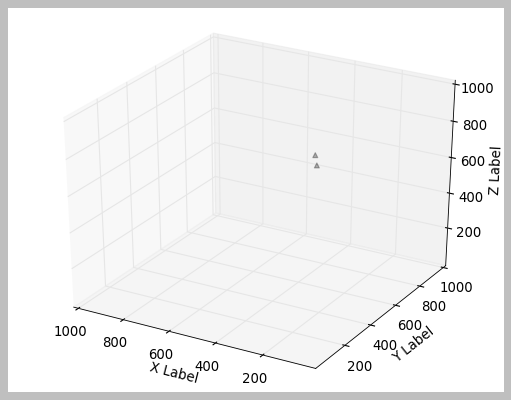

[[3, 2, 4, 6, 6, 223, 18, 214, 899, 607],
 [6, 6, 11, 25, 13, 44, 23, 71, 185, 395],
 [3601, 1041, 2252, 3600, 3600, 3601, 1080, 3601, 3602, 3601]]

In [109]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

#Cases with 20 tasks
#ilp
time = []
[(10, 968.9999999999936, 280.6183389968389), (20, 868.9999999129997, 377.99999999999375), (30, 850.999999829598, 448.9999999999998), (45, 850.999999829598, 502.999999999997), (55, 850.999999829598, 519.9999999999999), (65, 850.999999829598, 581.0000000000001), (86, 850.999999829598, 581.0000000000001), (96, 850.999999829598, 581.0000000000001), (106, 850.999999829598, 581.0000000000001), (117, 850.999999829598, 581.0000000000001), (127, 850.999999829598, 581.0000000000001), (138, 850.999999829598, 581.0000000000001), (148, 850.999999829598, 581.0000000000001), (159, 850.999999829598, 581.0000000000001), (169, 850.999999829598, 581.0000000000001), (179, 850.999999829598, 581.0000000000001), (190, 850.999999829598, 603.0000000000002), (200, 850.999999829598, 637.9632183939332), (211, 850.999999829598, 682.17180465964), (221, 850.999999829598, 757.0315789473686), (10, 832.9999998331983, 651.999999999996), (12, 953.0000000000248, 397.00000000001705), (22, 902.9999999096, 443.9999999999985), (32, 893.0000000000011, 481.99999999999875), (42, 893.0000000000011, 481.9999999999991), (53, 876.0000000000008, 542.9999999999998), (70, 875.9999999123007, 543.9999999999985), (80, 875.9999999123007, 543.9999999999985), (90, 875.9999999123007, 543.9999999999985), (101, 875.9999999123007, 543.9999999999985), (111, 868.9999999999992, 584.9999999999994), (121, 868.9999999129991, 616.0000000000002), (131, 868.9999999129991, 652.0000000000022), (142, 868.9999999129991, 674.9999999999995), (152, 868.9999999129991, 687.999999999999), (163, 868.9999999129991, 722.3592814371742), (173, 868.9999999129991, 733.0000000000016), (183, 868.9999999129991, 758.9999999999995), (193, 868.9999999129991, 791.0000000000007), (203, 868.9999999129991, 810.0000000000001), (10, 963.9999999999598, 265.14521161690055), (20, 938.9999999999992, 318.9999999999992), (30, 921.9999999076902, 469.0000000000007), (40, 921.9999999076902, 503.0000000000001), (51, 921.9999999076902, 527.1177802968692), (87, 921.9999999076902, 531.0000000000042), (98, 921.9999999076902, 531.0000000000042), (108, 921.9999999076902, 531.0000000000042), (119, 921.9999999076902, 531.0000000000042), (130, 921.9999999076902, 531.0000000000042), (140, 921.9999999076902, 531.0000000000042), (150, 921.9999999076902, 531.0000000000042), (160, 921.9999999076902, 531.0000000000042), (170, 921.9999999076902, 545.0000000000003), (180, 921.9999999076902, 547.9999999999999), (190, 921.9999999076902, 547.9999999999999), (201, 921.9999999076902, 547.9999999999999), (211, 921.9999999076902, 555.0), (222, 921.9999999076902, 560.0000000000001), (233, 921.9999999076902, 560.0000000000001), (243, 921.9999998153777, 560.0000000000001), (253, 921.9999998153777, 560.0000000000001), (263, 921.9999998153777, 560.0000000000001), (274, 921.9999998153777, 560.0000000000001), (285, 921.9999998153777, 560.0000000000001), (296, 921.9999998153777, 560.0000000000001), (307, 921.9999998153777, 560.0000000000001), (319, 921.9999998153777, 560.0000000000001), (329, 921.9999998153777, 560.0000000000001), (344, 921.9999998153777, 560.0000000000001), (355, 921.9999998153777, 560.0000000000001), (365, 921.9999998153777, 560.0000000000001), (375, 921.9999998153777, 560.0000000000001), (385, 921.9999998153777, 560.0000000000001), (395, 921.9999998153777, 560.0000000000001), (406, 921.9999998153777, 560.0000000000001), (416, 921.9999998153777, 560.0000000000001), (427, 921.9999998153777, 560.0000000000001), (438, 921.9999998153777, 560.0000000000001), (448, 921.9999998153777, 560.0000000000001), (458, 921.9999998153777, 560.0000000000001), (469, 921.9999998153777, 560.0000000000001), (479, 921.9999998153777, 560.0000000000001), (489, 921.9999998153777, 560.0000000000001), (499, 921.9999998153777, 560.0000000000001), (510, 903.0000000000013, 560.0000000000001), (521, 903.0000000000013, 560.0000000000001), (531, 903.0000000000013, 568.0000000000007), (542, 903.0000000000013, 585.0000000000005), (552, 889.9999999999987, 598.9839021043991), (563, 887.9999999999939, 619.0000000000009), (575, 887.9999999999939, 624.5896880289661), (586, 887.9999999999939, 631.9999999999994), (596, 887.9999999110937, 637.6118825017946), (606, 887.9999999110937, 644.0000000000011), (617, 887.9999999110937, 655.9518102982056), (627, 887.9999999110937, 662.1136954611331), (638, 887.9999999110937, 671.0000000000016), (648, 887.9999999110937, 677.0000000000014), (658, 887.9999999110937, 685.0000000000005), (669, 887.9999999110937, 689.237623771571), (679, 887.9999999110937, 695.1645569620255), (689, 887.9999999110937, 700.0000000000007), (699, 887.9999999110937, 704.235668789808), (709, 887.9999999110937, 708.000000000001), (720, 887.9999999110937, 714.7163528748886), (730, 887.9999999110937, 721.7118644067806), (741, 887.9999999110937, 726.0000000000014), (751, 884.9999999999977, 729.6609195402299), (761, 884.9999999999977, 738.6445714132456), (772, 884.9999999999977, 742.0000000000033), (782, 884.9999999999977, 751.0000000000014), (792, 884.9999999113976, 756.000000000002), (803, 884.9999999113976, 760.000000000002), (813, 884.9999999113976, 766.1140065146594), (823, 884.9999999113976, 777.551087263486), (834, 884.9999999113976, 783.0000000000018), (844, 884.9999999113976, 794.0), (854, 884.9999999113976, 800.6219714533153), (865, 884.9999999113976, 813.0), (875, 884.9999999113976, 819.8206521739135), (886, 884.9999999113976, 837.0000000000018), (896, 873.9999999999842, 861.0000000000009), (10, 905.0000000000105, 247.99999999998656), (20, 905.0000000000105, 306.9999999999834), (30, 869.999999999996, 306.9999999999834), (40, 856.9999999142003, 338.7148966692023), (54, 856.9999998283957, 344.5443670876066), (64, 835.9999999999953, 344.5443670876066), (74, 835.9999999162952, 458.0000000000007), (122, 835.9999999162952, 511.0000000000007), (132, 835.9999999162952, 511.0000000000007), (143, 835.9999999162952, 511.0000000000007), (153, 835.9999999162952, 511.0000000000007), (163, 835.9999999162952, 511.0000000000007), (174, 835.9999999162952, 511.0000000000007), (184, 835.9999999162952, 517.4197379614731), (194, 835.9999999162952, 525.9999999999993), (204, 835.9999999162952, 560.2761904817941), (215, 835.9999999162952, 578.4061151079142), (225, 835.9999999162952, 585.000000000001), (236, 835.9999999162952, 588.8404778636748), (246, 835.9999999162952, 595.4425185794801), (256, 835.9999999162952, 607.0000000000009), (266, 835.9999999162952, 618.2761904817946), (276, 835.9999999162952, 634.2376066360276), (286, 835.9999999162952, 636.0), (302, 835.9999999162952, 636.0), (312, 835.9999999162952, 636.0), (325, 835.9999999162952, 636.0), (338, 835.9999999162952, 636.0), (348, 835.9999999162952, 636.0), (358, 835.9999999162952, 636.0), (368, 835.9999999162952, 636.0), (379, 835.9999999162952, 636.0), (391, 835.9999999162952, 636.0), (402, 835.9999999162952, 636.0), (412, 835.9999999162952, 636.0), (423, 835.9999999162952, 636.0), (436, 835.9999999162952, 636.0), (451, 835.9999999162952, 636.0), (462, 835.9999999162952, 636.0), (472, 835.9999999162952, 636.0), (482, 835.9999999162952, 636.0), (493, 835.9999999162952, 636.0), (503, 835.9999999162952, 636.0), (514, 835.9999999162952, 636.0), (524, 835.9999999162952, 636.0), (535, 835.9999999162952, 636.0), (545, 835.9999999162952, 636.0), (556, 835.9999999162952, 636.0), (566, 835.9999999162952, 636.0), (576, 826.0000000000002, 636.0), (673, 825.9999999173001, 636.0), (684, 825.9999999173001, 636.0), (695, 825.9999999173001, 636.0), (705, 825.9999999173001, 636.0), (716, 825.9999999173001, 636.0), (726, 825.9999999173001, 636.0), (736, 825.9999999173001, 636.0), (747, 825.9999999173001, 636.0), (758, 825.9999999173001, 636.0), (770, 825.9999999173001, 636.0), (780, 825.9999999173001, 636.0), (790, 825.9999999173001, 636.0), (800, 825.9999999173001, 636.0), (810, 825.9999999173001, 636.0), (821, 825.9999999173001, 636.0), (831, 825.9999999173001, 636.0), (841, 825.9999999173001, 636.0), (851, 825.9999999173001, 636.0), (861, 825.9999999173001, 636.0), (872, 825.9999999173001, 636.0), (882, 825.9999999173001, 636.0), (892, 825.9999999173001, 636.0), (902, 825.9999999173001, 639.8322189679889), (912, 825.9999999173001, 641.3405150433452), (923, 825.9999999173001, 643.000000000001), (933, 825.9999999173001, 646.259516233394), (944, 825.9999999173001, 649.0000000000016), (955, 825.9999999173001, 652.0000000000001), (965, 825.9999999173001, 655.789154738846), (975, 825.9999999173001, 660.7763157894739), (987, 825.9999999173001, 667.2097378277169), (998, 825.9999999173001, 673.8666137356098), (1008, 825.999999751898, 677.0000000000006), (1018, 825.999999751898, 679.8802395209588), (1028, 825.999999751898, 685.0000000000006), (1039, 825.999999751898, 687.9999999999995), (1049, 825.999999751898, 688.2015149588802), (1060, 825.999999751898, 691.1562500000005), (1070, 825.999999751898, 694.9999999999998), (1080, 825.999999751898, 695.0000000000007), (1090, 825.999999751898, 697.9999999999997), (1101, 825.999999751898, 698.0000000000001), (1111, 825.999999751898, 699.0000000000007), (1121, 825.999999751898, 700.000000000001), (1131, 825.999999751898, 701.0000000000019), (1142, 825.999999751898, 703.8761492385706), (1152, 825.999999751898, 705.9999999999887), (1162, 825.999999751898, 708.0000000000015), (1173, 825.999999751898, 710.2999999999997), (1183, 825.999999751898, 712.0000000000001), (1193, 817.0000000000038, 716.0000000000009), (1203, 817.0000000000038, 718.9999999999999), (1213, 816.9999999182037, 722.0000000000001), (1224, 816.9999999182037, 725.9905660377357), (1234, 816.9999999182037, 732.0), (1244, 816.9999999182037, 735.054298642534), (1255, 816.9999999182037, 741.0), (1265, 816.9999999182037, 742.000000000001), (1275, 816.9999999182037, 747.9999999999997), (1285, 816.9999999182037, 748.0), (1295, 816.9999999182037, 748.9999999999997), (1305, 816.9999999182037, 749.5350869470631), (1316, 816.9999999182037, 754.0000000000001), (1326, 816.9999999182037, 756.0000000000015), (1336, 812.9999999999983, 758.000000000001), (1346, 793.9999999022126, 770.4609804432012), (1356, 793.9999999022126, 788.0000000000011)]
makespan =  [926, 871, 933, 870, 828, 816, 807, 869, 874, 797]
time_cost =  [3, 2, 4, 6, 6, 223, 18, 214, 899, 607]
gap =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

time.append(time_cost)
#mots 
makespan =  [926, 871, 933, 870, 828, 816, 807, 869, 874, 797]
time_cost =  [6, 6, 11, 25, 13, 44, 23, 71, 185, 395]
gap =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

time.append(time_cost)
#lbbd
makespan =  [937, 920, 962, 980, 905, 878, 823, 908, 889, 1004]
time_cost =  [3601, 1041, 2252, 3600, 3600, 3601, 1080, 3601, 3602, 3601]
gap =  [0.11099, 0.00109, 0.00104, 0.23673, 0.23978, 0.14123, 0.00122, 0.05396, 0.13498, 0.37595]
time.append(time_cost)
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
xs = time[0]
ys = time[1]
zs = time[2]
ax.scatter(xs, ys, zs, c=c, marker=m)
ax.set_xlim(1, 1000)
ax.set_ylim(1, 1000)
ax.set_zlim(1, 1000)
# ax.yaxis.set_scale('log')
# ax.set_xscale("log")
# ax.set_yscale("log")
# ax.set_zscale("log")
ax.invert_xaxis()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
time